2018 Edition

### Alaa Houimel - Marine Poulard

# Challenge: What is the future selling price of a home?

A home is often the largest and most expensive purchase a person makes in his or her lifetime. Ensuring homeowners have a trusted way to monitor this asset is incredibly important.

In this competition, students are required to develop a full-fledged approach to make predictions about the future sale prices of homes. A full-fledged approach constist, at least, in the following steps:

* Descriptive statistics about the data
* Data cleaning and pre-processing
* Defining a modeling approach to the problem
* Build such a statistical model
* Validate the outcome of the model

Now, should you ask a home buyer to describe their dream house, they probably wouldn't begin with describing features such as the height of the basement ceiling or the proximity to a railroad. As you will see, the dataset we use in this competition proves that many more features influence price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in a small city in the US, this competition challenges you to predict the final price of each home.

# Goal of the challenge

It is your job to predict the sales price for each house. For each Id in the test set, you must predict the value of the SalePrice variable.

## Metric
Notebooks are evaluated on Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price. (Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.)

# Introduction

A house value is simply more than location and square footage. Like the features that make up a person, an educated party would want to know all aspects that give a house its value.

We are going to take advantage of all of the feature variables available to use and use it to analyze and predict house prices.

We are going to break everything into logical steps that allow us to ensure the cleanest, most realistic data for our model to make accurate predictions from.

- Load Data and Packages
- Analyzing and cleaning the data
- Impute Missing Data and removing outliers
- Feature Transformation/Engineering
- Modeling and Predictions

In [122]:
from IPython.display import HTML
from IPython.display import Image

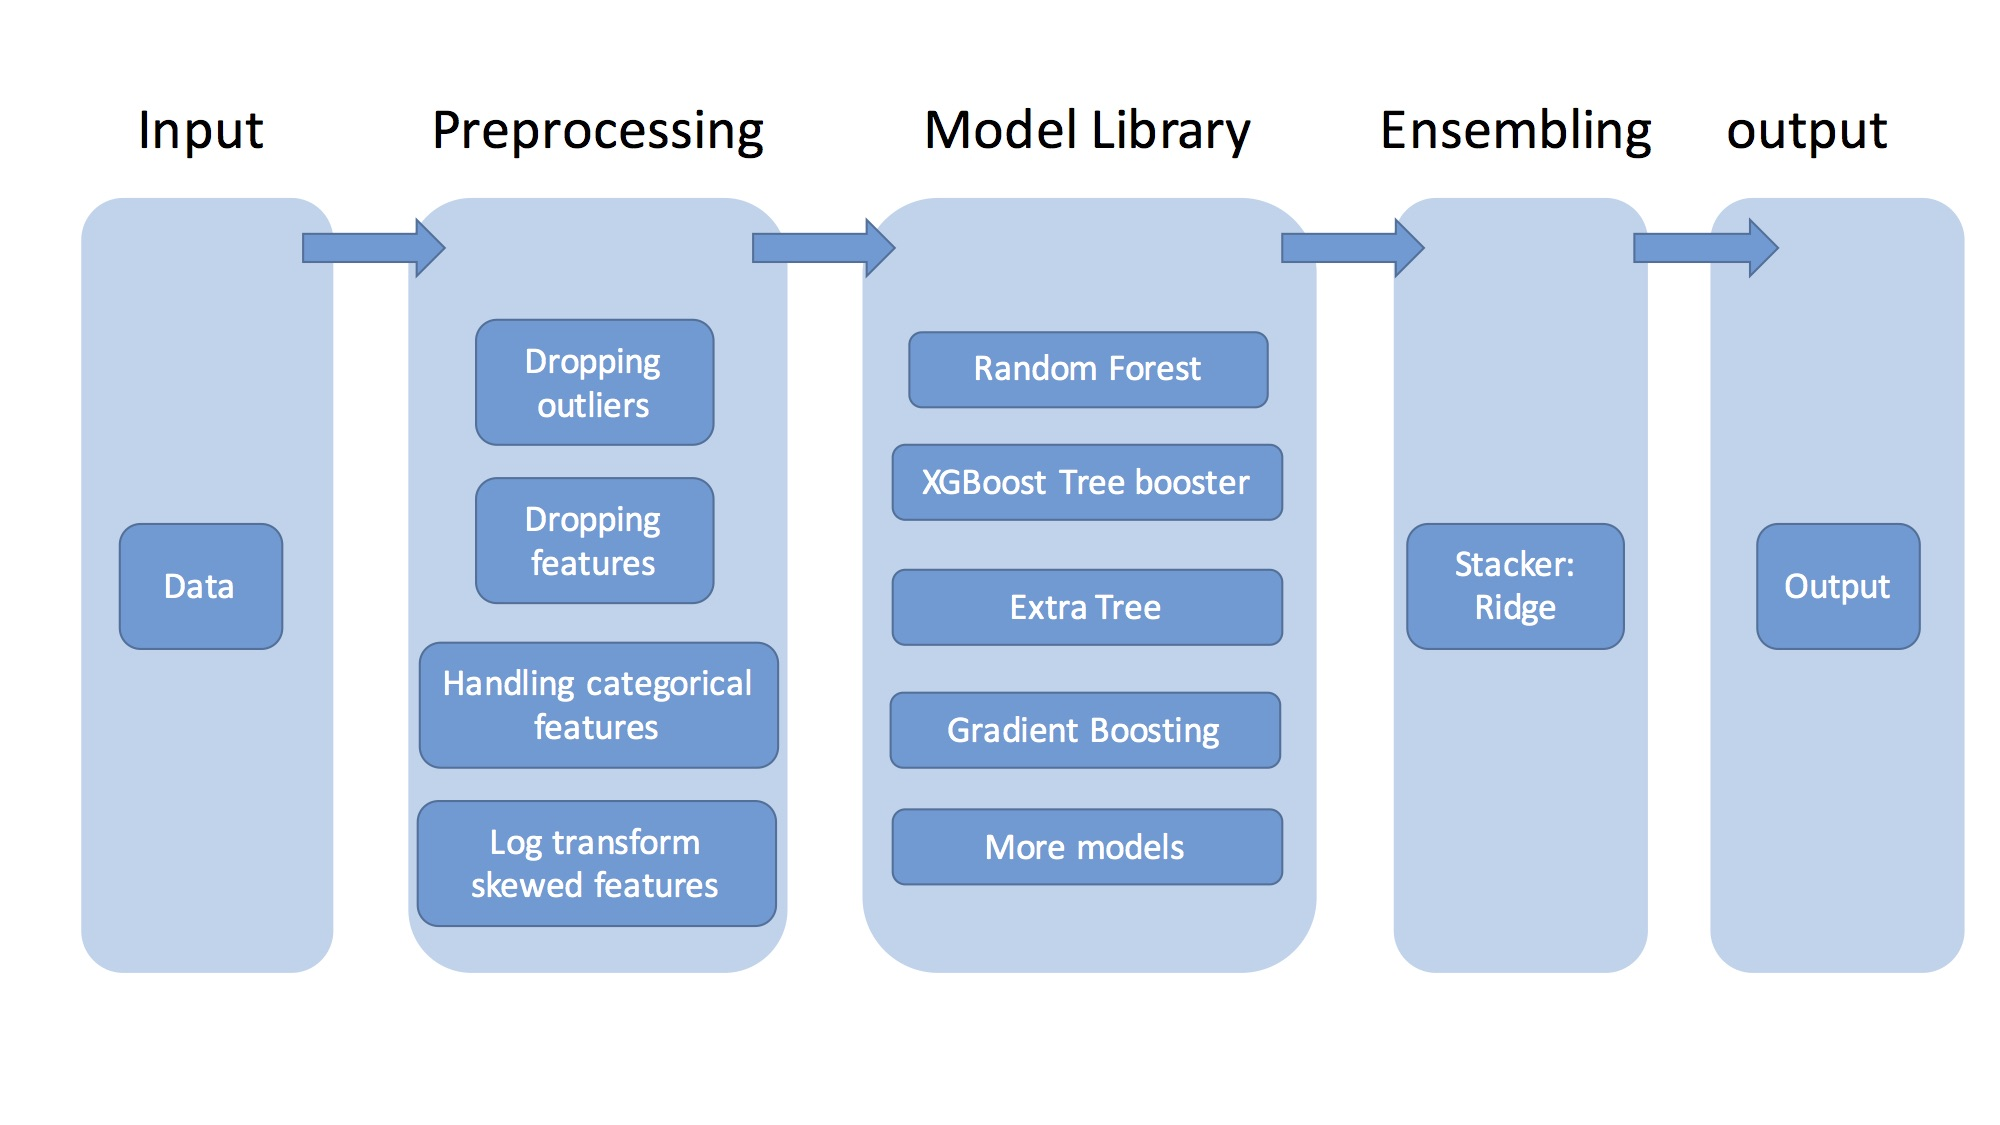

In [123]:
Image(filename='flowchart.jpg', width = 800)

# Table of content

1. **[Import packages](#import_packages)**
2. **[Load data](#load_data)**
3. **[Preprocessing](#Preprocessing)**
    - 3.1 - [Remove outliers](#remove_outliers)
    - 3.2 - [Treat missing values](#treat_missing_values)   
    - 3.3 - [data_analysis](#data_analysis)
4. **[Processing](#Processing)**
    - 4.1 - [Feature engineering](#feature_engineering)
        - 4.1.1 - [Correlation matrix](#correlation_matrix)
        - 4.1.2 - [Polynominal_featuring](#Polynominal_featuring)
    - 4.2 - [Treat_non_numerical_features_ordinal](#Treat_non_numerical_features_ordinal)
    - 4.3 - [Treating skewed features](#treating_skewed_features)
    - 4.4 - [Treat_non_numerical_features_categorical](#Treat_non_numerical_features_categorical)
    - 4.5 - [Removing_features](#Removing_features)
    - 4.6 - [Adding_features](#Adding_features)
    - 4.7 - [Target variable](#target_variable)
 
    

5. **[Modeling](#modeling)**
    - 4.1 - [Preparation of datasets](#preparation_of_datasets)
    - 4.2 - [Training](#training)
    - 4.3 - [Optimisation](#optimisation)
    - 4.4 - [Stacking](#stacking)
    - 4.5 - [Ensemble](#ensemble)
    - 4.6 - [Submission](#submission)
6. ***[Conclusion](#conclusion)***   


<a id='import_packages'></a>
# 1.  Import packages

In [1]:
# This first set of packages include Pandas, for data manipulation, numpy for mathematical computation and matplotlib & seaborn, for visualisation.
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style='white', context='notebook', palette='deep')
print('Data Manipulation, Mathematical Computation and Visualisation packages imported!')

# Statistical packages used for transformations
from scipy import stats
from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats.stats import pearsonr
print('Statistical packages imported!')

# Metrics used for measuring the accuracy and performance of the models
#from sklearn import metrics
#from sklearn.metrics import mean_squared_error
print('Metrics packages imported!')

# Algorithms used for modeling
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.kernel_ridge import KernelRidge
import xgboost as xgb
print('Algorithm packages imported!')

# Pipeline and scaling preprocessing will be used for models that are sensitive
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
print('Pipeline and preprocessing packages imported!')

# Model selection packages used for sampling dataset and optimising parameters
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
print('Model selection packages imported!')

# Set visualisation colours
mycols = ["#66c2ff", "#5cd6d6", "#00cc99", "#85e085", "#ffd966", "#ffb366", "#ffb3b3", "#dab3ff", "#c2c2d6"]
sns.set_palette(palette = mycols, n_colors = 4)
print('My colours are ready! :)')

# To ignore annoying warning
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)
warnings.filterwarnings("ignore", category=DeprecationWarning)
print('Deprecation warning will be ignored!')

Data Manipulation, Mathematical Computation and Visualisation packages imported!
Statistical packages imported!
Metrics packages imported!
Algorithm packages imported!
Pipeline and preprocessing packages imported!
Model selection packages imported!
My colours are ready! :)
Deprecation warning will be ignored!


<a id='load_data'></a>
# 2. Load data

- The Pandas package helps us work with our datasets. We start by reading the training and test datasets into DataFrames.
- We want to save the 'Id' columns from both datasets for later use when preparing the submission data.
- But we can drop them from the training and test datasets as they are redundant.

In [167]:
train = pd.read_csv('challenge_data/train.csv')
test = pd.read_csv('challenge_data/test.csv')
trueprices = pd.read_csv("challenge_data/true_prices.csv", delimiter='\t')


# Save the 'Id' column
train_ID = train['Id']
test_ID = test['Id']
true_price_ID = trueprices['Id']

# Now drop the  'Id' column as it's redundant for modeling
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)
trueprices.drop("Id", axis = 1, inplace = True)

print('train',train.shape, '\n')
print('test',test.shape, '\n')
print('trueprices',trueprices.shape, '\n')
train.head()
train.info()

train (1200, 80) 

test (260, 79) 

trueprices (260, 1) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 80 columns):
MSSubClass       1200 non-null int64
MSZoning         1200 non-null object
LotFrontage      990 non-null float64
LotArea          1200 non-null int64
Street           1200 non-null object
Alley            75 non-null object
LotShape         1200 non-null object
LandContour      1200 non-null object
Utilities        1200 non-null object
LotConfig        1200 non-null object
LandSlope        1200 non-null object
Neighborhood     1200 non-null object
Condition1       1200 non-null object
Condition2       1200 non-null object
BldgType         1200 non-null object
HouseStyle       1200 non-null object
OverallQual      1200 non-null int64
OverallCond      1200 non-null int64
YearBuilt        1200 non-null int64
YearRemodAdd     1200 non-null int64
RoofStyle        1200 non-null object
RoofMatl         1200 non-null object
Exterio

- This dataset was constructed by Dean De Cock for use in Data Science education. It is viewed as a modern alternative to the Boston Housing dataset.
- As expressed within the competition, this datasets includes 79 descriptive features about the houses.
- This file also gives guidance to how missing values should be treated, which we will address in section 3.1.

<a id='Preprocessing'></a>
# 3.  Preprocessing

<a id='remove_outliers'></a>
## 3.1 - Remove outliers

Outliers can be a Data Scientists nightmare.

- By definition, an outlier is something that is outside of the expected response. How far you're willing to consider something to be an outlier, is down to the individual and the problem.
- From this definition, this outlier will therefore sit way outside of the distribution of data points. Hence, this will skew the distribution of the data and potential calculations.

In general, a tradeoff has to be found concerning the number of outliers to remove from the dataset:

- When the outliers are left in the model, the model overfits and is sensitive to these points. Therefore, it predicts values much higher than the true future values. This is what we want to avoid.
- However, when outliers are removed, it predicts much more accurately with a generalised model that splits the distribution of the data points evenly.
-  If we create a model that is very sensitive and tuned to fit outliers, this will result in a model that over or underfits. If we can create models that are able to cancel out the distractions and noise of outliers, this is usually a better situation.


As we see in the plot below, there are some outliers that must be treated. SALE PRICE versus GR LIV AREA clearly displays 5 unusual points. There are either Partial Sales that likely don’t represent actual market values, or simply unusual sales (very large houses priced relatively appropriately). It clearly modify the behaviour of the whole dataset, begin with the mean of the sale prices.

First, let's plot the two features stated against one another, to identify the outliers. Then we will remove them. The chart on the left shows the data before removing the outliers, and the chart on the right shows after.

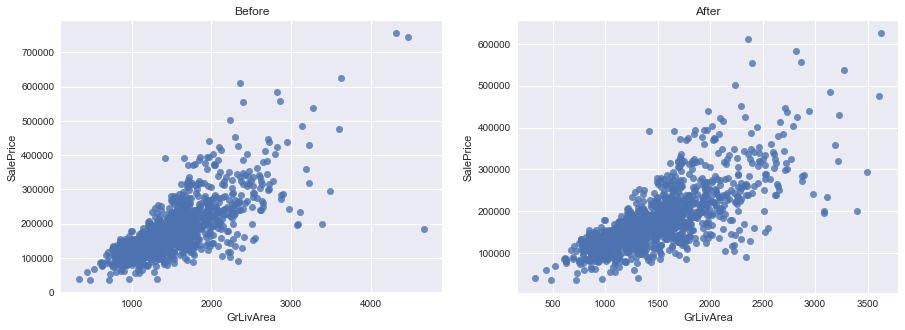

In [168]:
plt.subplots(figsize=(15, 5))

plt.subplot(1, 2, 1)
g = sns.regplot(x=train['GrLivArea'], y=train['SalePrice'], fit_reg=False).set_title("Before")

# Delete outliers
plt.subplot(1, 2, 2)                                                                                
train = train.drop(train[(train['GrLivArea']>4000)].index)
g = sns.regplot(x=train['GrLivArea'], y=train['SalePrice'], fit_reg=False).set_title("After")

<a id='treat_missing_values'></a>
## 3.2 - Treat missing values

Missing values are the Data Scientists other nightmare.

A missing value is an entry in a column that has no assigned value. This can mean multiple things:
- A missing value may be the result of an error during the production of the dataset. This could be a human error, or machinery error depending on where the data comes from. 
- A missing value in some cases, may just mean a that a 'zero' should be present. In which case, it can be replaced by a 0. The data description provided helps to address situations like these.
- However, missing values represent no information. Therefore, does the fact that you don't know what value to assign an entry, mean that filling it with a 'zero' is always a good fit? 

Some algorithms do not like missing values. Some are capable of handling them, but others are not. Therefore since we are using a variety of algorithms, it's best to treat them in an appropriate way.

If we have missing values, we have two options:
- Delete the entire row
- Fill the missing entry with an imputed value

In order to treat this dataset, first of all we will create a dataset of the training and test data in order to make changes consistent across both. Then, we will cycle through each feature with missing values and treat them individually based on the data description, or our judgement.

In [169]:
# First of all, save the length of the training and test data for use later
ntrain = train.shape[0]
ntest = test.shape[0]

# Also save the target value, as we will remove this
y_train = train.SalePrice.values

# concatenate training and test data into all_data
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)

print("all_data shape: {}".format(all_data.shape))

all_data shape: (1457, 79)


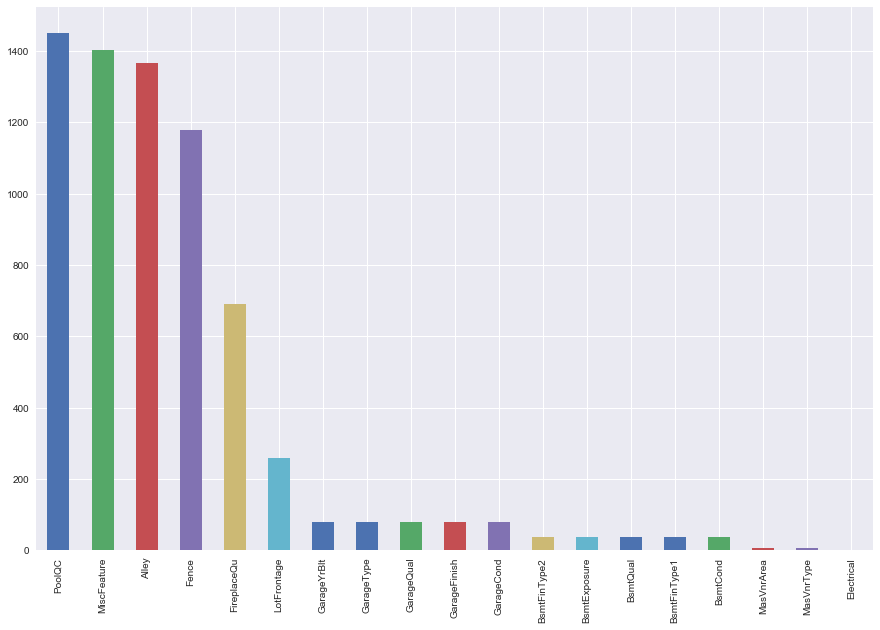

In [170]:
# aggregate all null values 
all_data_na = all_data.isnull().sum()

# get rid of all the values with 0 missing values
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
plt.subplots(figsize =(15, 10))
all_data_na.plot(kind='bar');

Above we can see where the missing values sit. Nb: it may look like some of the features have 0 missing values, but actually they have 1 by closer inspection. Moreover, the features with no missing values are not represented in this plot.

Here is how we treated missing values:
- using the data description, when the features are categorical, we fill the values with 'nones'.
- on the contrary, if the features are ordinal, we fill the values with zeros. We will go back on 'categorical' and 'ordinal' definitions in poart 4.2.
- When the values are a few, we use the feature mode, which is the most commonly occuring value.
- We decided to fill the missing values of lot frontage according it its correlation with 'neighborhood'. (cf correlation matrix in part 4.1.1).



In [171]:
# Using data description, fill these missing values with "None"
for col in ("PoolQC", "MiscFeature", "Alley", "Fence", "FireplaceQu",
           "GarageType", "GarageFinish", "GarageQual", "GarageCond",
           "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1",
            "BsmtFinType2", "MSSubClass", "MasVnrType"):
    all_data[col] = all_data[col].fillna("None")
print("'None' - treated...")

# The area of the lot out front is likely to be similar to the houses in the local neighbourhood
# Therefore, let's use the median value of the houses in the neighbourhood to fill this feature
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))
print("'LotFrontage' - treated...")

# Using data description, fill these missing values with 0 
for col in ("GarageYrBlt", "GarageArea", "GarageCars", "BsmtFinSF1", 
           "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF", "MasVnrArea",
           "BsmtFullBath", "BsmtHalfBath"):
    all_data[col] = all_data[col].fillna(0)
print("'0' - treated...")


# Fill these features with their mode, the most commonly occuring value. This is okay since there are a low number of missing values for these features
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])
all_data["Functional"] = all_data["Functional"].fillna(all_data['Functional'].mode()[0])
print("'mode' - treated...")

all_data_na = all_data.isnull().sum()
print("Features with missing values: ", all_data_na.drop(all_data_na[all_data_na == 0].index))

'None' - treated...
'LotFrontage' - treated...
'0' - treated...
'mode' - treated...
Features with missing values:  Series([], dtype: int64)


<a id='data_analysis'></a>
## 3.3 Data Analysis

Before going more into details, let's have a look at our data to have an idea of the feature behaviours.

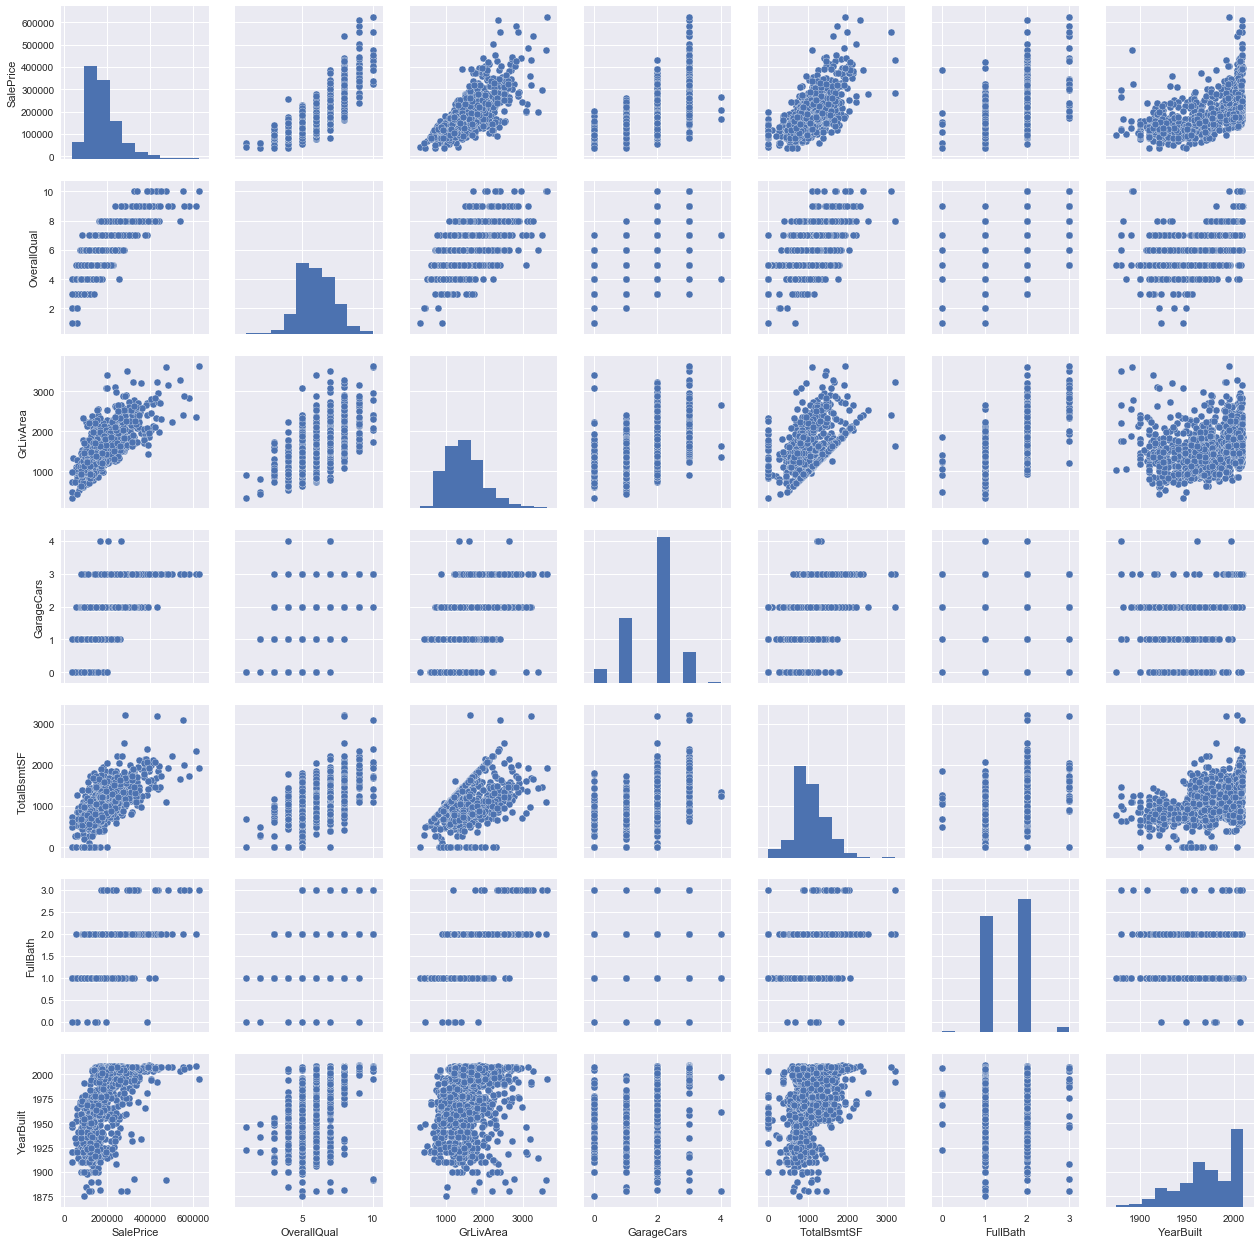

In [172]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train[cols], size = 2.5)
plt.show()

Although we already know some of the main figures, this mega scatter plot gives us a reasonable idea about variables relationships.

One of the figures we may find interesting is the one between 'TotalBsmtSF' and 'GrLiveArea'. In this figure, we can see the dots drawing a linear line, which almost acts like a border. It totally makes sense that the majority of the dots stay below that line. Basement areas can be equal to the above ground living area, but it is not expected a basement area bigger than the above ground living area (unless you're trying to buy a bunker).

The plot concerning 'SalePrice' and 'YearBuilt' can also make us think. In the bottom of the 'dots cloud', we see what almost appears to be a shy exponential function (be creative). We can also see this same tendency in the upper limit of the 'dots cloud' (be even more creative). Also, we cannotice how the set of dots regarding the last years tend to stay above this limit.


<a id='Processing'></a>
# 4  Processing

<a id='feature_engineering'></a>
## 4.1 - Feature engineering

Feature engineering is the process of using domain knowledge of the data to create features that make machine learning algorithms work. Feature engineering is fundamental to the application of machine learning, and is both difficult and expensive. In this section, we will create additional features to highlight the relevance of the most important ones.

<a id='correlation_matrix'></a>
### 4.1.1 - Correlation matrix

Now that missing values and outliers have been treated, we will analyse each feature in more detail. This will give guidance on how to prepare this feature for modeling. 

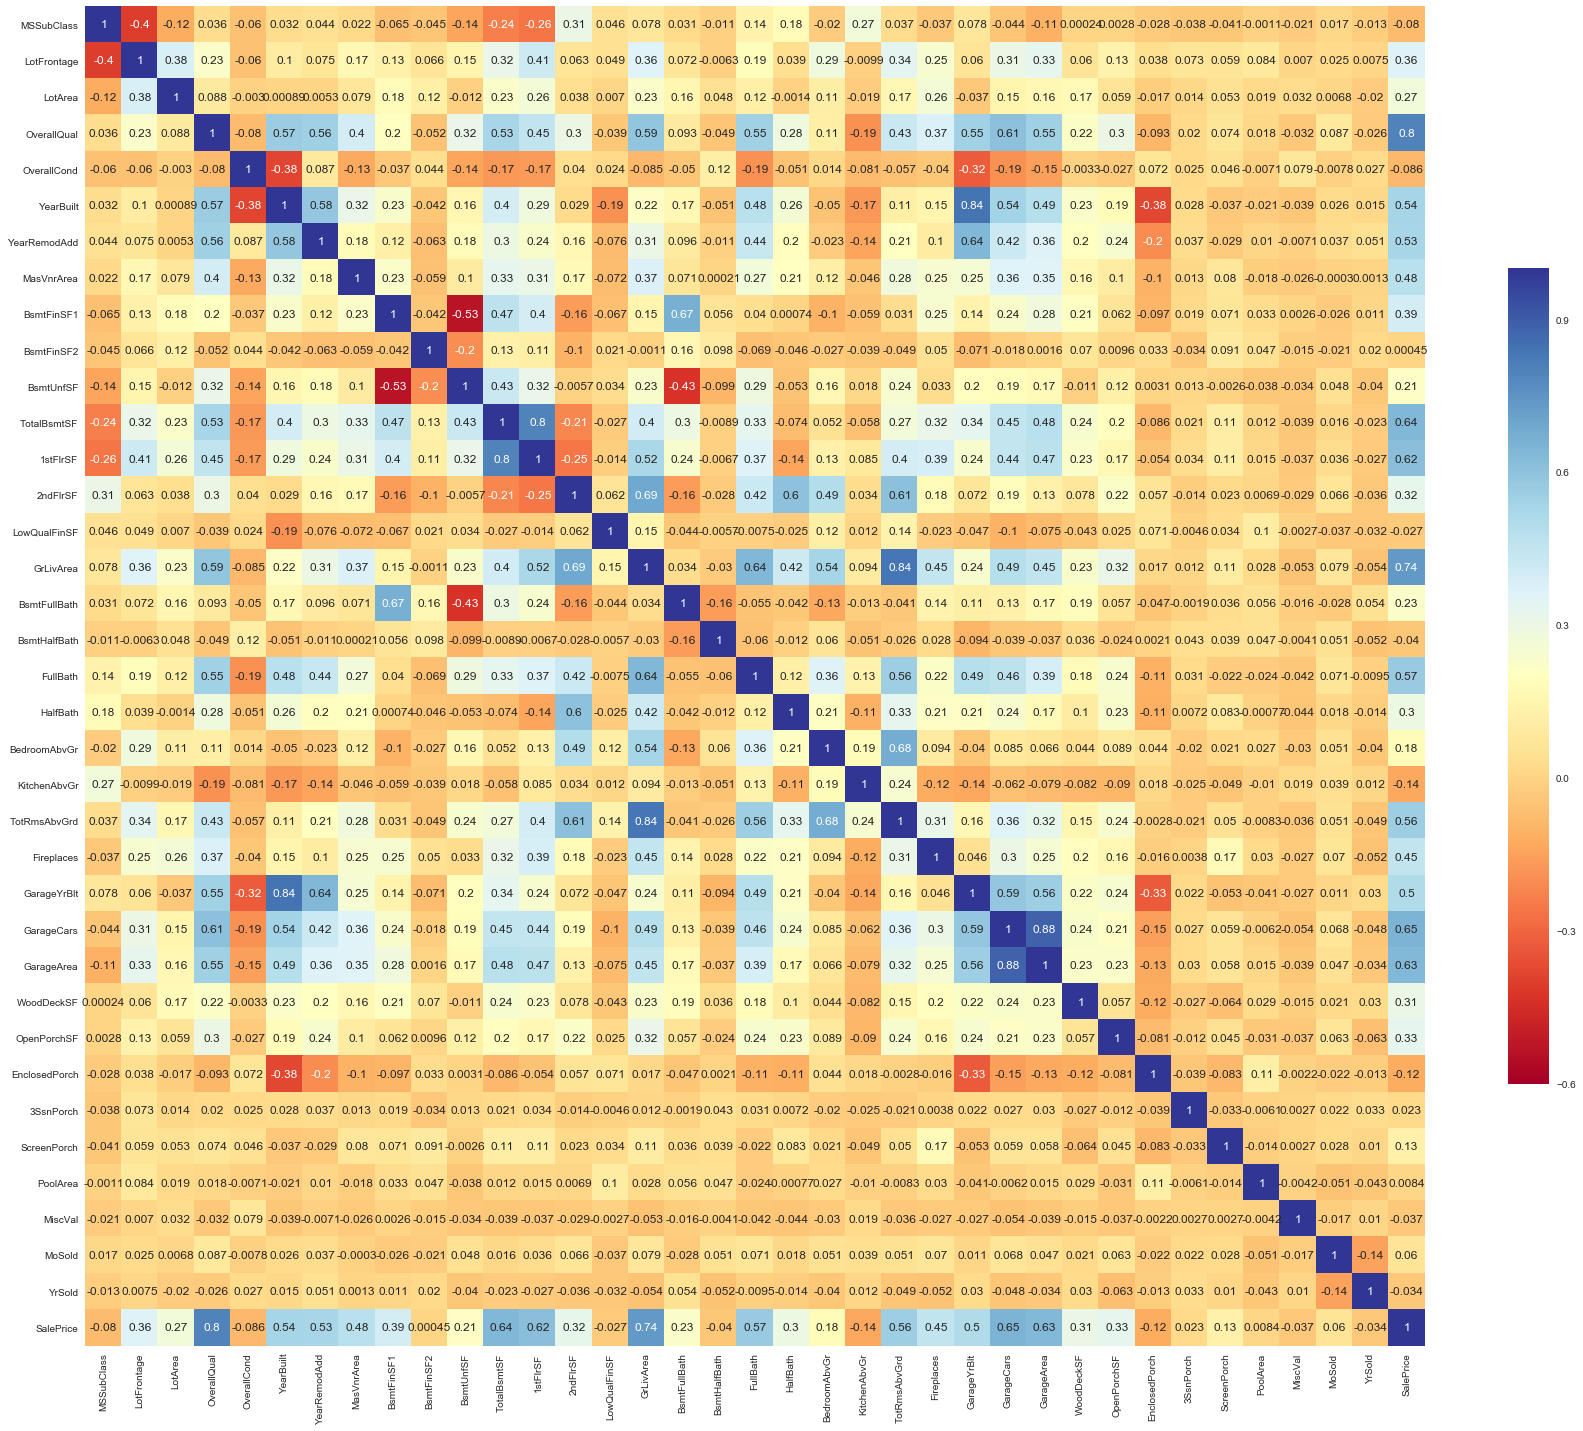

In [125]:
corr = train.corr()
plt.subplots(figsize=(30, 30))
cmap = sns.diverging_palette(150, 250, as_cmap=True)
sns.heatmap(corr, cmap="RdYlBu", vmax=1, vmin=-0.6, center=0.2, square=True, linewidths=0, cbar_kws={"shrink": .5}, annot = True);

In [116]:
top_factors = corr['SalePrice']
top_factors= top_factors[(top_factors!=1) & (top_factors>0.4)].sort_values(ascending=False)
display(top_factors)

OverallQual     0.797117
GrLivArea       0.735660
GarageCars      0.650887
TotalBsmtSF     0.642452
GarageArea      0.632855
1stFlrSF        0.617253
FullBath        0.569800
TotRmsAbvGrd    0.561316
YearBuilt       0.537036
YearRemodAdd    0.526339
GarageYrBlt     0.504243
MasVnrArea      0.479385
Fireplaces      0.454033
Name: SalePrice, dtype: float64

- Using this correlation matrix, we are able to visualise the raw highly influencing factors on SalePrice.
- We are looking for these because we will create polynomial features from the highly correlating features, in an attempt to capture the complex non-linear relationships within the data.


<a id='Polynomial_featuring'></a>
### 4.1.2 - Polynomial featuring

The most common relationship we may think of between two variables, would be a straight line or a linear relationship. What this means is that if we increase the predictor by 1 unit, the response always increases by X units. However, not all data has a linear relationship and therefore it may be necessary for your model to fit the more complex relationships in the data. 

But how do we fit a model to data with complex relationships, unexplainable by a linear function? There are a variety of curve-fitting methods you can choose from to help you with this.

- The most common way to fit curves to the data is to include polynomial terms, such as squared or cubed predictors.
- Typically, we choose the model order by the number of bends you need in your line. Each increase in the exponent produces one more bend in the curved fitted line. It’s very rare to use more than a cubic term.

- If our response data follows a pattern that descends down to a lower bound, or ascends up to an upper bound, you can fit this type of relationship by including the reciprocal (1/x) of one or more predictor variables in the model.
    - Generally, we want to use this form when the size of effect for a predictor variable decreases as its value increases. 
- Because the gradient is a function of 1/x, the gradient gets flatter as x increases. For this type of model, x can never equal 0 because you can’t divide by zero.
- Since we have such a high number of variables in the dataset, it's overkill to create polynomials of each feature. Therefore, We will look at the top 10 correlating features with the target variable from the training dataset and create polynomials of these features, or equivalently the new combinations I have created from them.

Using the correlation matrix, the top influencing factors that we will use to create polynomials are:
1. **OverallQual**
2. **GrLivArea**
3. **GarageCars**
4. **GarageArea**
5. **TotalBsmtSF**
6. **1stFlrSF**
7. **FullBath**
8. **TotRmsAbvGrd**
9. **Fireplaces**
10. **MasVnrArea**
11. **BsmtFinSF1**
12. **LotFrontage**
13. **WoodDeckSF**
14. **OpenPorchSF**
15. **2ndFlrSF**

In [118]:
# Quadratic
all_data["OverallQual-2"] = all_data["OverallQual"] ** 2
all_data["GrLivArea-2"] = all_data["GrLivArea"] ** 2
all_data["GarageCars-2"] = all_data["GarageCars"] ** 2
all_data["GarageArea-2"] = all_data["GarageArea"] ** 2
all_data["TotalBsmtSF-2"] = all_data["TotalBsmtSF"] ** 2
all_data["1stFlrSF-2"] = all_data["1stFlrSF"] ** 2
all_data["FullBath-2"] = all_data["FullBath"] ** 2
all_data["TotRmsAbvGrd-2"] = all_data["TotRmsAbvGrd"] ** 2
all_data["Fireplaces-2"] = all_data["Fireplaces"] ** 2
all_data["MasVnrArea-2"] = all_data["MasVnrArea"] ** 2
all_data["BsmtFinSF1-2"] = all_data["BsmtFinSF1"] ** 2
all_data["LotFrontage-2"] = all_data["LotFrontage"] ** 2
all_data["WoodDeckSF-2"] = all_data["WoodDeckSF"] ** 2
all_data["OpenPorchSF-2"] = all_data["OpenPorchSF"] ** 2
all_data["2ndFlrSF-2"] = all_data["2ndFlrSF"] ** 2
print("Quadratics done!...")

# Cubic
all_data["OverallQual-3"] = all_data["OverallQual"] ** 3
all_data["GrLivArea-3"] = all_data["GrLivArea"] ** 3
all_data["GarageCars-3"] = all_data["GarageCars"] ** 3
all_data["GarageArea-3"] = all_data["GarageArea"] ** 3
all_data["TotalBsmtSF-3"] = all_data["TotalBsmtSF"] ** 3
all_data["1stFlrSF-3"] = all_data["1stFlrSF"] ** 3
all_data["FullBath-3"] = all_data["FullBath"] ** 3
all_data["TotRmsAbvGrd-3"] = all_data["TotRmsAbvGrd"] ** 3
all_data["Fireplaces-3"] = all_data["Fireplaces"] ** 3
all_data["MasVnrArea-3"] = all_data["MasVnrArea"] ** 3
all_data["BsmtFinSF1-3"] = all_data["BsmtFinSF1"] ** 3
all_data["LotFrontage-3"] = all_data["LotFrontage"] ** 3
all_data["WoodDeckSF-3"] = all_data["WoodDeckSF"] ** 3
all_data["OpenPorchSF-3"] = all_data["OpenPorchSF"] ** 3
all_data["2ndFlrSF-3"] = all_data["2ndFlrSF"] ** 3
print("Cubics done!...")

# Square Root
all_data["OverallQual-Sq"] = np.sqrt(all_data["OverallQual"])
all_data["GrLivArea-Sq"] = np.sqrt(all_data["GrLivArea"])
all_data["GarageCars-Sq"] = np.sqrt(all_data["GarageCars"])
all_data["GarageArea-Sq"] = np.sqrt(all_data["GarageArea"])
all_data["TotalBsmtSF-Sq"] = np.sqrt(all_data["TotalBsmtSF"])
all_data["1stFlrSF-Sq"] = np.sqrt(all_data["1stFlrSF"])
all_data["FullBath-Sq"] = np.sqrt(all_data["FullBath"])
all_data["TotRmsAbvGrd-Sq"] = np.sqrt(all_data["TotRmsAbvGrd"])
all_data["Fireplaces-Sq"] = np.sqrt(all_data["Fireplaces"])
all_data["MasVnrArea-Sq"] = np.sqrt(all_data["MasVnrArea"])
all_data["BsmtFinSF1-Sq"] = np.sqrt(all_data["BsmtFinSF1"])
all_data["LotFrontage-Sq"] = np.sqrt(all_data["LotFrontage"])
all_data["WoodDeckSF-Sq"] = np.sqrt(all_data["WoodDeckSF"])
all_data["OpenPorchSF-Sq"] = np.sqrt(all_data["OpenPorchSF"])
all_data["2ndFlrSF-Sq"] = np.sqrt(all_data["2ndFlrSF"])
print("Roots done!...")

Quadratics done!...
Cubics done!...
Roots done!...


<a id='Treat_non_numerical_features_ordinal'></a>
## 4.2 - Treat non numerical features


In this section, we continue to make our data usable on our regression models. To apply them, the features need to be numerical. Howerver, in our case, most of the features are strings. They can be defined either as categorical or they can have some ordinal relations.
Let's look at them into more details.


*Listing the non numerical values*

In [173]:
non_numeric_features = train.select_dtypes(exclude=[np.number])
non_numeric_features.dtypes

MSZoning         object
Street           object
Alley            object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Heating          object
HeatingQC        object
CentralAir       object
Electrical       object
KitchenQual      object
Functional       object
FireplaceQu      object
GarageType       object
GarageFinish     object
GarageQual       object
GarageCond       object
PavedDrive       object
PoolQC           object
Fence            object
MiscFeature      object
SaleType        

We observe that we have 58 features of type 'object', which is absolutly non negligeable over 79 features in total. An easy way to fix this issue would be to systematically use the function 'get_dummies' which convert categorical variable into dummy/indicator variables. The idea is to create a new feature for each attribute and assign the value 0 or 1 depending on wether a data has this attribute or not. 
'get_dummies' is well adapted for categorical features: the added features depicts a belonging. But, we can observe that some features have more information to offer. First, non numerical values can have ordinal properties. This is the case of HeatingQC whose attributes are positivly correlated with SalePrice. In practice, it is logical that a house price grows with its heating quality. It is likely that a luxury home has an exelent heating. For being considered as ordinal, a feature has to have distinguishable ordered attributes, and there should be a coherence in practice (as it is the case here).

Among these features, some attributes bring similar information, or have the same behaviours. Under some conditions, we can merge them. 
Finally, there are some features which are totally useless. Tipycally those with two classes, and one of them as a few houses. We can simply remove them. It is the case for utilities.

In [174]:
all_data_0=all_data

## Ordinal features

In [175]:
# all_data.drop(all_data.index, inplace=True)
# all_data=all_data_0

In [176]:
qual_dict = {"nan":0,None: 0, "Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5}
area_cols = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
             'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 
             'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'LowQualFinSF', 'PoolArea' ]

all_data["ExterQual"] = all_data_0["ExterQual"].map(qual_dict).astype(float)
all_data["ExterCond"] = all_data_0["ExterCond"].map(qual_dict).astype(float)
all_data["BsmtQual"] = all_data_0["BsmtQual"].map(qual_dict).astype(float)
all_data["BsmtCond"] = all_data_0["BsmtCond"].map(qual_dict).astype(float)
all_data["HeatingQC"] = all_data_0["HeatingQC"].map(qual_dict).astype(float)
all_data["KitchenQual"] = all_data_0["KitchenQual"].map(qual_dict).astype(float)
all_data["FireplaceQu"] = all_data_0["FireplaceQu"].map(qual_dict).astype(float)
all_data["GarageQual"] = all_data_0["GarageQual"].map(qual_dict).astype(float)
all_data["GarageCond"] = all_data_0["GarageCond"].map(qual_dict).astype(float)


all_data["TotalArea"] = all_data_0[area_cols].sum(axis=1)

all_data["TotalArea1st2nd"] = all_data_0["1stFlrSF"] + all_data["2ndFlrSF"]

all_data["Age"] = 2018 - all_data_0["YearBuilt"]
all_data["TimeSinceSold"] = 2018 - all_data_0["YrSold"]

all_data["SeasonSold"] = all_data_0["MoSold"].map({12:0, 1:0, 2:0, 3:1, 4:1, 5:1, 6:2, 7:2, 8:2, 9:3, 10:3, 11:3}).astype(int)

all_data["YearsSinceRemodel"] = all_data_0["YrSold"] - all_data_0["YearRemodAdd"]





***CentralAir***
- Central air conditioning.

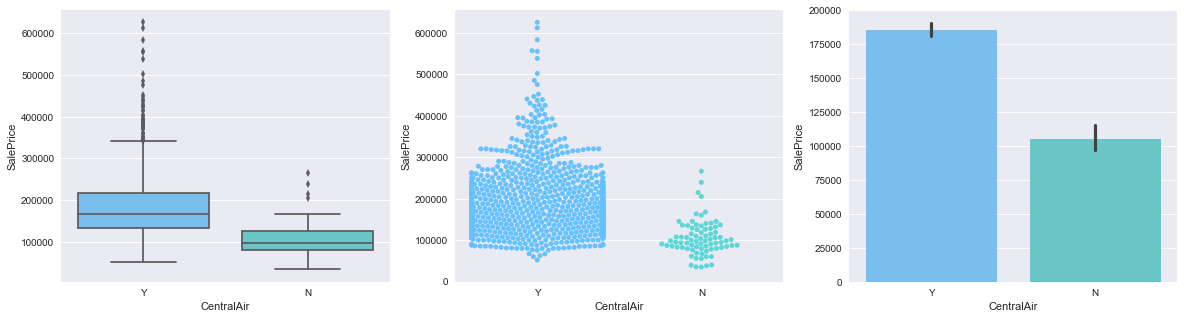

In [177]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="CentralAir", y="SalePrice", data=train, palette = mycols)

plt.subplot(1, 3, 2)
sns.swarmplot(x="CentralAir", y="SalePrice",data=train, size = 5,  palette = mycols)

plt.subplot(1, 3, 3)
sns.barplot(x="CentralAir", y="SalePrice", data=train, palette = mycols);

There are 2 classes. Non of them can be negligeable in term of number of houses.

In [178]:
all_data['CentralAir'] = all_data['CentralAir'].map({"Y":1, "N":0})
all_data['CentralAir'].unique()

array([1, 0], dtype=int64)

***ExterQual***
- Evaluates the quality of the material on the exterior.

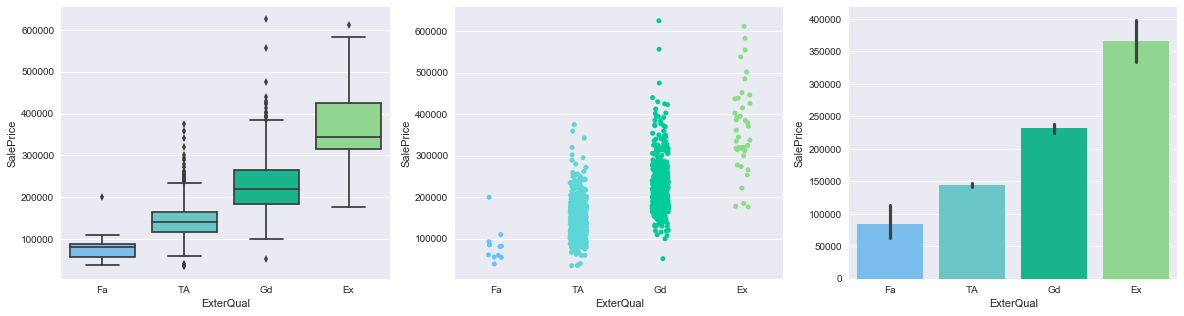

In [156]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="ExterQual", y="SalePrice", data=train, order=['Fa','TA','Gd', 'Ex'], palette = mycols)

plt.subplot(1, 3, 2)
sns.stripplot(x="ExterQual", y="SalePrice", data=train, size = 5, jitter = True, order=['Fa','TA','Gd', 'Ex'], palette = mycols);

plt.subplot(1, 3, 3)
sns.barplot(x="ExterQual", y="SalePrice", data=train, order=['Fa','TA','Gd', 'Ex'], palette = mycols);

We can see here that this feature shows a clear order and has a positive correlation with SalePrice. As the quality increases, so does the SalePrice. 

In [179]:
#all_data['ExterQual'] = all_data['ExterQual'].map({"Fa":1, "TA":2, "Gd":3, "Ex":4})
all_data['ExterQual'].unique()

array([ 4.,  3.,  5.,  2.])



***BsmtQual***

- Evaluates the height of the basement.

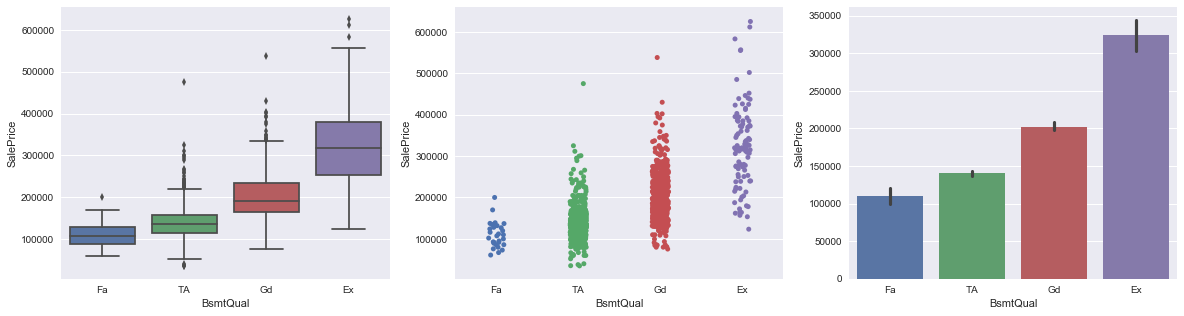

In [158]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="BsmtQual", y="SalePrice", data=train, order=['Fa', 'TA', 'Gd', 'Ex']);

plt.subplot(1, 3, 2)
sns.stripplot(x="BsmtQual", y="SalePrice", data=train, size = 5, jitter = True, order=['Fa', 'TA', 'Gd', 'Ex']);

plt.subplot(1, 3, 3)
sns.barplot(x="BsmtQual", y="SalePrice", data=train, order=['Fa', 'TA', 'Gd', 'Ex']);

This feature has two highly frequent categories but the values of SalePrice differ between each.

SalePrice is clearly affected by BsmtQual, with the better the quality being meaning the higher the price. the feature is clearly ordinal.

In [180]:
#all_data['BsmtQual'] = all_data['BsmtQual'].map({"None":0, "Fa":1, "TA":2, "Gd":3, "Ex":4})

all_data['BsmtQual'].unique()

array([  4.,   3.,   5.,  nan,   2.])

***BsmtCond***
- Evaluates the general condition of the basement.

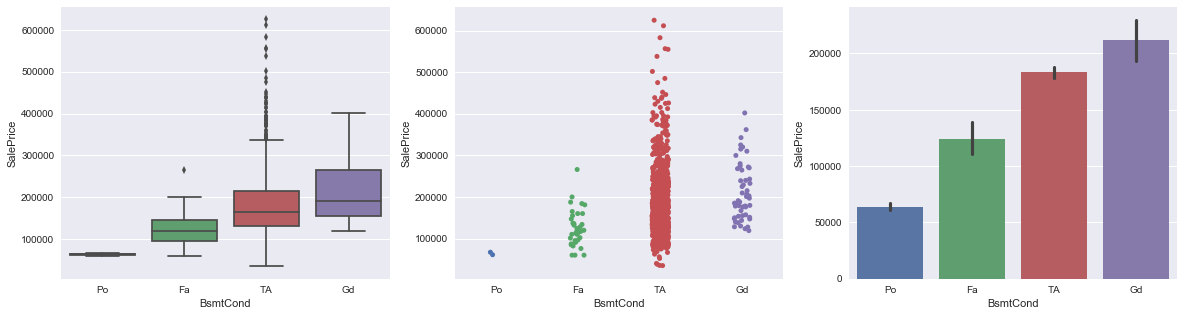

In [160]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="BsmtCond", y="SalePrice", data=train, order=['Po', 'Fa', 'TA', 'Gd']);

plt.subplot(1, 3, 2)
sns.stripplot(x="BsmtCond", y="SalePrice", data=train, size = 5, jitter = True, order=['Po', 'Fa', 'TA', 'Gd']);

plt.subplot(1, 3, 3)
sns.barplot(x="BsmtCond", y="SalePrice", data=train, order=['Po', 'Fa', 'TA', 'Gd']);

As the condition of the basement improves, the SalePrice also increases. It can be related to BsmtQual.

In [181]:
#all_data['BsmtCond'] = all_data['BsmtCond'].map({"None":0, "Po":1, "Fa":2, "TA":3, "Gd":4, "Ex":5})
all_data['BsmtCond'].unique()

array([  3.,   4.,  nan,   2.,   1.])

***BsmtExposure***
- Refers to walkout or garden level walls

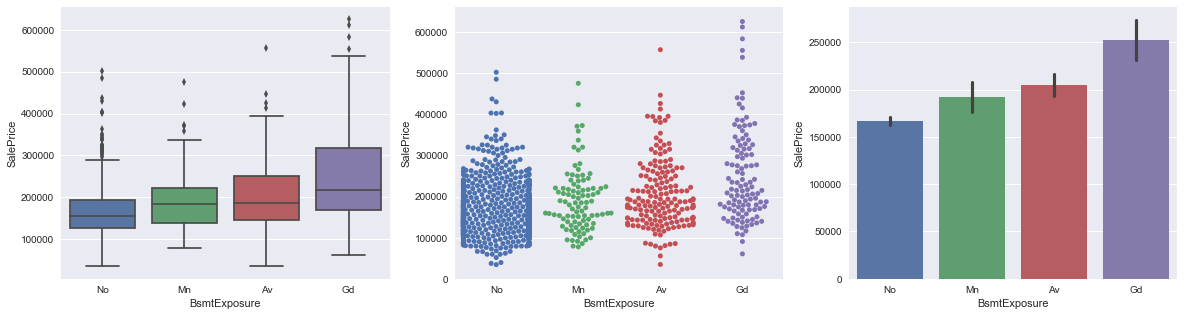

In [162]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="BsmtExposure", y="SalePrice", data=train, order=['No', 'Mn', 'Av', 'Gd']);

plt.subplot(1, 3, 2)
sns.swarmplot(x="BsmtExposure", y="SalePrice", data=train, size = 5,  order=['No', 'Mn', 'Av', 'Gd']);

plt.subplot(1, 3, 3)
sns.barplot(x="BsmtExposure", y="SalePrice", data=train, order=['No', 'Mn', 'Av', 'Gd']);

In [182]:
all_data['BsmtExposure'] = all_data['BsmtExposure'].map({"None":0, "No":1, "Mn":2, "Av":3, "Gd":4})

all_data['BsmtExposure'].unique()

array([1, 4, 2, 3, 0], dtype=int64)

As for the previous Bsmt features, as the amount of exposure increases, so does hte typical SalePrice. But here, the average difference of SalePrice between categories is quite low here, telling me that some houses sold for very high prices, even with no exposure.

***KitchenQual***
- Kitchen quality.

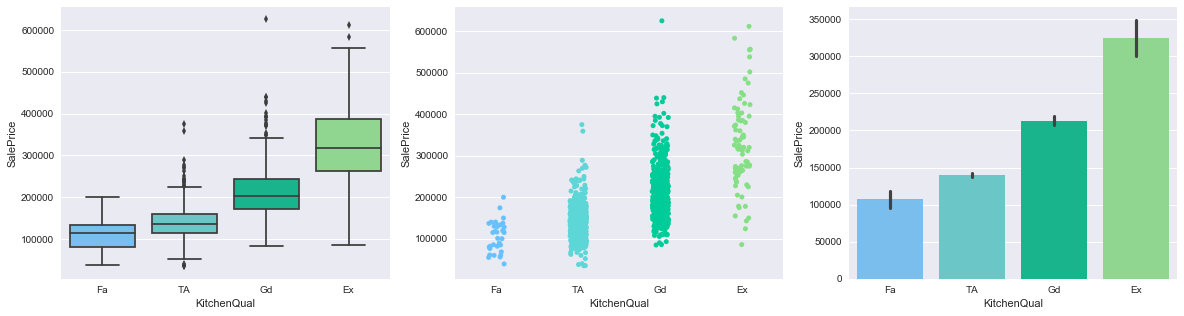

In [164]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="KitchenQual", y="SalePrice", data=train, order=["Fa", "TA", "Gd", "Ex"], palette = mycols)

plt.subplot(1, 3, 2)
sns.stripplot(x="KitchenQual", y="SalePrice", data=train, size = 5, jitter = True, order=["Fa", "TA", "Gd", "Ex"], palette = mycols);

plt.subplot(1, 3, 3)
sns.barplot(x="KitchenQual", y="SalePrice", data=train, order=["Fa", "TA", "Gd", "Ex"], palette = mycols);

There is a clear positive correlation with the SalePrice and the quality of the kitchen, which seems logical.


In [183]:
#all_data['KitchenQual'] = all_data['KitchenQual'].map({"Fa":1, "TA":2, "Gd":3, "Ex":4})
all_data['KitchenQual'].unique()

array([ 4.,  3.,  5.,  2.])

***Functional***
- Home functionality.

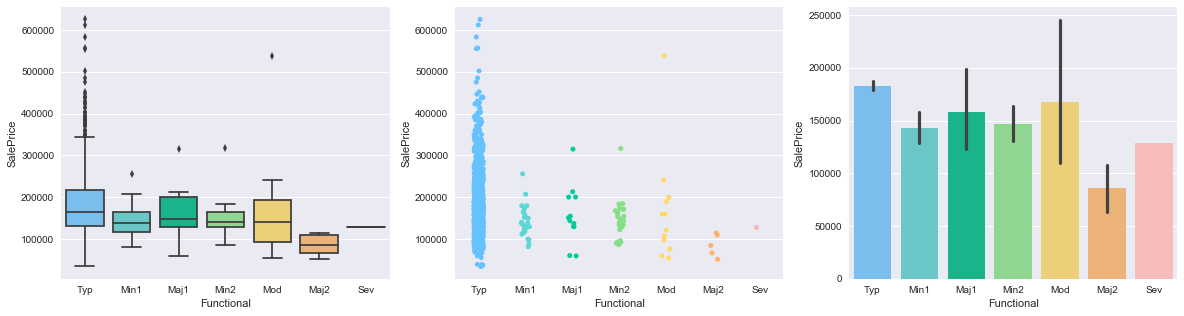

In [166]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="Functional", y="SalePrice", data=train, palette = mycols)

plt.subplot(1, 3, 2)
sns.stripplot(x="Functional", y="SalePrice", data=train, size = 5, jitter = True, palette = mycols);

plt.subplot(1, 3, 3)
sns.barplot(x="Functional", y="SalePrice", data=train, palette = mycols);

Here, a rank is also visible, but we have to reorder the classes.

In [184]:
all_data['Functional'] = all_data['Functional'].map({"Sev":1, "Maj2":2, "Maj1":3, "Mod":4, "Min2":5, "Min1":6, "Typ":7})
all_data['Functional'].unique()

array([7, 6, 3, 5, 4, 2, 1], dtype=int64)

***FireplaceQu***
- Fireplace quality.


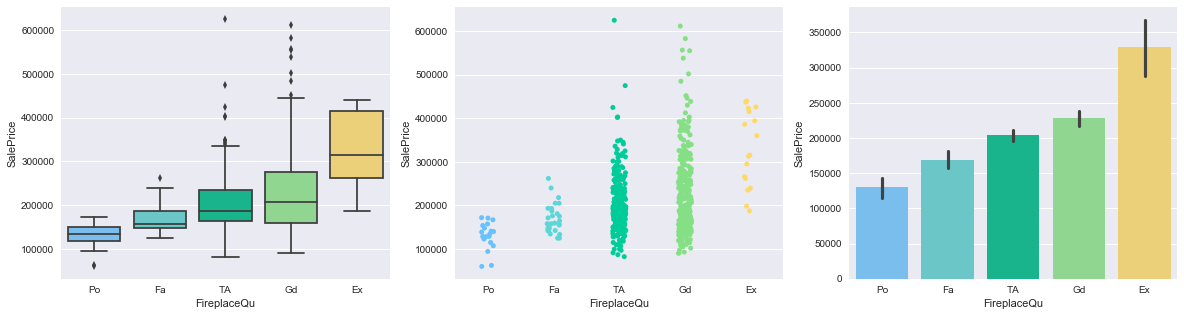

In [70]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="FireplaceQu", y="SalePrice", data=train, order=["Po", "Fa", "TA", "Gd", "Ex"], palette = mycols)

plt.subplot(1, 3, 2)
sns.stripplot(x="FireplaceQu", y="SalePrice", data=train, size = 5, jitter = True, order=["Po", "Fa", "TA", "Gd", "Ex"], palette = mycols);

plt.subplot(1, 3, 3)
sns.barplot(x="FireplaceQu", y="SalePrice", data=train, order=["Po", "Fa", "TA", "Gd", "Ex"], palette = mycols);

In [185]:
#all_data['FireplaceQu'] = all_data['FireplaceQu'].map({"None":0, "Po":1, "Fa":2, "TA":3, "Gd":4, "Ex":5})
all_data['FireplaceQu'].unique()

array([ nan,   3.,   4.,   2.,   5.,   1.])

***HeatingQC***
- Heating quality and condition.

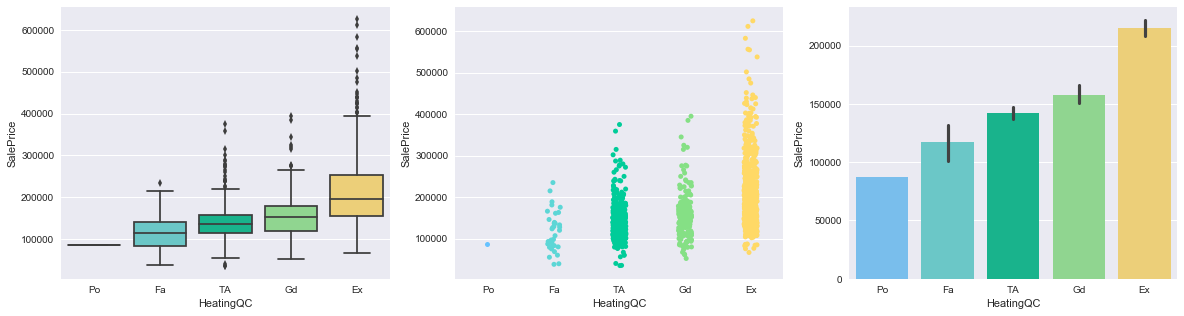

In [72]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="HeatingQC", y="SalePrice", data=train, order=["Po", "Fa", "TA", "Gd", "Ex"], palette = mycols)

plt.subplot(1, 3, 2)
sns.stripplot(x="HeatingQC", y="SalePrice", data=train, size = 5, jitter = True, order=["Po", "Fa", "TA", "Gd", "Ex"], palette = mycols);

plt.subplot(1, 3, 3)
sns.barplot(x="HeatingQC", y="SalePrice", data=train, order=["Po", "Fa", "TA", "Gd", "Ex"], palette = mycols);

##### We observe regarding the plotted results that the attributes are clearly distinguishable: their averages are orderered, the classes don't overloap alot (cf the box plot) so we can interpret the feature as a rank.
##### Because it exhibits an order, we will replace the values with ordinal numbers as below.

In [186]:
#all_data['HeatingQC'] = all_data['HeatingQC'].map({"Po":1, "Fa":2, "TA":3, "Gd":4, "Ex":5})

all_data['HeatingQC'].unique()

array([ 5.,  4.,  3.,  2.,  1.])

***BsmtFinType1***


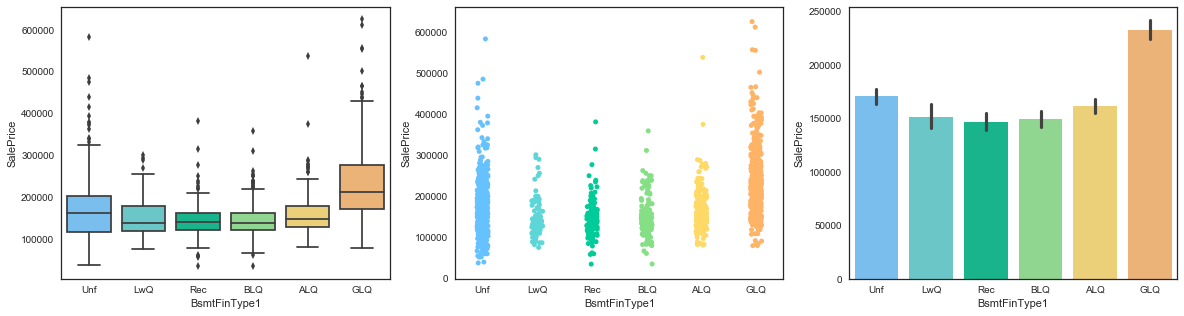

In [80]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="BsmtFinType1", y="SalePrice", data=train, order=["Unf", "LwQ", "Rec", "BLQ", "ALQ", "GLQ"], palette = mycols);

plt.subplot(1, 3, 2)
sns.stripplot(x="BsmtFinType1", y="SalePrice", data=train, size = 5, jitter = True, order=["Unf", "LwQ", "Rec", "BLQ", "ALQ", "GLQ"], palette = mycols);

plt.subplot(1, 3, 3)
sns.barplot(x="BsmtFinType1", y="SalePrice", data=train, order=["Unf", "LwQ", "Rec", "BLQ", "ALQ", "GLQ"], palette = mycols);

In [187]:
bsmt_fin_dict = {"None": 0, "Unf": 1, "LwQ": 2, "Rec": 3, "BLQ": 4, "ALQ": 5, "GLQ": 6}

all_data["BsmtFinType1"] = all_data["BsmtFinType1"].map(bsmt_fin_dict).astype(float)
all_data.head(3)

1stFlrSF  2ndFlrSF  3SsnPorch Alley  BedroomAbvGr BldgType  BsmtCond  \
0       856       854          0  None             3     1Fam       3.0   
1      1262         0          0  None             3     1Fam       3.0   
2       920       866          0  None             3     1Fam       3.0   

   BsmtExposure  BsmtFinSF1  BsmtFinSF2        ...         WoodDeckSF  \
0             1         706           0        ...                  0   
1             4         978           0        ...                298   
2             2         486           0        ...                  0   

  YearBuilt  YearRemodAdd  YrSold  TotalArea  TotalArea1st2nd  Age  \
0      2003          2003    2008    14452.0             1710   15   
1      1976          1976    2007    15486.0             1262   42   
2      2001          2002    2008    17542.0             1786   17   

  TimeSinceSold SeasonSold YearsSinceRemodel  
0            10          0                 5  
1            11          1                31  
2            10          3                 6  

[3 rows x 85 columns]

***BsmtFinType2***
- Rating of basement finished area (if multiple types)

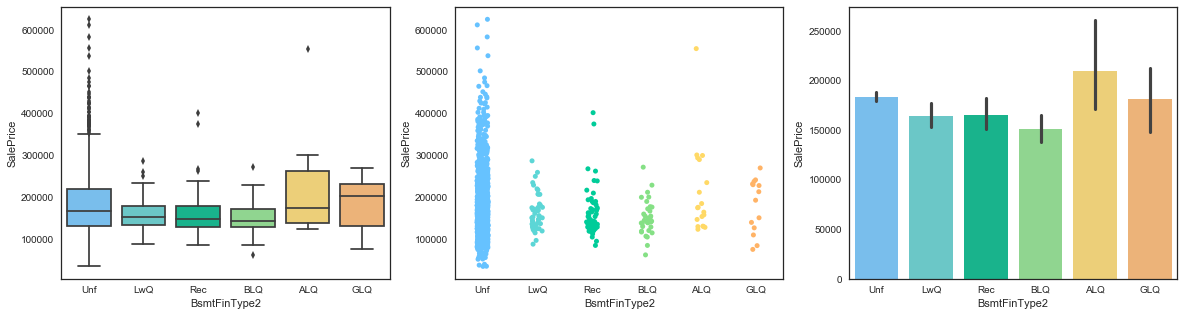

In [82]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="BsmtFinType2", y="SalePrice", data=train, order=["Unf", "LwQ", "Rec", "BLQ", "ALQ", "GLQ"], palette = mycols);

plt.subplot(1, 3, 2)
sns.stripplot(x="BsmtFinType2", y="SalePrice", data=train, size = 5, jitter = True, order=["Unf", "LwQ", "Rec", "BLQ", "ALQ", "GLQ"], palette = mycols);

plt.subplot(1, 3, 3)
sns.barplot(x="BsmtFinType2", y="SalePrice", data=train, order=["Unf", "LwQ", "Rec", "BLQ", "ALQ", "GLQ"], palette = mycols);

- There seems as though there are a lot of houses with unfinished second basements, and this may cause the skew in terms og SalePrice's being relatively high for these...
- There also looks to be only a few values for each of the other categories, with the highest average SalePrice coming from the second best category.
- Although this is intended to be an ordinal feature, we can see that the SalePrice does not necessarily increase with order. Hence, I will cerate dummy variables here.

The highest average price are demanded from houses with a paved driveway, and most houses in this erea seem to have one.

In [188]:
all_data["BsmtFinType2"] = all_data["BsmtFinType2"].map(bsmt_fin_dict).astype(float)
all_data.head(3)

1stFlrSF  2ndFlrSF  3SsnPorch Alley  BedroomAbvGr BldgType  BsmtCond  \
0       856       854          0  None             3     1Fam       3.0   
1      1262         0          0  None             3     1Fam       3.0   
2       920       866          0  None             3     1Fam       3.0   

   BsmtExposure  BsmtFinSF1  BsmtFinSF2        ...         WoodDeckSF  \
0             1         706           0        ...                  0   
1             4         978           0        ...                298   
2             2         486           0        ...                  0   

   YearBuilt  YearRemodAdd  YrSold  TotalArea  TotalArea1st2nd  Age  \
0       2003          2003    2008    14452.0             1710   15   
1       1976          1976    2007    15486.0             1262   42   
2       2001          2002    2008    17542.0             1786   17   

  TimeSinceSold SeasonSold YearsSinceRemodel  
0            10          0                 5  
1            11          1                31  
2            10          3                 6  

[3 rows x 85 columns]

***GarageFinish***
- Interior finish of the garage.

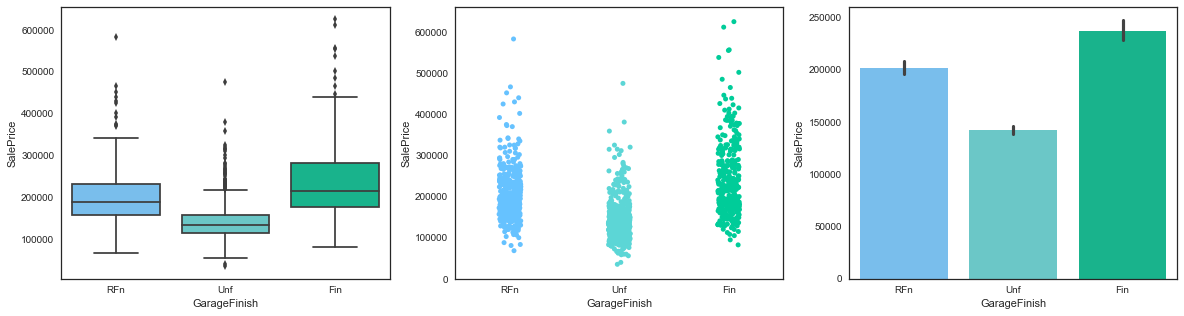

In [84]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="GarageFinish", y="SalePrice", data=train, palette = mycols)

plt.subplot(1, 3, 2)
sns.stripplot(x="GarageFinish", y="SalePrice", data=train, size = 5, jitter = True, palette = mycols);

plt.subplot(1, 3, 3)
sns.barplot(x="GarageFinish", y="SalePrice", data=train, palette = mycols);

Here we see a nice split between the 3 classes, with "Fin" producing the highest SalePrice's on average.

In [189]:

all_data["GarageFinish"] = all_data["GarageFinish"].map({"None": 0, "Unf": 1, "RFn": 2, "Fin": 3}).astype(float)
all_data.head(3)

1stFlrSF  2ndFlrSF  3SsnPorch Alley  BedroomAbvGr BldgType  BsmtCond  \
0       856       854          0  None             3     1Fam       3.0   
1      1262         0          0  None             3     1Fam       3.0   
2       920       866          0  None             3     1Fam       3.0   

   BsmtExposure  BsmtFinSF1  BsmtFinSF2        ...         WoodDeckSF  \
0             1         706           0        ...                  0   
1             4         978           0        ...                298   
2             2         486           0        ...                  0   

   YearBuilt  YearRemodAdd  YrSold  TotalArea  TotalArea1st2nd  Age  \
0       2003          2003    2008    14452.0             1710   15   
1       1976          1976    2007    15486.0             1262   42   
2       2001          2002    2008    17542.0             1786   17   

  TimeSinceSold SeasonSold YearsSinceRemodel  
0            10          0                 5  
1            11          1                31  
2            10          3                 6  

[3 rows x 85 columns]

***FireplaceQu***
- Fireplace quality.


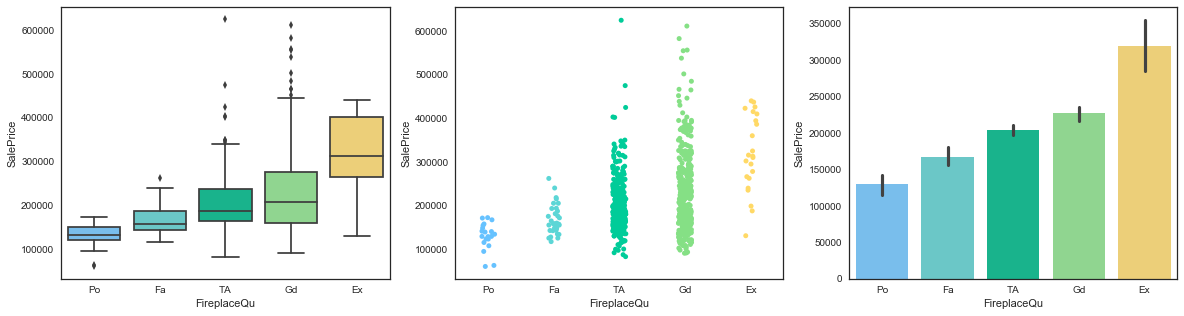

In [86]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="FireplaceQu", y="SalePrice", data=train, order=["Po", "Fa", "TA", "Gd", "Ex"], palette = mycols)

plt.subplot(1, 3, 2)
sns.stripplot(x="FireplaceQu", y="SalePrice", data=train, size = 5, jitter = True, order=["Po", "Fa", "TA", "Gd", "Ex"], palette = mycols);

plt.subplot(1, 3, 3)
sns.barplot(x="FireplaceQu", y="SalePrice", data=train, order=["Po", "Fa", "TA", "Gd", "Ex"], palette = mycols);

In [190]:
#all_data['FireplaceQu'] = all_data['FireplaceQu'].map({"None":0, "Po":1, "Fa":2, "TA":3, "Gd":4, "Ex":5})

all_data['FireplaceQu'].unique()

array([ nan,   3.,   4.,   2.,   5.,   1.])

## Clustering attributes
Here are the features where attributes need to be merge to have a better performence.

***Heating***
- Type of heating.

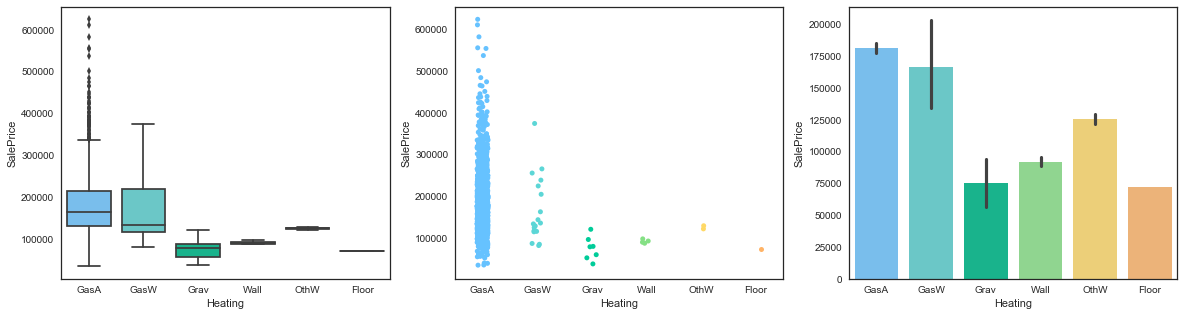

In [88]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="Heating", y="SalePrice", data=train, palette = mycols)

plt.subplot(1, 3, 2)
sns.stripplot(x="Heating", y="SalePrice", data=train, size = 5, jitter = True, palette = mycols);

plt.subplot(1, 3, 3)
sns.barplot(x="Heating", y="SalePrice", data=train, palette = mycols);

In [191]:
all_data['GasA_Flag'] = all_data['Heating'].map({"GasA":1, "GasW":0, "Grav":0, "Wall":0, "OthW":0, "Floor":0})
all_data.drop('Heating', axis=1, inplace=True)
all_data.head(3)

1stFlrSF  2ndFlrSF  3SsnPorch Alley  BedroomAbvGr BldgType  BsmtCond  \
0       856       854          0  None             3     1Fam       3.0   
1      1262         0          0  None             3     1Fam       3.0   
2       920       866          0  None             3     1Fam       3.0   

   BsmtExposure  BsmtFinSF1  BsmtFinSF2    ...     YearBuilt  YearRemodAdd  \
0             1         706           0    ...          2003          2003   
1             4         978           0    ...          1976          1976   
2             2         486           0    ...          2001          2002   

   YrSold  TotalArea  TotalArea1st2nd  Age  TimeSinceSold SeasonSold  \
0    2008    14452.0             1710   15             10          0   
1    2007    15486.0             1262   42             11          1   
2    2008    17542.0             1786   17             10          3   

  YearsSinceRemodel GasA_Flag  
0                 5         1  
1                31         1  
2                 6         1  

[3 rows x 85 columns]

In [192]:
# Simplifications of existing features into bad/average/good.
all_data["SimplOverallQual"] = all_data_0.OverallQual.replace(
    {1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2, 6 : 2, 7 : 3, 8 : 3, 9 : 3, 10 : 3})
all_data["SimplOverallCond"] = all_data_0.OverallCond.replace(
    {1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2, 6 : 2, 7 : 3, 8 : 3, 9 : 3, 10 : 3})
all_data["SimplPoolQC"] = all_data_0.PoolQC.replace(
    {1 : 1, 2 : 1, 3 : 2, 4 : 2})
all_data["SimplGarageCond"] = all_data_0.GarageCond.replace(
    {1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})
all_data["SimplGarageQual"] = all_data_0.GarageQual.replace(
    {1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})
all_data["SimplFireplaceQu"] = all_data_0.FireplaceQu.replace(
    {1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})
all_data["SimplFireplaceQu"] = all_data_0.FireplaceQu.replace(
    {1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})
all_data["SimplFunctional"] = all_data_0.Functional.replace(
    {1 : 1, 2 : 1, 3 : 2, 4 : 2, 5 : 3, 6 : 3, 7 : 3, 8 : 4})
all_data["SimplKitchenQual"] = all_data_0.KitchenQual.replace(
    {1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})
all_data["SimplHeatingQC"] = all_data_0.HeatingQC.replace(
    {1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})
all_data["SimplBsmtFinType1"] = all_data_0.BsmtFinType1.replace(
    {1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2, 6 : 2})
all_data["SimplBsmtFinType2"] = all_data_0.BsmtFinType2.replace(
    {1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2, 6 : 2})
all_data["SimplBsmtCond"] = all_data_0.BsmtCond.replace(
    {1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})
all_data["SimplBsmtQual"] = all_data_0.BsmtQual.replace(
    {1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})
all_data["SimplExterCond"] = all_data_0.ExterCond.replace(
    {1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})
all_data["SimplExterQual"] = all_data_0.ExterQual.replace(
    {1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})

<a id='treating_skewed_features'></a>
## 4.3 - Treating skewed features


As touched on earlier, skewed numeric variables are not desirable when using Machine Learning algorithms. The reason why we want to do this is move the models focus away from any extreme values, to create a generalised solution. We can tame these extreme values by transforming skewed features.

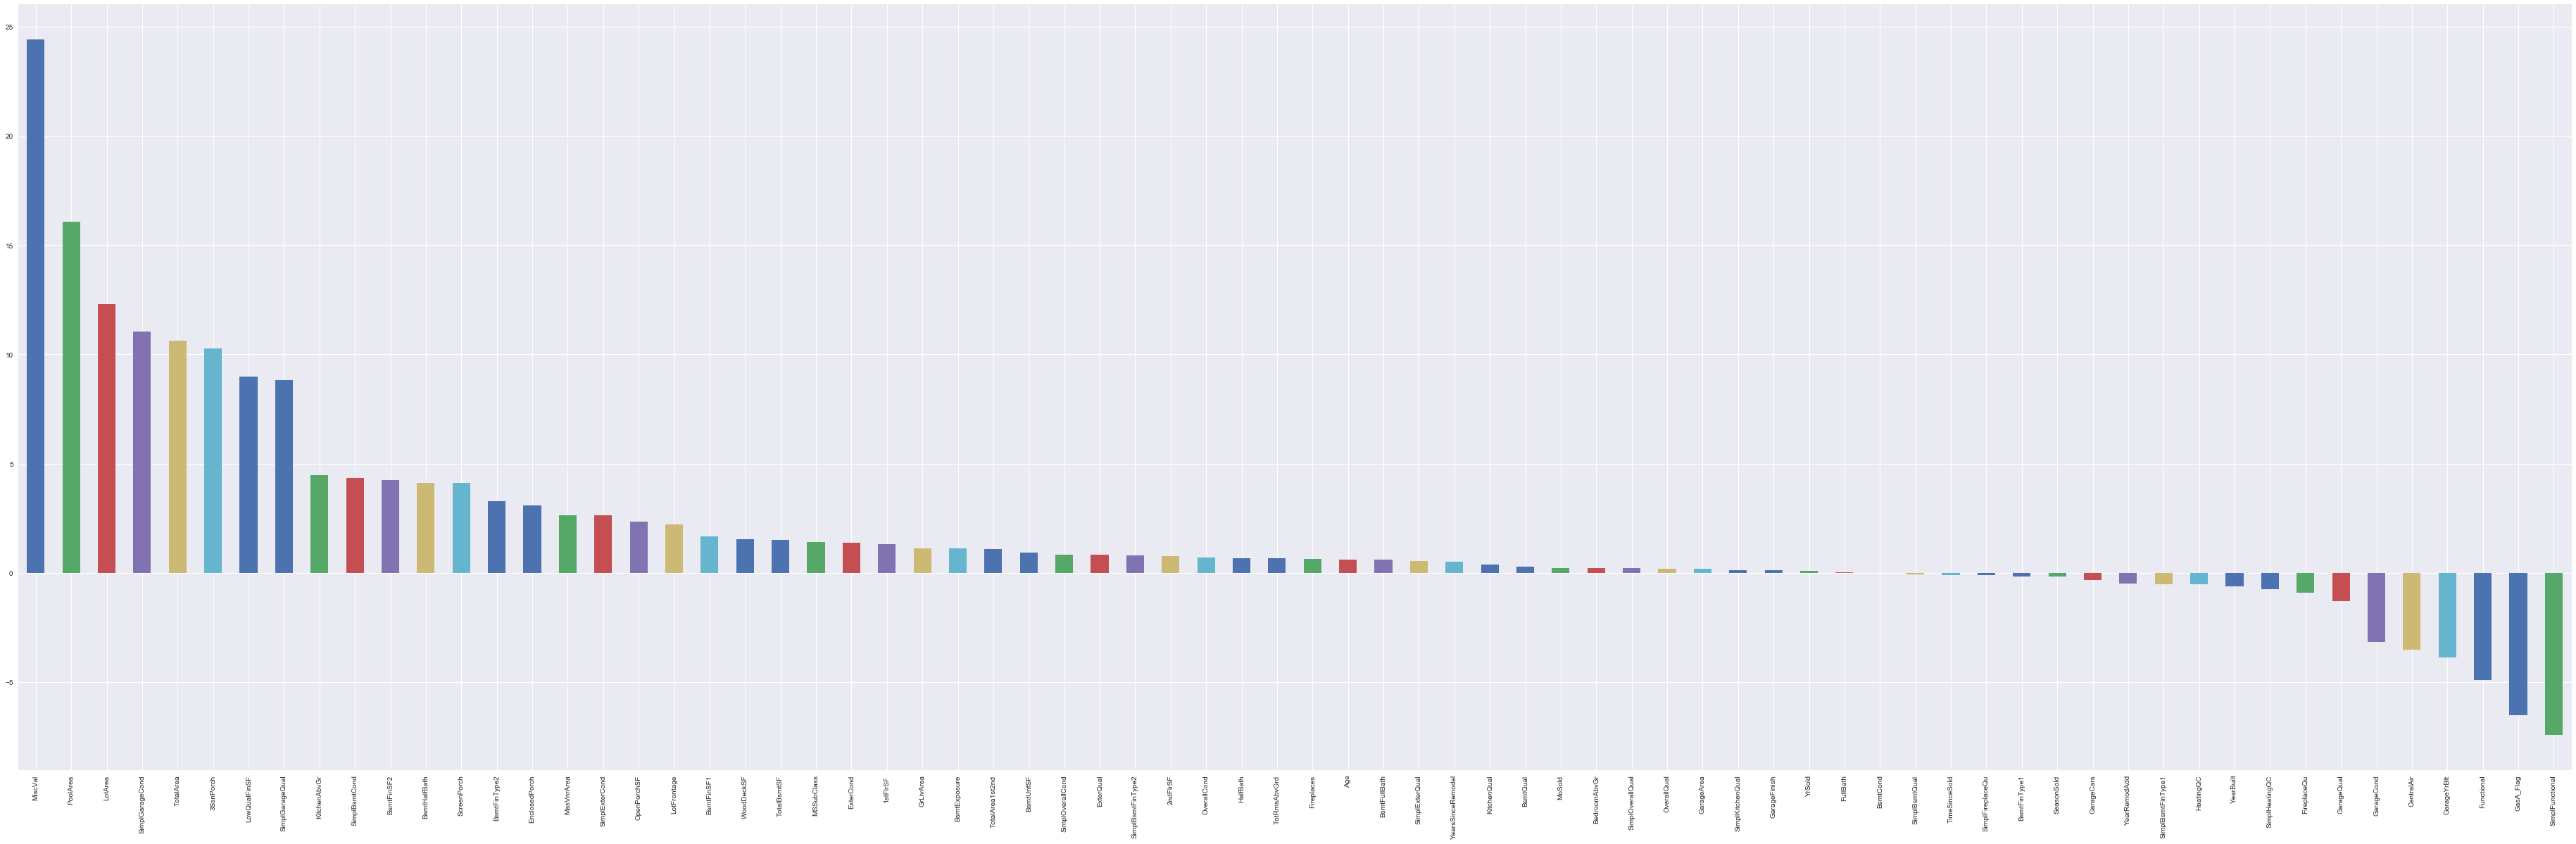

In [193]:
# First lets single out the numeric features
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

# Check how skewed they are
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)

plt.subplots(figsize =(65, 20))
skewed_feats.plot(kind='bar');

Clearly, we have a variety of positive and negative skewing features. Now I will transform the features with skew > 0.5 to follow more closely the normal distribution.

- **Note**: I am using the Box-Cox transformation to transform non-normal variables into a normal shape. Normality is an important assumption for many statistical techniques; if your data isn't normal, applying a Box-Cox means that you are able to run a broader number of tests.

In [194]:
numeric_features = all_data.dtypes[all_data.dtypes != "object"].index

# Transform the skewed numeric features by taking log(feature + 1).
# This will make the features more normal.
from scipy.stats import skew

skewed = all_data[numeric_features].apply(lambda x: skew(x.dropna().astype(float)))
skewed = skewed[skewed > 0.75]
skewed = skewed.index

all_data[skewed] = np.log1p(all_data[skewed])

In [196]:
# # Additional processing: scale the data.   
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# scaler.fit(all_data[numeric_features])

# scaled = scaler.transform(all_data[numeric_features])
# for i, col in enumerate(numeric_features):
#     all_data[col] = scaled[:, i]

In [ ]:
# skewness = skewed_feats[abs(skewed_feats) > 0.5]

# skewed_features = skewness.index
# lam = 0.15
# for feat in skewed_features:
#     all_data[feat] = boxcox1p(all_data[feat], lam)

# print(skewness.shape[0],  "skewed numerical features have been Box-Cox transformed")

In [197]:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewness = pd.DataFrame({'Skewed Features' :skewed_feats})
skewness.head()

Skewed Features
PoolArea               15.499664
SimplGarageCond        11.049840
SimplGarageQual         8.829138
3SsnPorch               7.718688
LowQualFinSF            7.444580

In [198]:
# skewness = skewness[abs(skewness) > 0.75]
# print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

# from scipy.special import boxcox1p
# skewed_features = skewness.index
# lam = 0.15
# for feat in skewed_features:
#     all_data[feat] = boxcox1p(all_data[feat], lam)
#     all_data[feat] += 1

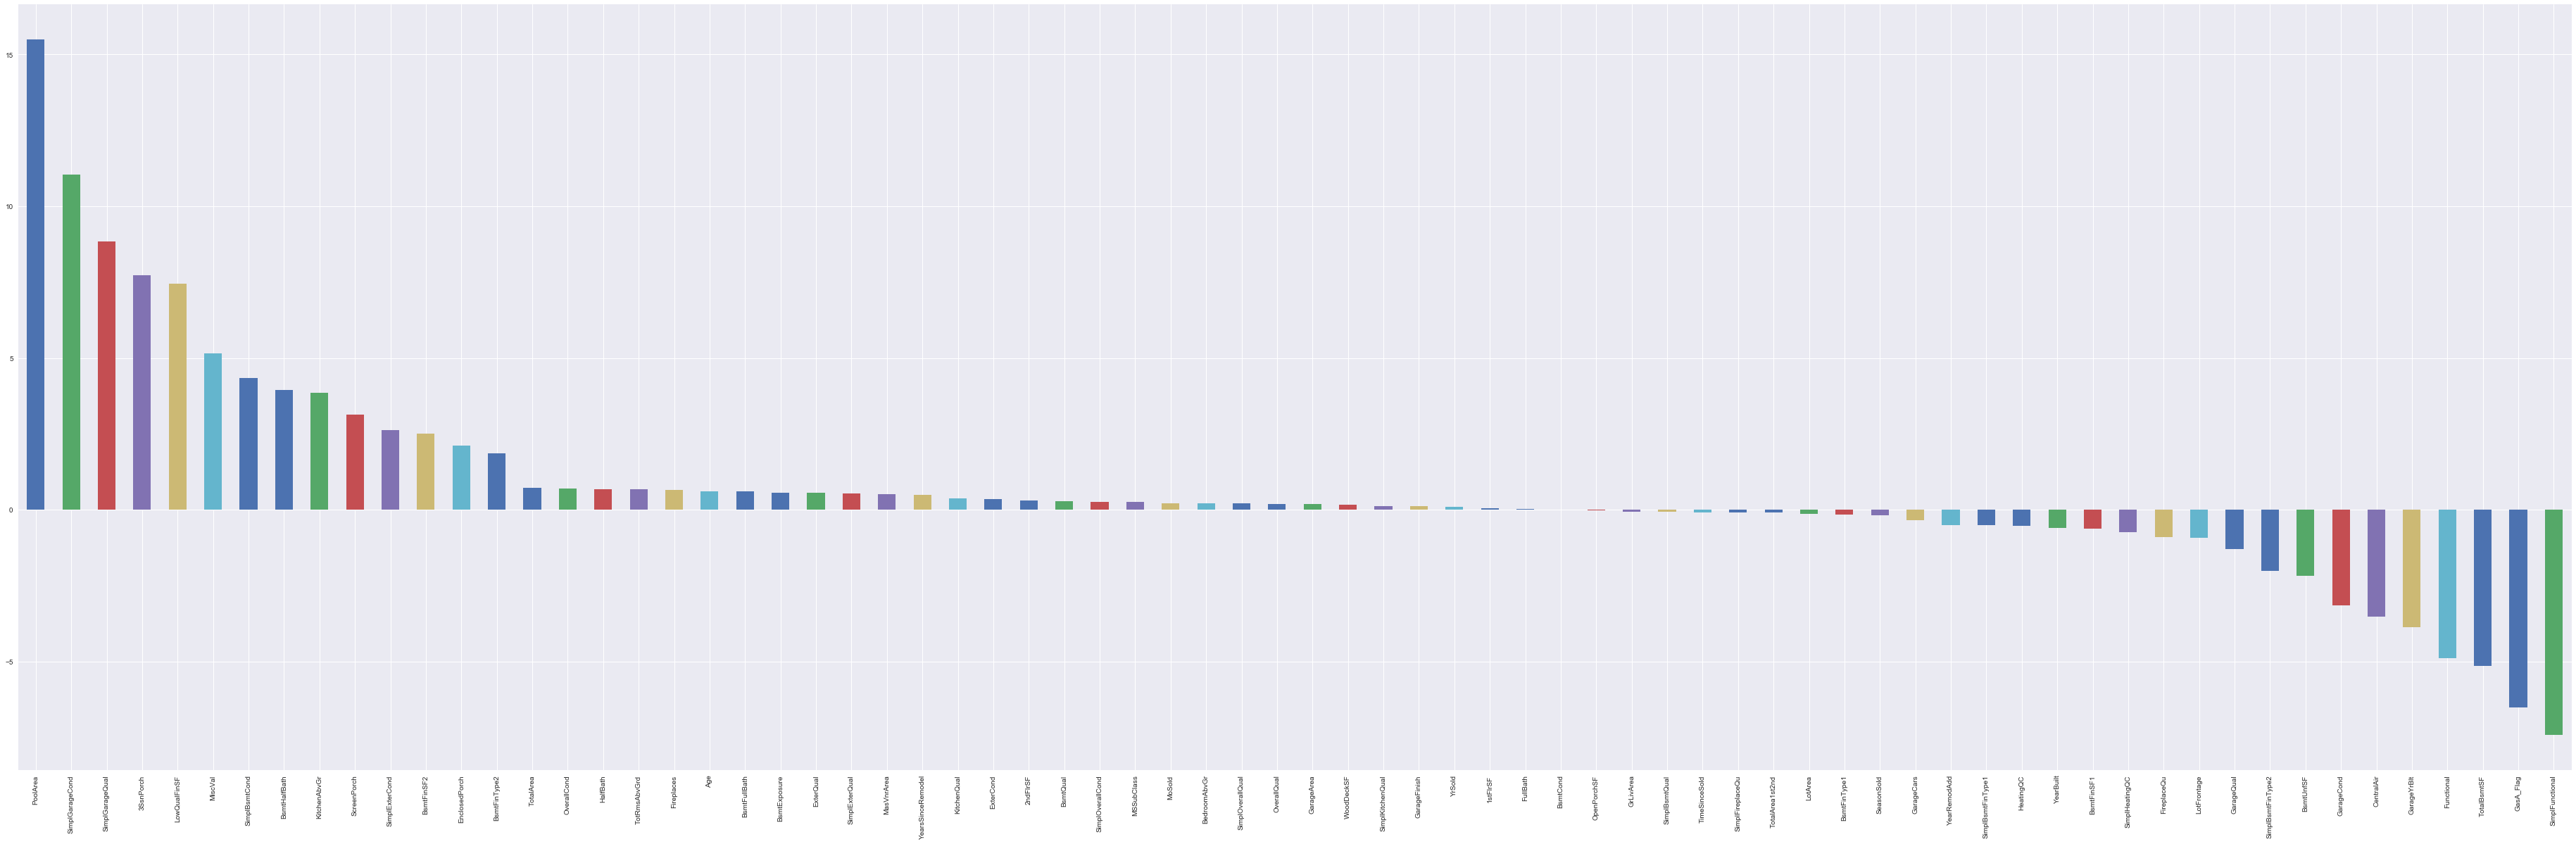

In [199]:
# First lets single out the numeric features
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

# Check how skewed they are
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)

plt.subplots(figsize =(65, 20))
skewed_feats.plot(kind='bar');

***


<a id='Treat_non_numerical_features_categorical'></a>
## 4.4  Treat non numerical features - categorical

Here, we deal with the features we talked about on part 4.2. That is to say, we will create functions using get_dummies.

The `onehot()` function converts a categorical variable into a set of dummies ("one-hot encoding" as Amit calls it)

In [200]:
def onehot(onehot_df, df, column_name, fill_na, drop_name):
    onehot_df[column_name] = df[column_name]
    if fill_na is not None:
        onehot_df[column_name].fillna(fill_na, inplace=True)

    dummies = pd.get_dummies(onehot_df[column_name], prefix="_" + column_name)
    
    # Dropping one of the columns actually made the results slightly worse.
    # if drop_name is not None:
    #     dummies.drop(["_" + column_name + "_" + drop_name], axis=1, inplace=True)

    onehot_df = onehot_df.join(dummies)
    onehot_df = onehot_df.drop([column_name], axis=1)
    return onehot_df

Listing the non numerical values

In [201]:
categorical_features = train.select_dtypes(exclude=[np.number])
categorical_features.dtypes

MSZoning         object
Street           object
Alley            object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Heating          object
HeatingQC        object
CentralAir       object
Electrical       object
KitchenQual      object
Functional       object
FireplaceQu      object
GarageType       object
GarageFinish     object
GarageQual       object
GarageCond       object
PavedDrive       object
PoolQC           object
Fence            object
MiscFeature      object
SaleType        

The `factorize()` function converts categorical features into ordinal numbers:

In [203]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

def factorize(df, factor_df, column, fill_na=None):
    factor_df[column] = df[column]
    if fill_na is not None:
        factor_df[column].fillna(fill_na, inplace=True)
    le.fit(factor_df[column].unique())
    factor_df[column] = le.transform(factor_df[column])
    return factor_df

In [204]:
# Add categorical features as numbers too. It seems to help a bit.
all_data = factorize(all_data_0, all_data, "MSSubClass")
all_data = factorize(all_data_0, all_data, "MSZoning", "RL")
all_data = factorize(all_data_0, all_data, "LotConfig")
all_data = factorize(all_data_0, all_data, "Neighborhood")
all_data = factorize(all_data_0, all_data, "Condition1")
all_data = factorize(all_data_0, all_data, "BldgType")
all_data = factorize(all_data_0, all_data, "HouseStyle")
all_data = factorize(all_data_0, all_data, "RoofStyle")
all_data = factorize(all_data_0, all_data, "Exterior1st", "Other")
all_data = factorize(all_data_0, all_data, "Exterior2nd", "Other")
all_data = factorize(all_data_0, all_data, "MasVnrType", "None")
all_data = factorize(all_data_0, all_data, "Foundation")
all_data = factorize(all_data_0, all_data, "SaleType", "Oth")
all_data = factorize(all_data_0, all_data, "SaleCondition")

***MSZoning***
- Identifies the general zoning classification of the sale. 

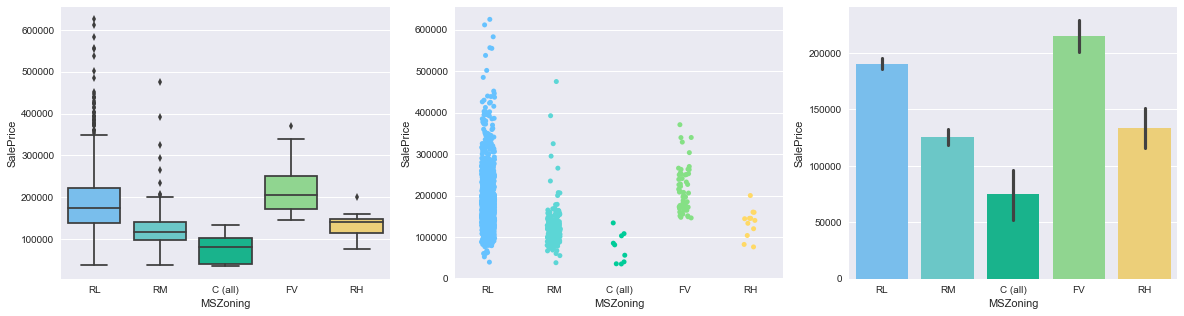

In [205]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="MSZoning", y="SalePrice", data=train, palette = mycols)

plt.subplot(1, 3, 2)
sns.stripplot(x="MSZoning", y="SalePrice", data=train, size = 5, jitter = True, palette = mycols);

plt.subplot(1, 3, 3)
sns.barplot(x="MSZoning", y="SalePrice", data=train, palette = mycols);

##### We can notice that we could tweack more our new values. For instance, instead of choosing 1,2,3,4,5 we could choose values near from the averages of each class. The order of the value would be best represented. But at the end, the difference of accuracy between these two choices were not differant enought so we prefered to keep simple integer values.
##### Since we are in a challenge where every detail can matter, we decided to tweack the model by handling these ordinal features one by one. For being considered as ordinal, a feature has to have distinguishable ordered attributes, and there should be a coherence in practice (as it is the case here).

##### This feature is by definition a categorization of the house regading its place. There is no obvious link between the attributes. Let's use 'get_dummies'. Now, we clearly see our new features:

In [206]:
all_data = onehot(all_data, all_data_0, "MSZoning", "RL", "RH")
all_data.head(3)

1stFlrSF  2ndFlrSF  3SsnPorch Alley  BedroomAbvGr  BldgType  BsmtCond  \
0  6.753438  6.751101        0.0  None             3         0       3.0   
1  7.141245  0.000000        0.0  None             3         0       3.0   
2  6.825460  6.765039        0.0  None             3         0       3.0   

   BsmtExposure  BsmtFinSF1  BsmtFinSF2     ...      SimplBsmtFinType2  \
0      0.693147    6.561031         0.0     ...               0.693147   
1      1.609438    6.886532         0.0     ...               0.693147   
2      1.098612    6.188264         0.0     ...               0.693147   

   SimplBsmtCond  SimplBsmtQual  SimplExterCond  SimplExterQual  _MSZoning_0  \
0       0.693147            2.0        0.693147             2.0            0   
1       0.693147            2.0        0.693147             1.0            0   
2       0.693147            2.0        0.693147             2.0            0   

   _MSZoning_1  _MSZoning_2 _MSZoning_3 _MSZoning_4  
0            0            0           1           0  
1            0            0           1           0  
2            0            0           1           0  

[3 rows x 104 columns]

##### 'get_dummies' is well adapted for categorical features: the added features depicts a belonging. But, we can observe that some features have more information to offer. First, non numerical values can have ordinal properties. This is the case of HeatingQC whose attributes are positivly correlated with SalePrice. 
##### In practice, it is logical that a house price grows with its heating quality. It is likely that a luxury home has an exelent heating.


In [207]:
all_data = onehot(all_data, all_data_0, "MSSubClass", None, "40")

***BldgType***
- Type of dwelling.

##### Among these features, some attributes bring similar information, or have the same behaviours. Under some conditions, we can merge them. Let's take BLdgType as an example.

##### The different categories exhibit a range of average SalePrice's.  We can  see that the variance within classes 2fmCon, Duplex, and Twnhs is quite tight, with only a few extreme values in each case. In practice, they represent confortable dewlings, so we can cluster them with a simple mapping. Then, we use get_dummies as previously.


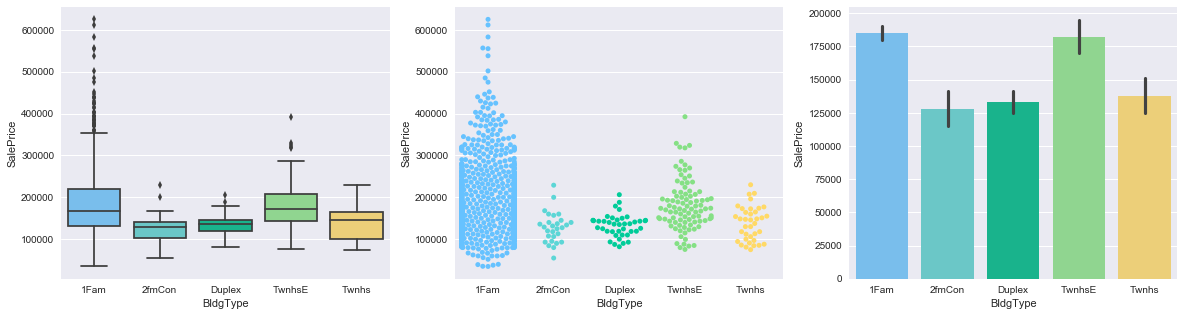

In [208]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="BldgType", y="SalePrice", data=train, palette = mycols);

plt.subplot(1, 3, 2)
sns.swarmplot(x="BldgType", y="SalePrice", data=train, size = 5, palette = mycols);

plt.subplot(1, 3, 3)
sns.barplot(x="BldgType", y="SalePrice", data=train, palette = mycols);

##### The different categories exhibit a range of average SalePrice's.  We can  see that the variance within classes 2fmCon, Duplex, and Twnhs is quite tight, with only a few extreme values in each case. In practice, they represent confortable dewlings, so we can cluster them with a simple mapping. Then, we use get_dummies as previously.


In [209]:
#all_data['BldgType'] = all_data['BldgType'].astype(str)
all_data['BldgType'] = all_data['BldgType'].map({"1Fam":"1Fam", "2fmCon":"confort", "Duplex":"confort", "TwnhsE":"TwnhsE", "Twnhs":"confort"})

all_data.head(3)

1stFlrSF  2ndFlrSF  3SsnPorch Alley  BedroomAbvGr BldgType  BsmtCond  \
0  6.753438  6.751101        0.0  None             3      NaN       3.0   
1  7.141245  0.000000        0.0  None             3      NaN       3.0   
2  6.825460  6.765039        0.0  None             3      NaN       3.0   

   BsmtExposure  BsmtFinSF1  BsmtFinSF2      ...        _MSSubClass_5  \
0      0.693147    6.561031         0.0      ...                    1   
1      1.609438    6.886532         0.0      ...                    0   
2      1.098612    6.188264         0.0      ...                    1   

   _MSSubClass_6  _MSSubClass_7  _MSSubClass_8  _MSSubClass_9  _MSSubClass_10  \
0              0              0              0              0               0   
1              0              0              0              0               0   
2              0              0              0              0               0   

   _MSSubClass_11  _MSSubClass_12 _MSSubClass_13 _MSSubClass_14  
0               0               0              0              0  
1               0               0              0              0  
2               0               0              0              0  

[3 rows x 118 columns]

 There are extreme values for some categories and a varying SalePrice across classes.

In [210]:
all_data = onehot(all_data, all_data_0, "BldgType", None, "2fmCon")

***GarageType***
- Garage location.

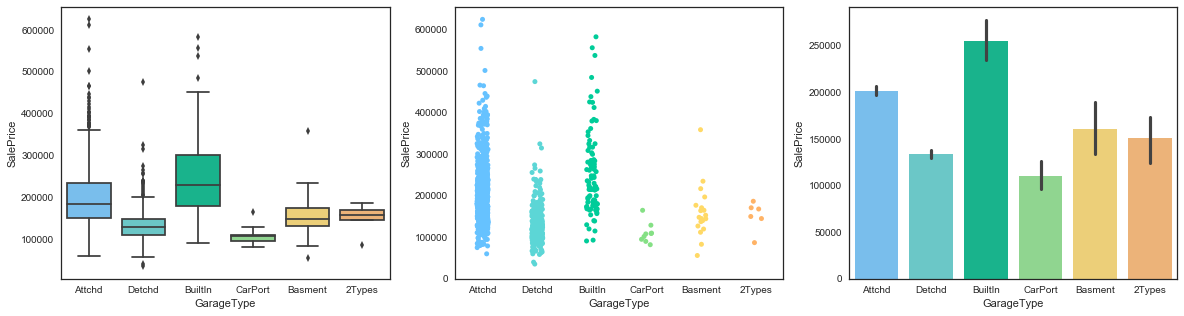

In [102]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="GarageType", y="SalePrice", data=train, palette = mycols)

plt.subplot(1, 3, 2)
sns.stripplot(x="GarageType", y="SalePrice", data=train, size = 5, jitter = True, palette = mycols);

plt.subplot(1, 3, 3)
sns.barplot(x="GarageType", y="SalePrice", data=train, palette = mycols);

In [211]:
all_data = onehot(all_data, all_data_0, "GarageType", "None", "CarPort")
all_data.head(3)

1stFlrSF  2ndFlrSF  3SsnPorch Alley  BedroomAbvGr  BsmtCond  BsmtExposure  \
0  6.753438  6.751101        0.0  None             3       3.0      0.693147   
1  7.141245  0.000000        0.0  None             3       3.0      1.609438   
2  6.825460  6.765039        0.0  None             3       3.0      1.098612   

   BsmtFinSF1  BsmtFinSF2  BsmtFinType1        ...         _BldgType_2  \
0    6.561031         0.0           6.0        ...                   0   
1    6.886532         0.0           5.0        ...                   0   
2    6.188264         0.0           6.0        ...                   0   

   _BldgType_3  _BldgType_4  _GarageType_2Types  _GarageType_Attchd  \
0            0            0                   0                   1   
1            0            0                   0                   1   
2            0            0                   0                   1   

   _GarageType_Basment  _GarageType_BuiltIn _GarageType_CarPort  \
0                    0                    0                   0   
1                    0                    0                   0   
2                    0                    0                   0   

  _GarageType_Detchd  _GarageType_None  
0                  0                 0  
1                  0                 0  
2                  0                 0  

[3 rows x 128 columns]

***Street***
- Type of road access to the property.

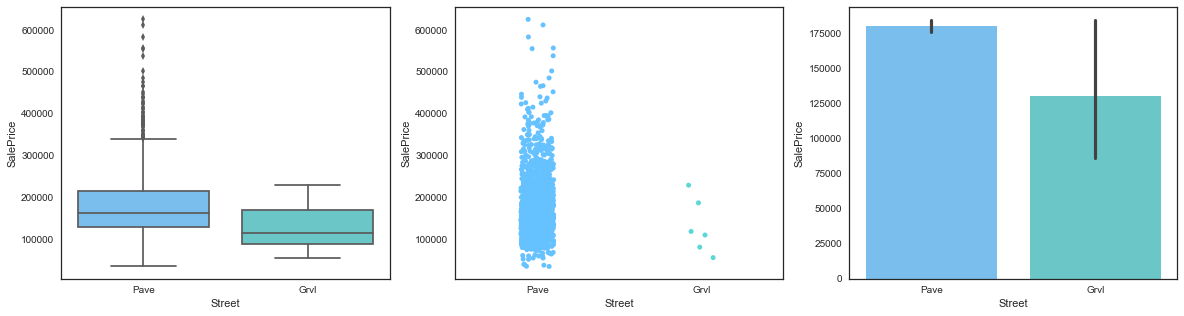

In [104]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="Street", y="SalePrice", data=train, palette = mycols)

plt.subplot(1, 3, 2)
sns.stripplot(x="Street", y="SalePrice", data=train, size = 5, jitter = True, palette = mycols);

plt.subplot(1, 3, 3)
sns.barplot(x="Street", y="SalePrice", data=train, palette = mycols);

 Each class has quite a unique range of values for SalePrice, the only class that stands out is "BrkCmn", which has a low frequency.


- With such a lower number of observations being assigned to the class "Grvl" it is redundant within the model.
- Hence, I will drop this feature.

In [212]:
all_data.drop('Street', axis=1, inplace=True)

***LotShape***
- General shape of property.

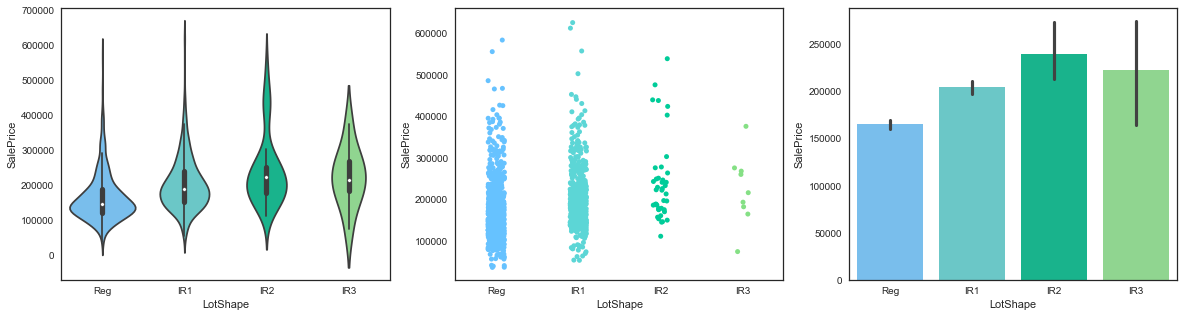

In [106]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.violinplot(x="LotShape", y="SalePrice", data=train, palette = mycols)

plt.subplot(1, 3, 2)
sns.stripplot(x="LotShape", y="SalePrice", data=train, size = 5, jitter = True, palette = mycols);

plt.subplot(1, 3, 3)
sns.barplot(x="LotShape", y="SalePrice", data=train, palette = mycols);

In [213]:
all_data = onehot(all_data, all_data_0, "LotShape", None, "IR3")
all_data.head(3)

1stFlrSF  2ndFlrSF  3SsnPorch Alley  BedroomAbvGr  BsmtCond  BsmtExposure  \
0  6.753438  6.751101        0.0  None             3       3.0      0.693147   
1  7.141245  0.000000        0.0  None             3       3.0      1.609438   
2  6.825460  6.765039        0.0  None             3       3.0      1.098612   

   BsmtFinSF1  BsmtFinSF2  BsmtFinType1      ...        _GarageType_Attchd  \
0    6.561031         0.0           6.0      ...                         1   
1    6.886532         0.0           5.0      ...                         1   
2    6.188264         0.0           6.0      ...                         1   

   _GarageType_Basment  _GarageType_BuiltIn  _GarageType_CarPort  \
0                    0                    0                    0   
1                    0                    0                    0   
2                    0                    0                    0   

   _GarageType_Detchd  _GarageType_None  _LotShape_IR1 _LotShape_IR2  \
0                   0                 0              0             0   
1                   0                 0              0             0   
2                   0                 0              1             0   

  _LotShape_IR3  _LotShape_Reg  
0             0              1  
1             0              1  
2             0              0  

[3 rows x 130 columns]

***ExterCond***
- Evaluates the present condition of the material on the exterior. 

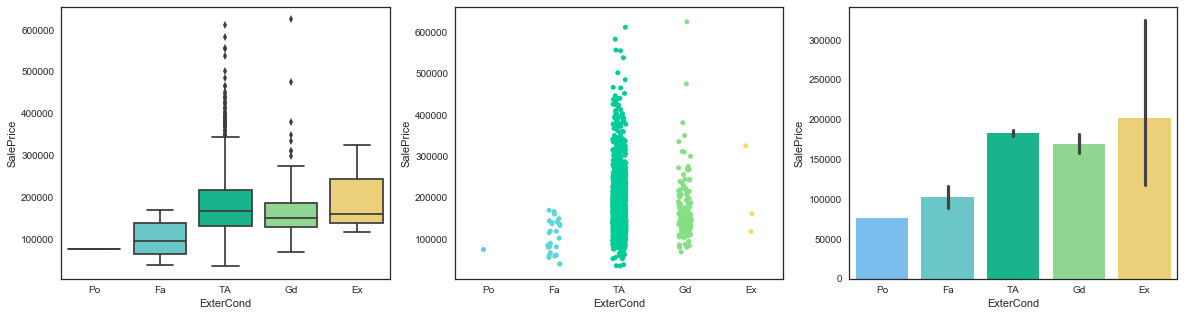

In [108]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="ExterCond", y="SalePrice", data=train, order=['Po','Fa','TA','Gd', 'Ex'], palette = mycols)

plt.subplot(1, 3, 2)
sns.stripplot(x="ExterCond", y="SalePrice", data=train, size = 5, jitter = True, order=['Po','Fa','TA','Gd', 'Ex'], palette = mycols);

plt.subplot(1, 3, 3)
sns.barplot(x="ExterCond", y="SalePrice", data=train, order=['Po','Fa','TA','Gd', 'Ex'], palette = mycols);

In [214]:

all_data = onehot(all_data, all_data_0, "ExterCond", "None", "Ex")

This categorical feature has an order, but the SalePrice does not necessarily correlate with this order.

***Alley***
- Type of alley access to the property.

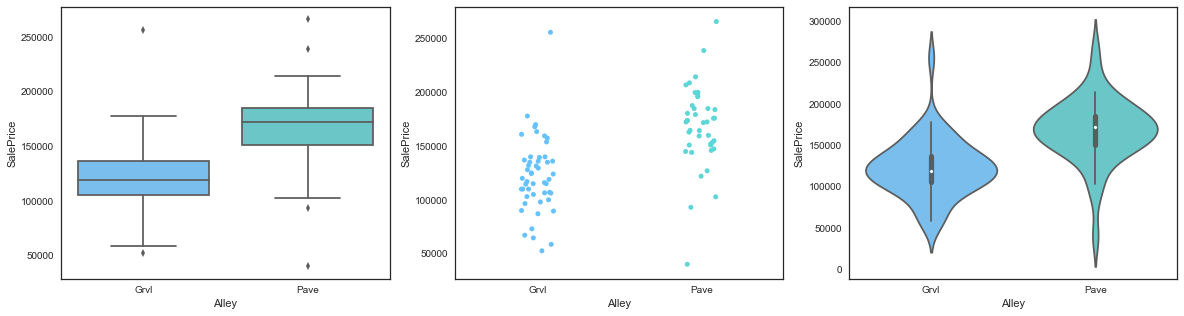

In [110]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="Alley", y="SalePrice", data=train, palette = mycols)

plt.subplot(1, 3, 2)
sns.stripplot(x="Alley", y="SalePrice", data=train, size = 5, jitter = True, palette = mycols);

plt.subplot(1, 3, 3)
sns.violinplot(x="Alley", y="SalePrice", data=train, palette = mycols);

In [215]:
all_data = onehot(all_data, all_data_0, "Alley", "None", "Grvl")
all_data.head(3)

1stFlrSF  2ndFlrSF  3SsnPorch  BedroomAbvGr  BsmtCond  BsmtExposure  \
0  6.753438  6.751101        0.0             3       3.0      0.693147   
1  7.141245  0.000000        0.0             3       3.0      1.609438   
2  6.825460  6.765039        0.0             3       3.0      1.098612   

   BsmtFinSF1  BsmtFinSF2  BsmtFinType1  BsmtFinType2     ...       \
0    6.561031         0.0           6.0      0.693147     ...        
1    6.886532         0.0           5.0      0.693147     ...        
2    6.188264         0.0           6.0      0.693147     ...        

   _LotShape_IR3  _LotShape_Reg  _ExterCond_0.6931471805599453  \
0              0              1                              0   
1              0              1                              0   
2              0              0                              0   

   _ExterCond_1.0986122886681098  _ExterCond_1.3862943611198906  \
0                              0                              1   
1                              0                              1   
2                              0                              1   

   _ExterCond_1.6094379124341003 _ExterCond_1.791759469228055 _Alley_Grvl  \
0                              0                            0           0   
1                              0                            0           0   
2                              0                            0           0   

   _Alley_None  _Alley_Pave  
0            1            0  
1            1            0  
2            1            0  

[3 rows x 136 columns]

***LotConfig***
- Lot configuration.

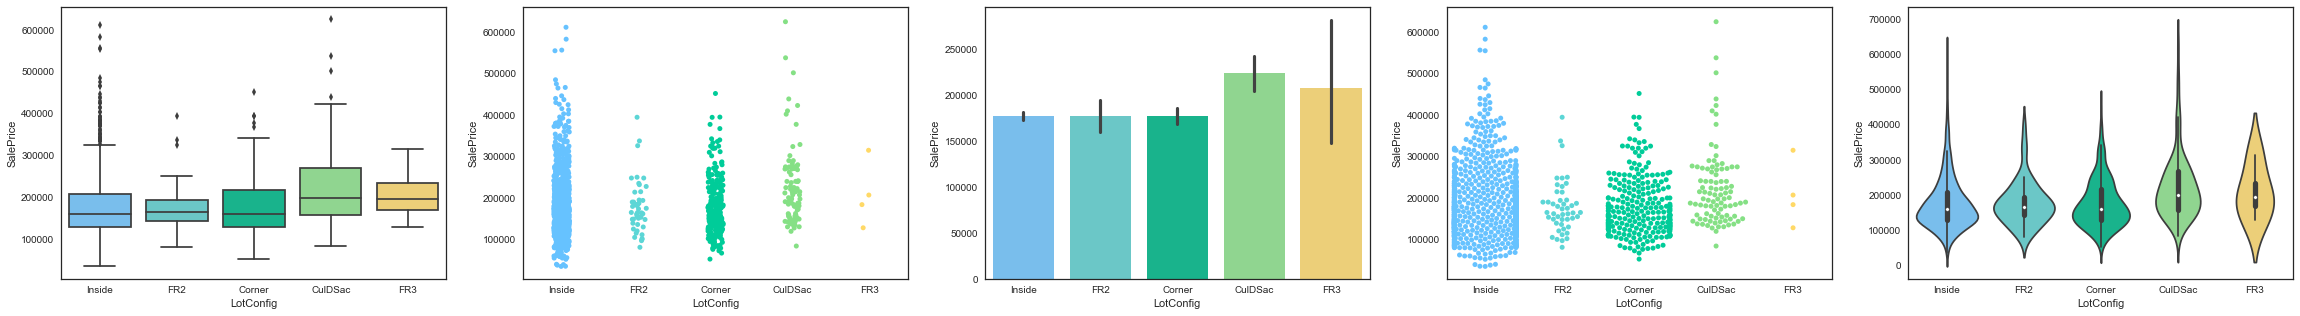

In [112]:
plt.subplots(figsize =(40, 5))

plt.subplot(1, 5, 1)
sns.boxplot(x="LotConfig", y="SalePrice", data=train, palette = mycols)

plt.subplot(1, 5, 2)
sns.stripplot(x="LotConfig", y="SalePrice", data=train, size = 5, jitter = True, palette = mycols);

plt.subplot(1, 5, 3)
sns.barplot(x="LotConfig", y="SalePrice", data=train, palette = mycols);

plt.subplot(1, 5, 4)
sns.swarmplot(x="LotConfig", y="SalePrice",data=train, size = 5,  palette = mycols)

plt.subplot(1, 5, 5)
sns.violinplot(x="LotConfig", y="SalePrice", data=train, palette = mycols);

The feature has a lot of attributes, all the above graphs provide usefull information.
We can cluster "FR2" and "FR3" into the definition frontage, since they have involve few number of houses, and a common mean.

In [216]:
all_data['LotConfig'] = all_data['LotConfig'].map({"Inside":"Inside", "FR2":"FR", "Corner":"Corner", "CulDSac":"CulDSac", "FR3":"FR"})


all_data.head(3)

1stFlrSF  2ndFlrSF  3SsnPorch  BedroomAbvGr  BsmtCond  BsmtExposure  \
0  6.753438  6.751101        0.0             3       3.0      0.693147   
1  7.141245  0.000000        0.0             3       3.0      1.609438   
2  6.825460  6.765039        0.0             3       3.0      1.098612   

   BsmtFinSF1  BsmtFinSF2  BsmtFinType1  BsmtFinType2     ...       \
0    6.561031         0.0           6.0      0.693147     ...        
1    6.886532         0.0           5.0      0.693147     ...        
2    6.188264         0.0           6.0      0.693147     ...        

   _LotShape_IR3  _LotShape_Reg  _ExterCond_0.6931471805599453  \
0              0              1                              0   
1              0              1                              0   
2              0              0                              0   

   _ExterCond_1.0986122886681098  _ExterCond_1.3862943611198906  \
0                              0                              1   
1                              0                              1   
2                              0                              1   

   _ExterCond_1.6094379124341003 _ExterCond_1.791759469228055 _Alley_Grvl  \
0                              0                            0           0   
1                              0                            0           0   
2                              0                            0           0   

   _Alley_None  _Alley_Pave  
0            1            0  
1            1            0  
2            1            0  

[3 rows x 136 columns]

In [217]:
all_data =  onehot(all_data, all_data_0, "LotConfig", None, "FR3")

***LandSlope***
- Slope of property.

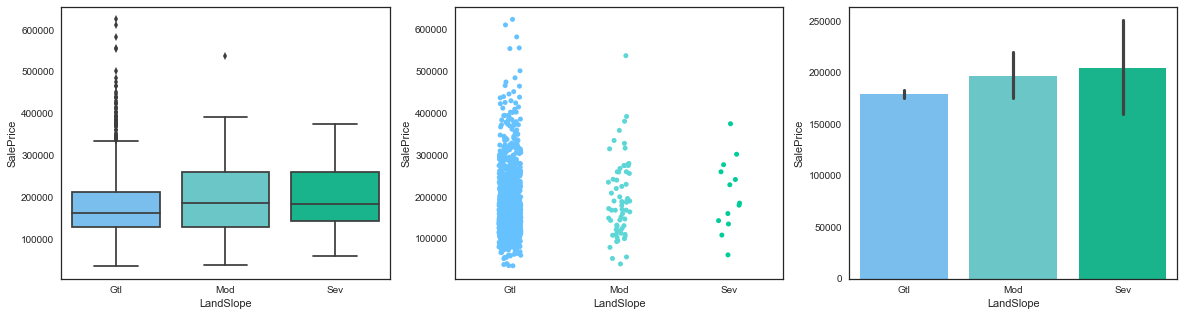

In [115]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="LandSlope", y="SalePrice", data=train, palette = mycols)

plt.subplot(1, 3, 2)
sns.stripplot(x="LandSlope", y="SalePrice", data=train, size = 5, jitter = True, palette = mycols);

plt.subplot(1, 3, 3)
sns.barplot(x="LandSlope", y="SalePrice", data=train, palette = mycols);

We see that most houses have a gentle slope of land and overall, the severity of the slope doesn't appear to have much of an impact on SalePrice. Therfore, "Mod" and "Sev" to create one class, and create a new flag to indicate a gentle slope or not.

In [218]:
all_data['LandSlope'] = all_data['LandSlope'].map({"Gtl":1, "Mod":2, "Sev":2})

def Slope(col):
    if col['LandSlope'] == 1:
        return 1
    else:
        return 0
    
all_data['GentleSlope_Flag'] = all_data.apply(Slope, axis=1)
all_data.drop('LandSlope', axis=1, inplace=True)
all_data.head(3)


1stFlrSF  2ndFlrSF  3SsnPorch  BedroomAbvGr  BsmtCond  BsmtExposure  \
0  6.753438  6.751101        0.0             3       3.0      0.693147   
1  7.141245  0.000000        0.0             3       3.0      1.609438   
2  6.825460  6.765039        0.0             3       3.0      1.098612   

   BsmtFinSF1  BsmtFinSF2  BsmtFinType1  BsmtFinType2        ...         \
0    6.561031         0.0           6.0      0.693147        ...          
1    6.886532         0.0           5.0      0.693147        ...          
2    6.188264         0.0           6.0      0.693147        ...          

   _ExterCond_1.791759469228055  _Alley_Grvl  _Alley_None  _Alley_Pave  \
0                             0            0            1            0   
1                             0            0            1            0   
2                             0            0            1            0   

   _LotConfig_0  _LotConfig_1 _LotConfig_2 _LotConfig_3  _LotConfig_4  \
0             0             0            0            0             1   
1             0             0            1            0             0   
2             0             0            0            0             1   

   GentleSlope_Flag  
0                 1  
1                 1  
2                 1  

[3 rows x 140 columns]

***Foundation***
- Type of foundation

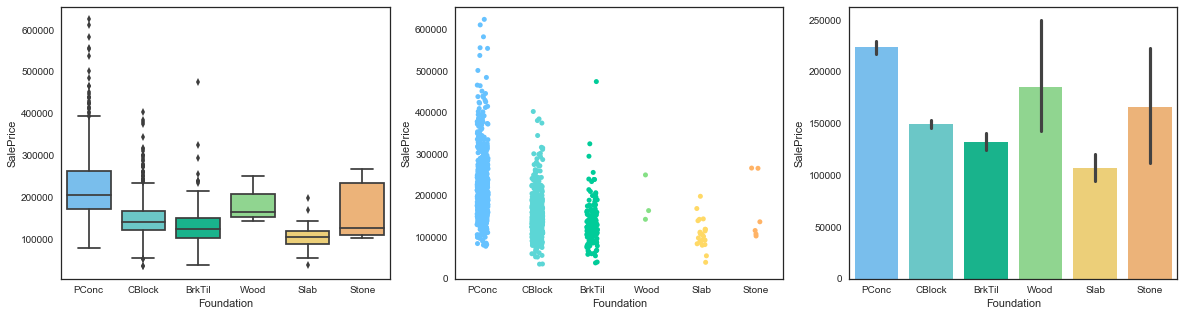

In [117]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="Foundation", y="SalePrice", data=train, palette = mycols);

plt.subplot(1, 3, 2)
sns.stripplot(x="Foundation", y="SalePrice", data=train, size = 5, jitter = True, palette = mycols);

plt.subplot(1, 3, 3)
sns.barplot(x="Foundation", y="SalePrice", data=train, palette = mycols);

There are two classes, with bigger prices for pave.

In [219]:
all_data = onehot(all_data, all_data_0, "Foundation", None, "Wood")
all_data.head(3)

1stFlrSF  2ndFlrSF  3SsnPorch  BedroomAbvGr  BsmtCond  BsmtExposure  \
0  6.753438  6.751101        0.0             3       3.0      0.693147   
1  7.141245  0.000000        0.0             3       3.0      1.609438   
2  6.825460  6.765039        0.0             3       3.0      1.098612   

   BsmtFinSF1  BsmtFinSF2  BsmtFinType1  BsmtFinType2      ...        \
0    6.561031         0.0           6.0      0.693147      ...         
1    6.886532         0.0           5.0      0.693147      ...         
2    6.188264         0.0           6.0      0.693147      ...         

   _LotConfig_2  _LotConfig_3  _LotConfig_4  GentleSlope_Flag  _Foundation_0  \
0             0             0             1                 1              0   
1             1             0             0                 1              0   
2             0             0             1                 1              0   

   _Foundation_1 _Foundation_2 _Foundation_3  _Foundation_4  _Foundation_5  
0              0             1             0              0              0  
1              1             0             0              0              0  
2              0             1             0              0              0  

[3 rows x 145 columns]

***PavedDrive***
- Paved driveway.

The highest average price are demanded from houses with a paved driveway, and most houses in this erea seem to have one.

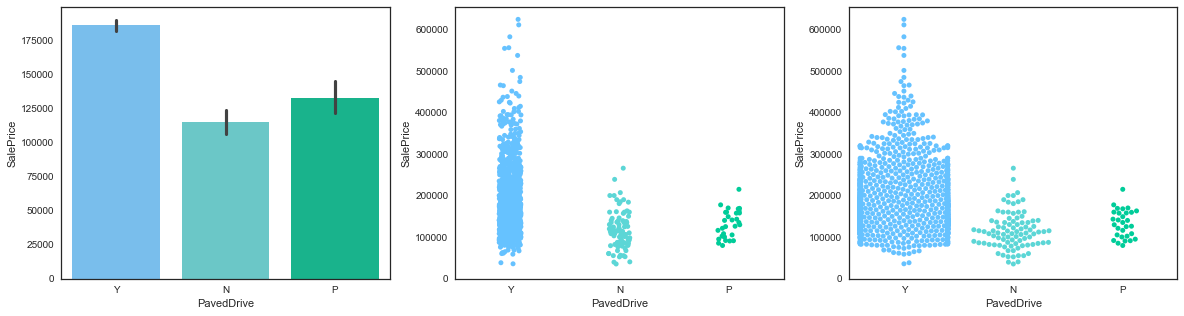

In [119]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.barplot(x="PavedDrive", y="SalePrice", data=train, palette = mycols)

plt.subplot(1, 3, 2)
sns.stripplot(x="PavedDrive", y="SalePrice", data=train, size = 5, jitter = True, palette = mycols);

plt.subplot(1, 3, 3)
sns.swarmplot(x="PavedDrive", y="SalePrice", data=train, palette = mycols);

In [220]:
all_data = onehot(all_data, all_data_0, "PavedDrive", None, "P")
all_data.head(3)

1stFlrSF  2ndFlrSF  3SsnPorch  BedroomAbvGr  BsmtCond  BsmtExposure  \
0  6.753438  6.751101        0.0             3       3.0      0.693147   
1  7.141245  0.000000        0.0             3       3.0      1.609438   
2  6.825460  6.765039        0.0             3       3.0      1.098612   

   BsmtFinSF1  BsmtFinSF2  BsmtFinType1  BsmtFinType2      ...        \
0    6.561031         0.0           6.0      0.693147      ...         
1    6.886532         0.0           5.0      0.693147      ...         
2    6.188264         0.0           6.0      0.693147      ...         

   GentleSlope_Flag  _Foundation_0  _Foundation_1  _Foundation_2  \
0                 1              0              0              1   
1                 1              0              1              0   
2                 1              0              0              1   

   _Foundation_3  _Foundation_4 _Foundation_5 _PavedDrive_N  _PavedDrive_P  \
0              0              0             0             0              0   
1              0              0             0             0              0   
2              0              0             0             0              0   

   _PavedDrive_Y  
0              1  
1              1  
2              1  

[3 rows x 147 columns]

***Condition1*** and ***Condition2***
- Proximity to various conditions.

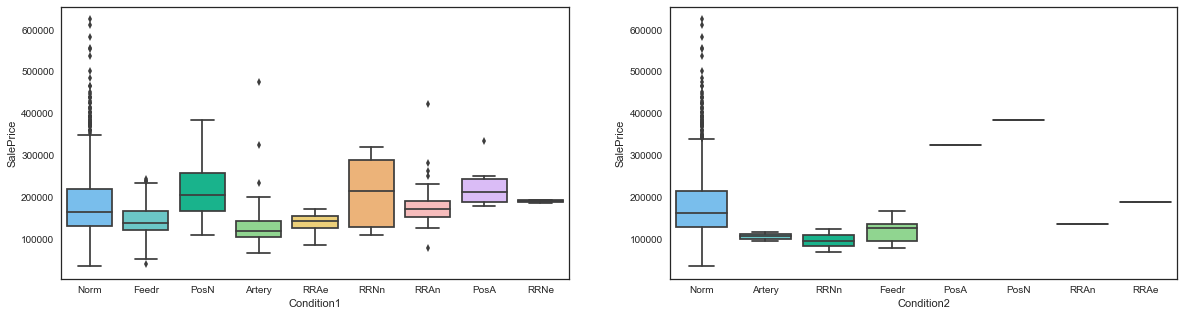

In [121]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x="Condition1", y="SalePrice", data=train, palette = mycols)

plt.subplot(1, 2, 2)
sns.boxplot(x="Condition2", y="SalePrice", data=train, palette = mycols)


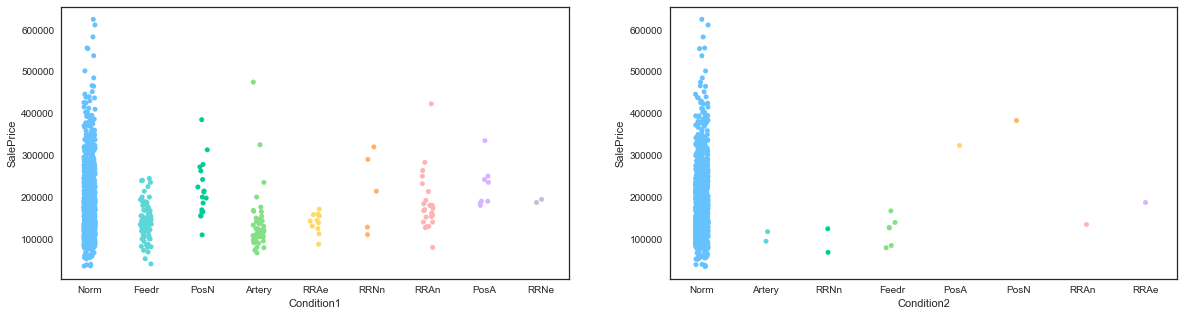

In [122]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 2, 1)
sns.stripplot(x="Condition1", y="SalePrice", data=train, size = 5, jitter = True, palette = mycols);

plt.subplot(1, 2, 2)
sns.stripplot(x="Condition2", y="SalePrice", data=train, size = 5, jitter = True, palette = mycols);


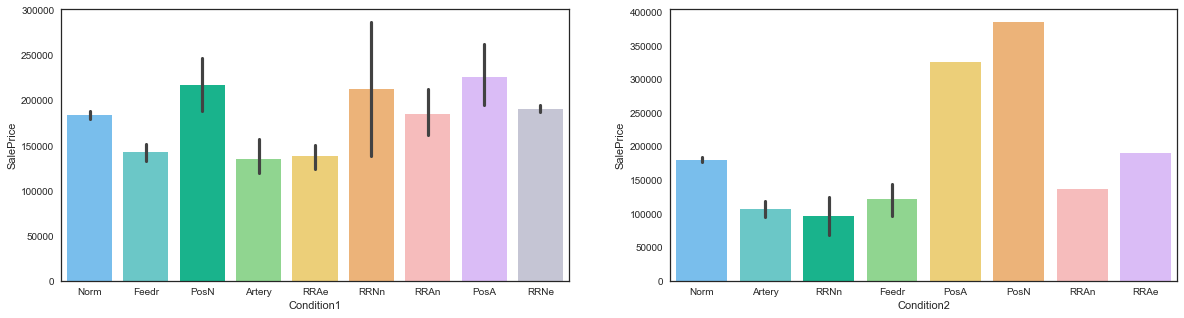

In [123]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 2, 1)
sns.barplot(x="Condition1", y="SalePrice", data=train, palette = mycols);

plt.subplot(1, 2, 2)
sns.barplot(x="Condition2", y="SalePrice", data=train, palette = mycols);

We treat this two features together, in order to cluster the similar classes based on the class description.
We can then drop "Condition2" after creating a flag to indicate whether a different condition from the first is nearby.

In [221]:
all_data['Condition1'] = all_data['Condition1'].map({"Norm":"Norm", "Feedr":"Street", "PosN":"Pos", "Artery":"Street", "RRAe":"Train",
                                                    "RRNn":"Train", "RRAn":"Train", "PosA":"Pos", "RRNe":"Train"})
all_data['Condition2'] = all_data_0['Condition2'].map({"Norm":"Norm", "Feedr":"Street", "PosN":"Pos", "Artery":"Street", "RRAe":"Train",
                                                    "RRNn":"Train", "RRAn":"Train", "PosA":"Pos", "RRNe":"Train"})


def ConditionMatch(col):
    if col['Condition1'] == col['Condition2']:
        return 0
    else:
        return 1
    
all_data['Diff2ndCondition_Flag'] = all_data.apply(ConditionMatch, axis=1)
all_data.drop('Condition2', axis=1, inplace=True)


all_data.head(3)

1stFlrSF  2ndFlrSF  3SsnPorch  BedroomAbvGr  BsmtCond  BsmtExposure  \
0  6.753438  6.751101        0.0             3       3.0      0.693147   
1  7.141245  0.000000        0.0             3       3.0      1.609438   
2  6.825460  6.765039        0.0             3       3.0      1.098612   

   BsmtFinSF1  BsmtFinSF2  BsmtFinType1  BsmtFinType2          ...            \
0    6.561031         0.0           6.0      0.693147          ...             
1    6.886532         0.0           5.0      0.693147          ...             
2    6.188264         0.0           6.0      0.693147          ...             

   _Foundation_0  _Foundation_1  _Foundation_2  _Foundation_3  _Foundation_4  \
0              0              0              1              0              0   
1              0              1              0              0              0   
2              0              0              1              0              0   

  _Foundation_5 _PavedDrive_N  _PavedDrive_P  _PavedDrive_Y  \
0             0             0              0              1   
1             0             0              0              1   
2             0             0              0              1   

   Diff2ndCondition_Flag  
0                      1  
1                      1  
2                      1  

[3 rows x 147 columns]

In [222]:
all_data = onehot(all_data, all_data_0, "Condition1", None, "RRNe")

***HouseStyle***
- Style of dwelling.

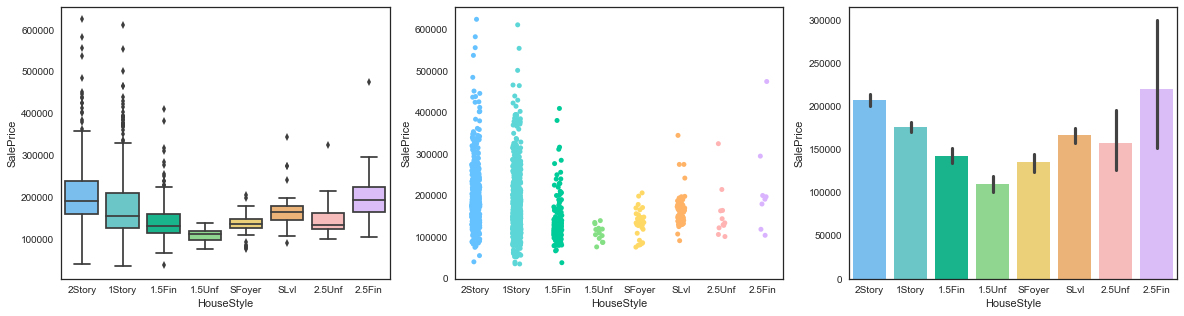

In [126]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="HouseStyle", y="SalePrice", data=train, palette = mycols);

plt.subplot(1, 3, 2)
sns.stripplot(x="HouseStyle", y="SalePrice", data=train, size = 5, jitter = True, palette = mycols);

plt.subplot(1, 3, 3)
sns.barplot(x="HouseStyle", y="SalePrice", data=train, palette = mycols);

Here we see quite a few extreme values across the categories and a large weighting of observations towards the integer story houses. Although the highest average SalePrice comes from "2.5Fin", this has a very high standard deviation and therefore more reliably, the "2Story" houses are also very highly priced on average. We decided to merge the style with no regard on the finition of the levels.



In [223]:
all_data['HouseStyle'] = all_data['HouseStyle'].map({"2Story":"2Story", "1Story":"1Story", "1.5Fin":"1.5Story", "1.5Unf":"1.5Story", 
                                                     "SFoyer":"SFoyer", "SLvl":"SLvl", "2.5Unf":"2.5Story", "2.5Fin":"2.5Story"})


all_data.head(3)


1stFlrSF  2ndFlrSF  3SsnPorch  BedroomAbvGr  BsmtCond  BsmtExposure  \
0  6.753438  6.751101        0.0             3       3.0      0.693147   
1  7.141245  0.000000        0.0             3       3.0      1.609438   
2  6.825460  6.765039        0.0             3       3.0      1.098612   

   BsmtFinSF1  BsmtFinSF2  BsmtFinType1  BsmtFinType2      ...        \
0    6.561031         0.0           6.0      0.693147      ...         
1    6.886532         0.0           5.0      0.693147      ...         
2    6.188264         0.0           6.0      0.693147      ...         

   Diff2ndCondition_Flag  _Condition1_0  _Condition1_1  _Condition1_2  \
0                      1              0              0              1   
1                      1              0              1              0   
2                      1              0              0              1   

   _Condition1_3 _Condition1_4  _Condition1_5  _Condition1_6  _Condition1_7  \
0              0             0              0              0              0   
1              0             0              0              0              0   
2              0             0              0              0              0   

   _Condition1_8  
0              0  
1              0  
2              0  

[3 rows x 155 columns]

***Exterior1st*** & ***Exterior2nd***
- Exterior covering on house.

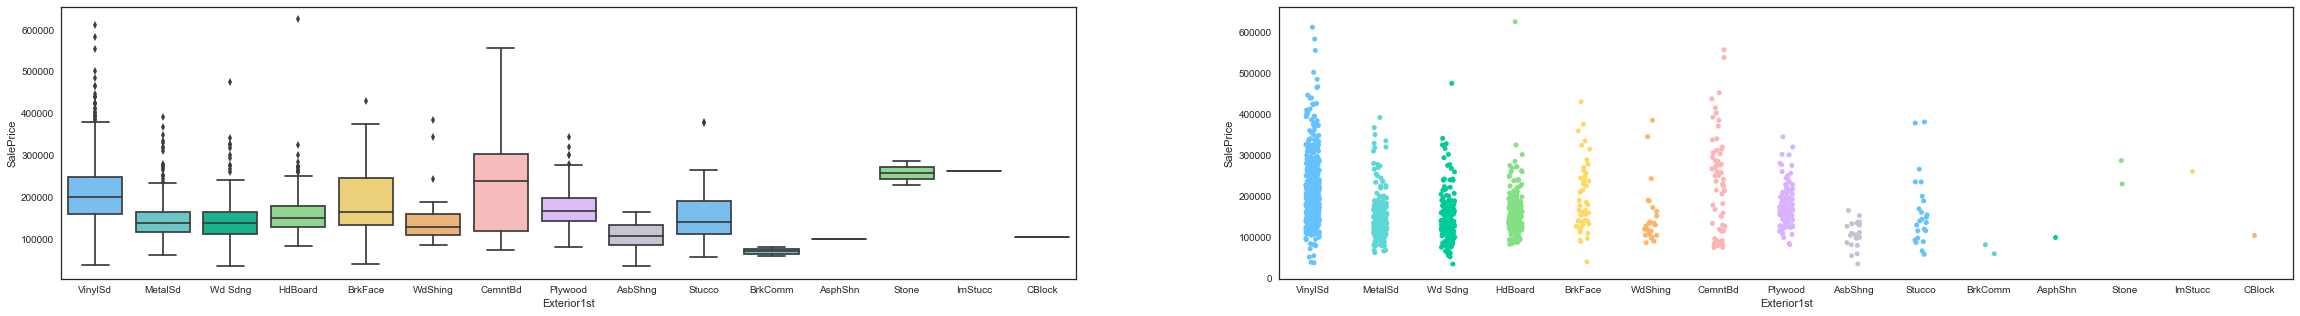

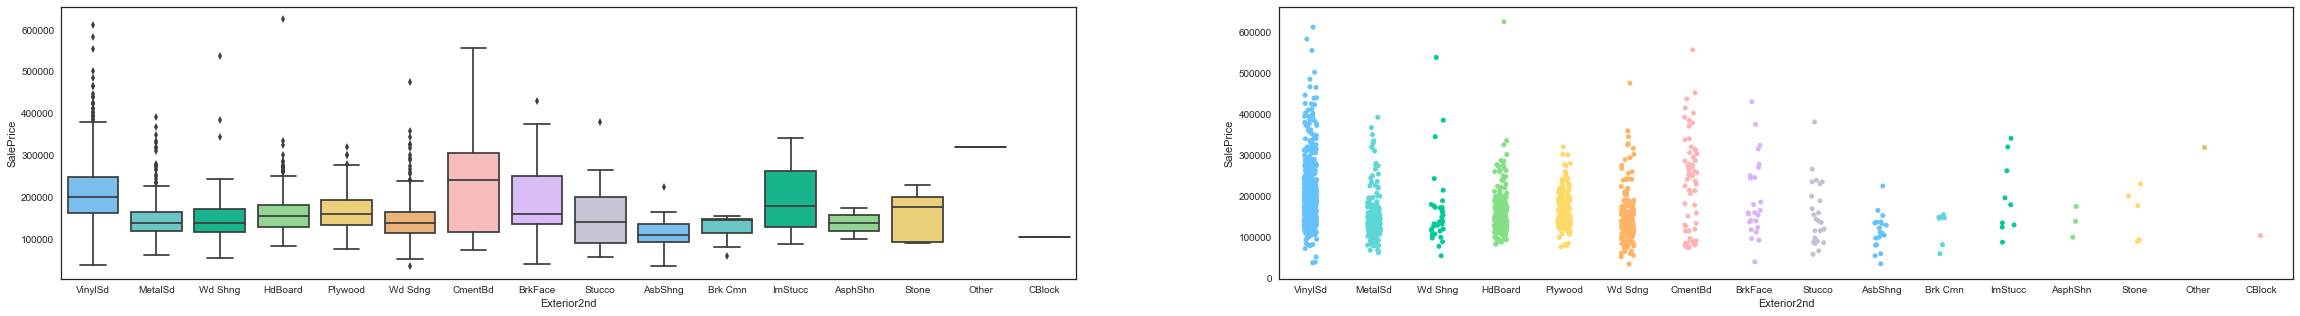

In [128]:
plt.subplots(figsize =(40, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x="Exterior1st", y="SalePrice", data=train, palette = mycols);

plt.subplot(1, 2, 2)
sns.stripplot(x="Exterior1st", y="SalePrice", data=train, size = 5, jitter = True, palette = mycols);

plt.subplots(figsize =(40, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x="Exterior2nd", y="SalePrice", data=train, palette = mycols);

plt.subplot(1, 2, 2)
sns.stripplot(x="Exterior2nd", y="SalePrice", data=train, size = 5, jitter = True, palette = mycols);



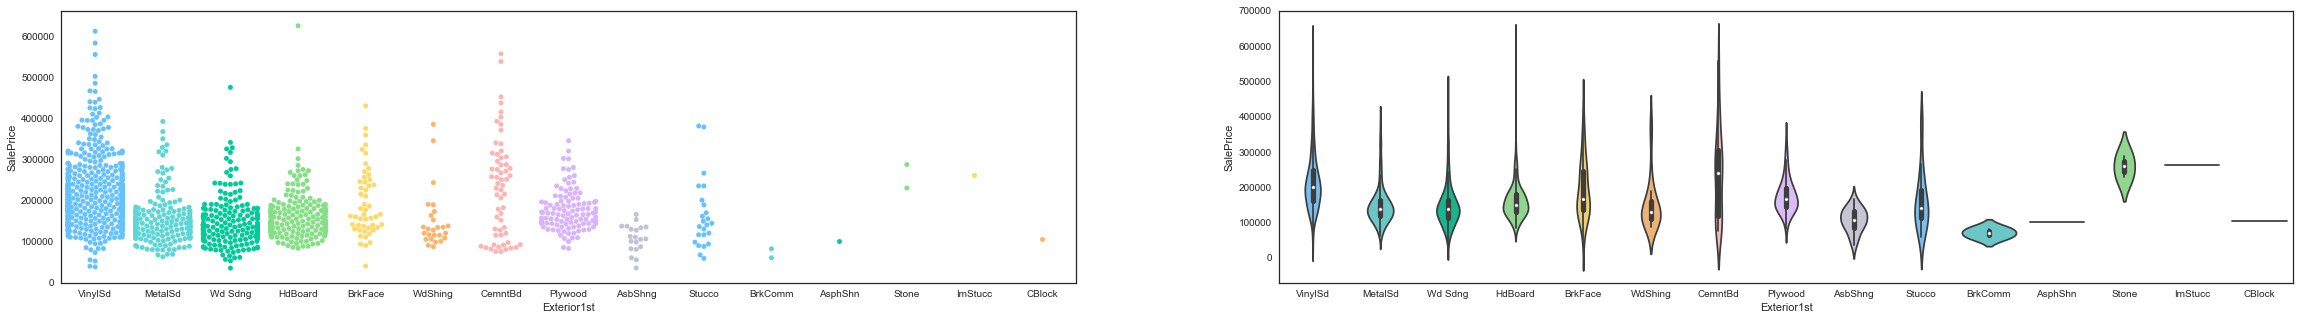

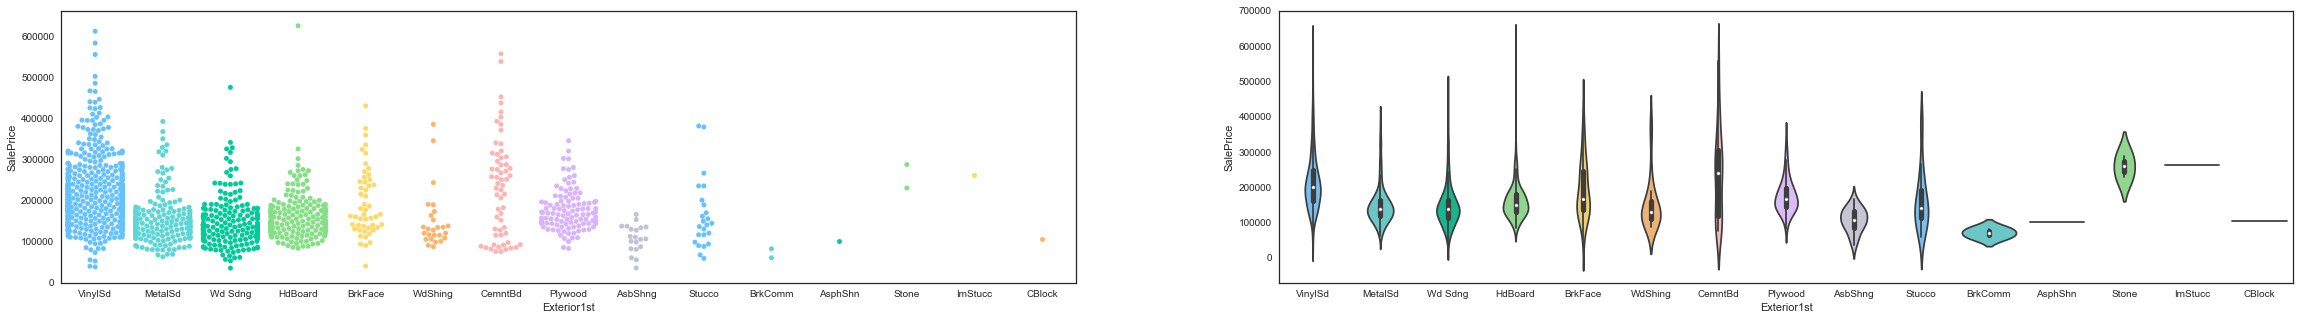

In [129]:
plt.subplots(figsize =(40, 5))

plt.subplot(1, 2, 1)
sns.swarmplot(x="Exterior1st", y="SalePrice", data=train, size = 5,  palette = mycols);

plt.subplot(1, 2, 2)
sns.violinplot(x="Exterior1st", y="SalePrice", data=train, palette = mycols);

plt.subplots(figsize =(40, 5))

plt.subplot(1, 2, 1)
sns.swarmplot(x="Exterior1st", y="SalePrice", data=train, size = 5, palette = mycols);

plt.subplot(1, 2, 2)
sns.violinplot(x="Exterior1st", y="SalePrice", data=train, palette = mycols);

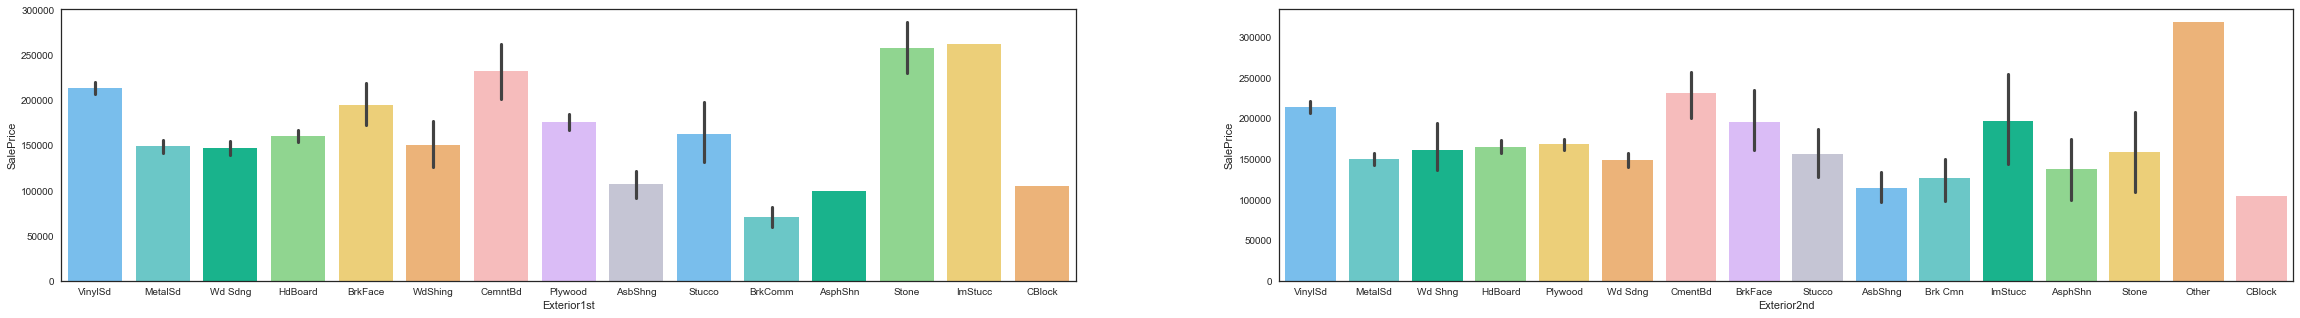

In [130]:
plt.subplots(figsize =(40, 5))

plt.subplot(1, 2, 1)
sns.barplot(x="Exterior1st", y="SalePrice", data=train, palette = mycols);

plt.subplot(1, 2, 2)
sns.barplot(x="Exterior2nd", y="SalePrice", data=train, palette = mycols);

Looking at these 2 features together, we can see that they exhibit very similar behaviours against SalePrice. It means that they are very closely related. 


In [224]:
def Exter2(col):
    if col['Exterior2nd'] == col['Exterior1st']:
        return 1
    else:
        return 0
    
all_data['ExteriorMatch_Flag'] = all_data.apply(Exter2, axis=1)
all_data.drop('Exterior2nd', axis=1, inplace=True)


all_data.head(3)

1stFlrSF  2ndFlrSF  3SsnPorch  BedroomAbvGr  BsmtCond  BsmtExposure  \
0  6.753438  6.751101        0.0             3       3.0      0.693147   
1  7.141245  0.000000        0.0             3       3.0      1.609438   
2  6.825460  6.765039        0.0             3       3.0      1.098612   

   BsmtFinSF1  BsmtFinSF2  BsmtFinType1  BsmtFinType2        ...          \
0    6.561031         0.0           6.0      0.693147        ...           
1    6.886532         0.0           5.0      0.693147        ...           
2    6.188264         0.0           6.0      0.693147        ...           

   _Condition1_0  _Condition1_1  _Condition1_2  _Condition1_3  _Condition1_4  \
0              0              0              1              0              0   
1              0              1              0              0              0   
2              0              0              1              0              0   

  _Condition1_5  _Condition1_6  _Condition1_7  _Condition1_8  \
0             0              0              0              0   
1             0              0              0              0   
2             0              0              0              0   

  ExteriorMatch_Flag  
0                  0  
1                  1  
2                  0  

[3 rows x 155 columns]

In [225]:
all_data = onehot(all_data, all_data_0, "Exterior1st", "VinylSd", "CBlock")

***Electrical***
- Electrical system.

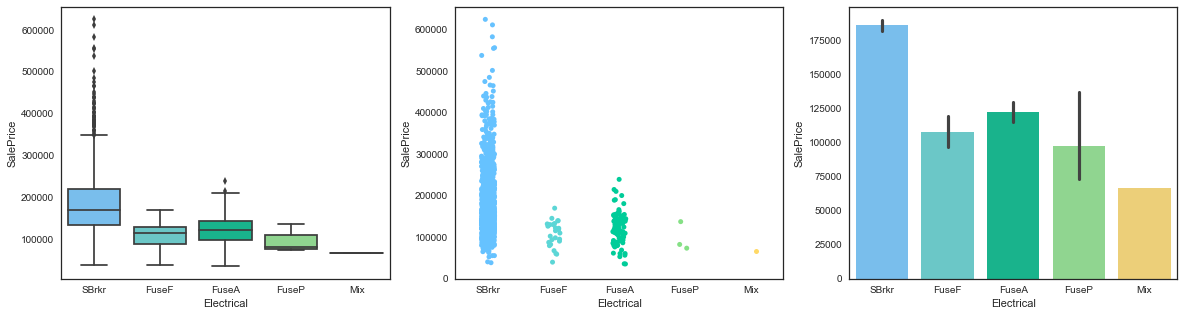

In [133]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="Electrical", y="SalePrice", data=train, palette = mycols)

plt.subplot(1, 3, 2)
sns.stripplot(x="Electrical", y="SalePrice", data=train, size = 5, jitter = True, palette = mycols);

plt.subplot(1, 3, 3)
sns.barplot(x="Electrical", y="SalePrice", data=train, palette = mycols);

We can cluster all the classes related to fuses. The classes have similar means and a low frequncy.


In [226]:
all_data['Electrical'] = all_data['Electrical'].map({"SBrkr":"SBrkr", "FuseF":"Fuse", "FuseA":"Fuse", "FuseP":"Fuse", "Mix":"Mix"})


all_data.head(3)

1stFlrSF  2ndFlrSF  3SsnPorch  BedroomAbvGr  BsmtCond  BsmtExposure  \
0  6.753438  6.751101        0.0             3       3.0      0.693147   
1  7.141245  0.000000        0.0             3       3.0      1.609438   
2  6.825460  6.765039        0.0             3       3.0      1.098612   

   BsmtFinSF1  BsmtFinSF2  BsmtFinType1  BsmtFinType2       ...         \
0    6.561031         0.0           6.0      0.693147       ...          
1    6.886532         0.0           5.0      0.693147       ...          
2    6.188264         0.0           6.0      0.693147       ...          

   _Exterior1st_5  _Exterior1st_6  _Exterior1st_7  _Exterior1st_8  \
0               0               0               0               0   
1               0               0               0               1   
2               0               0               0               0   

   _Exterior1st_9 _Exterior1st_10  _Exterior1st_11  _Exterior1st_12  \
0               0               0                0                1   
1               0               0                0                0   
2               0               0                0                1   

  _Exterior1st_13  _Exterior1st_14  
0               0                0  
1               0                0  
2               0                0  

[3 rows x 169 columns]

In [227]:
all_data = onehot(all_data, all_data_0, "Electrical", "SBrkr", "FuseP")

***Fence***
- Fence quality.

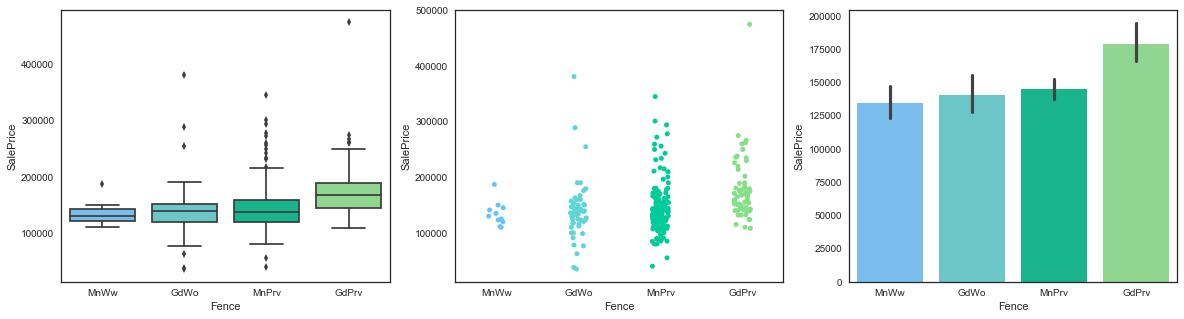

In [136]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="Fence", y="SalePrice", data=train, order = ["MnWw", "GdWo", "MnPrv", "GdPrv"], palette = mycols)

plt.subplot(1, 3, 2)
sns.stripplot(x="Fence", y="SalePrice", data=train, size = 5, jitter = True, order = ["MnWw", "GdWo", "MnPrv", "GdPrv"], palette = mycols);

plt.subplot(1, 3, 3)
sns.barplot(x="Fence", y="SalePrice", data=train, order = ["MnWw", "GdWo", "MnPrv", "GdPrv"], palette = mycols);

There seems to be a slight order within the classes, however some of the class descriptions are slightly ambiguous, so we will prefer a categorical approach.

In [228]:
all_data = onehot(all_data, all_data_0, "Fence", "None", "MnPrv")

***LandContour***
- Flatness of the property

There seems to be a slight order within the classes, however some of the class descriptions are slightly ambiguous, so we will prefer a categorical approach.

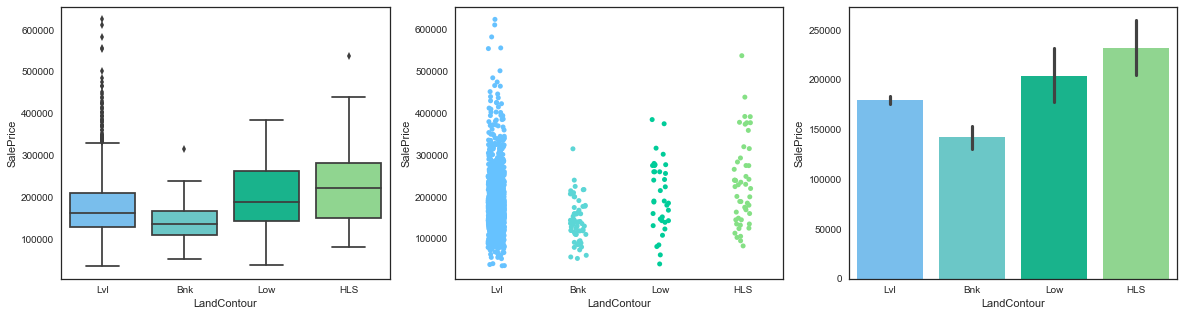

In [138]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="LandContour", y="SalePrice", data=train, palette = mycols)

plt.subplot(1, 3, 2)
sns.stripplot(x="LandContour", y="SalePrice", data=train, size = 5, jitter = True, palette = mycols);

plt.subplot(1, 3, 3)
sns.barplot(x="LandContour", y="SalePrice", data=train, palette = mycols);


Most houses are on a flat contour, but the houses with the highest SalePrice seem to come from properties on a hill.

In [229]:
all_data = onehot(all_data, all_data_0, "LandContour", None, "Low")
all_data.head(3)

1stFlrSF  2ndFlrSF  3SsnPorch  BedroomAbvGr  BsmtCond  BsmtExposure  \
0  6.753438  6.751101        0.0             3       3.0      0.693147   
1  7.141245  0.000000        0.0             3       3.0      1.609438   
2  6.825460  6.765039        0.0             3       3.0      1.098612   

   BsmtFinSF1  BsmtFinSF2  BsmtFinType1  BsmtFinType2        ...         \
0    6.561031         0.0           6.0      0.693147        ...          
1    6.886532         0.0           5.0      0.693147        ...          
2    6.188264         0.0           6.0      0.693147        ...          

   _Electrical_SBrkr  _Fence_GdPrv  _Fence_GdWo  _Fence_MnPrv  _Fence_MnWw  \
0                  1             0            0             0            0   
1                  1             0            0             0            0   
2                  1             0            0             0            0   

   _Fence_None  _LandContour_Bnk  _LandContour_HLS  _LandContour_Low  \
0            1                 0                 0                 0   
1            1                 0                 0                 0   
2            1                 0                 0                 0   

   _LandContour_Lvl  
0                 1  
1                 1  
2                 1  

[3 rows x 180 columns]

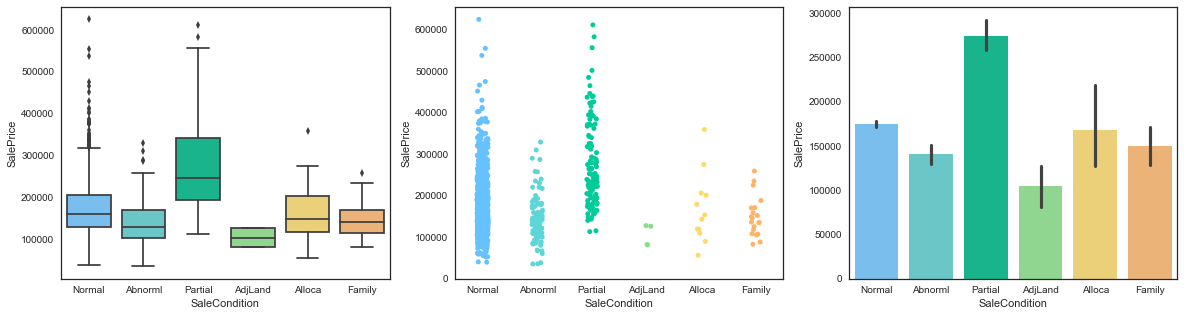

In [140]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="SaleCondition", y="SalePrice", data=train, palette = mycols)

plt.subplot(1, 3, 2)
sns.stripplot(x="SaleCondition", y="SalePrice", data=train, size = 5, jitter = True, palette = mycols);

plt.subplot(1, 3, 3)
sns.barplot(x="SaleCondition", y="SalePrice", data=train, palette = mycols);

In [230]:
all_data = onehot(all_data, all_data_0, "SaleCondition", "Normal", "AdjLand")
all_data.head(3)

1stFlrSF  2ndFlrSF  3SsnPorch  BedroomAbvGr  BsmtCond  BsmtExposure  \
0  6.753438  6.751101        0.0             3       3.0      0.693147   
1  7.141245  0.000000        0.0             3       3.0      1.609438   
2  6.825460  6.765039        0.0             3       3.0      1.098612   

   BsmtFinSF1  BsmtFinSF2  BsmtFinType1  BsmtFinType2        ...         \
0    6.561031         0.0           6.0      0.693147        ...          
1    6.886532         0.0           5.0      0.693147        ...          
2    6.188264         0.0           6.0      0.693147        ...          

   _LandContour_Bnk  _LandContour_HLS  _LandContour_Low  _LandContour_Lvl  \
0                 0                 0                 0                 1   
1                 0                 0                 0                 1   
2                 0                 0                 0                 1   

   _SaleCondition_0  _SaleCondition_1  _SaleCondition_2  _SaleCondition_3  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   
2                 0                 0                 0                 0   

   _SaleCondition_4  _SaleCondition_5  
0                 1                 0  
1                 1                 0  
2                 1                 0  

[3 rows x 185 columns]

***Neighborhood***
- Physical locations within Ames city limits.

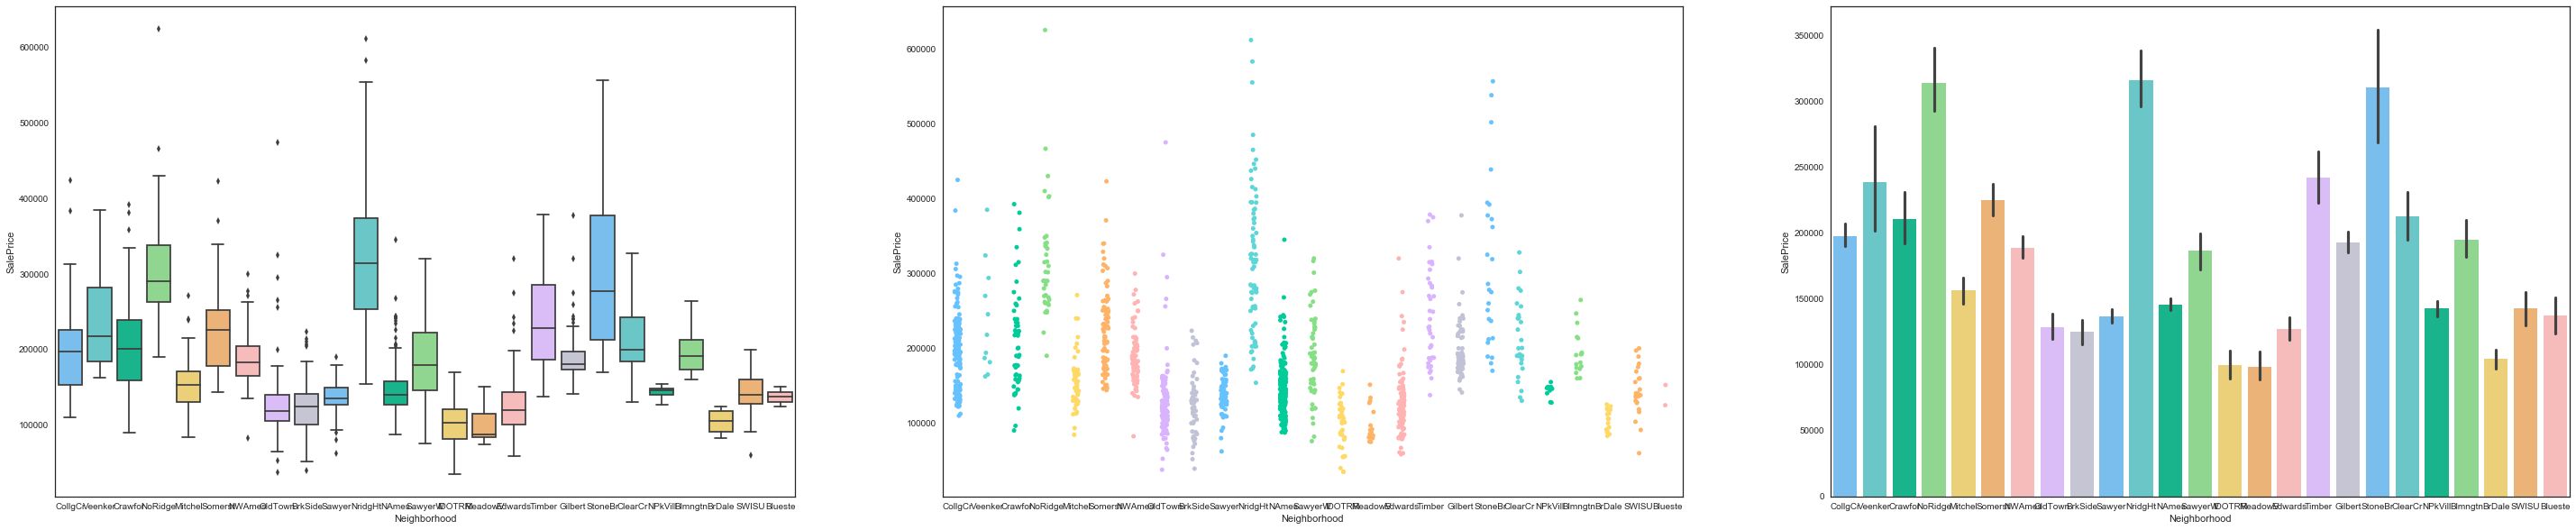

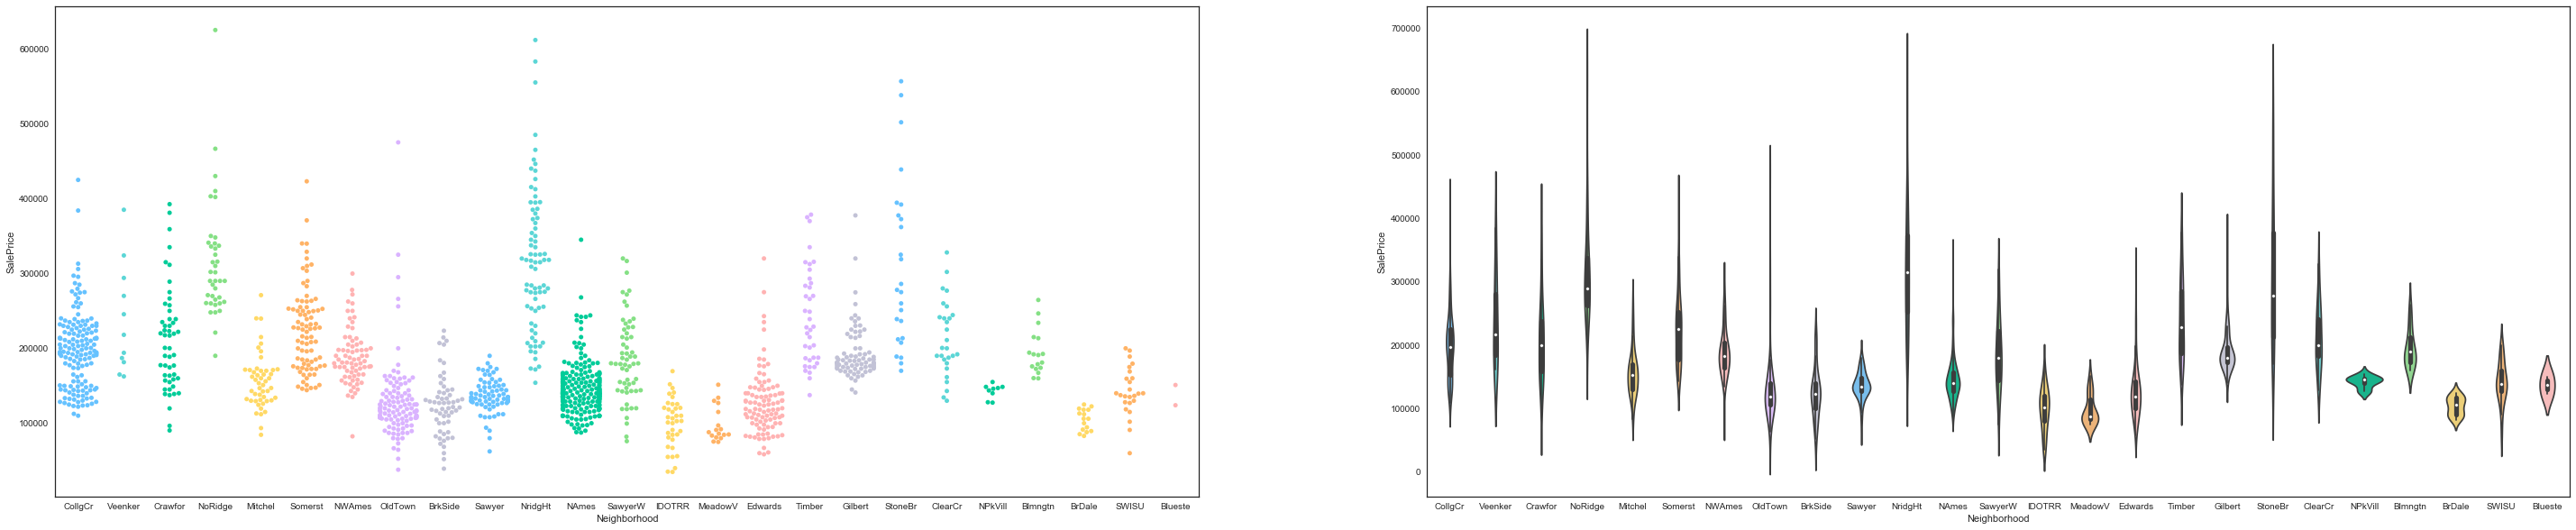

In [142]:
plt.subplots(figsize =(50, 10))

plt.subplot(1, 3, 1)
sns.boxplot(x="Neighborhood", y="SalePrice", data=train, palette = mycols)

plt.subplot(1, 3, 2)
sns.stripplot(x="Neighborhood", y="SalePrice", data=train, size = 5, jitter = True, palette = mycols);

plt.subplot(1, 3, 3)
sns.barplot(x="Neighborhood", y="SalePrice", data=train, palette = mycols);

plt.subplots(figsize =(50, 10))


plt.subplot(1, 2, 1)
sns.swarmplot(x="Neighborhood", y="SalePrice",data=train, size = 5,  palette = mycols)

plt.subplot(1, 2, 2)
sns.violinplot(x="Neighborhood", y="SalePrice", data=train, palette = mycols);



There are 2 classes. Non of them can be negligeable in term of number of houses.

Each class seems to contribute to the information the feature provide. We could eventually merge IDOTRR and Meadow village but there is no logical reason in practice to do it. We notice that neighborhood clearly has an important contribution towards SalePrice, since we see such high values for certain areas and low values for others.

In [231]:
all_data = onehot(all_data, all_data_0, "Neighborhood", None, "OldTown")
all_data.head(3)

1stFlrSF  2ndFlrSF  3SsnPorch  BedroomAbvGr  BsmtCond  BsmtExposure  \
0  6.753438  6.751101        0.0             3       3.0      0.693147   
1  7.141245  0.000000        0.0             3       3.0      1.609438   
2  6.825460  6.765039        0.0             3       3.0      1.098612   

   BsmtFinSF1  BsmtFinSF2  BsmtFinType1  BsmtFinType2        ...         \
0    6.561031         0.0           6.0      0.693147        ...          
1    6.886532         0.0           5.0      0.693147        ...          
2    6.188264         0.0           6.0      0.693147        ...          

   _Neighborhood_15  _Neighborhood_16  _Neighborhood_17  _Neighborhood_18  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   
2                 0                 0                 0                 0   

   _Neighborhood_19  _Neighborhood_20  _Neighborhood_21  _Neighborhood_22  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   
2                 0                 0                 0                 0   

   _Neighborhood_23  _Neighborhood_24  
0                 0                 0  
1                 0                 1  
2                 0                 0  

[3 rows x 209 columns]

We can see here that this feature shows a clear order and has a positive correlation with SalePrice. As the quality increases, so does the SalePrice. 

***RoofStyle***
- Type of roof.

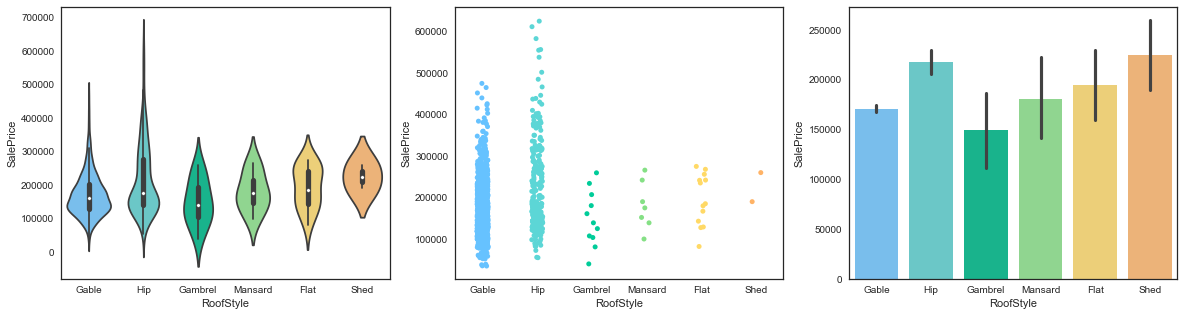

In [144]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.violinplot(x="RoofStyle", y="SalePrice", data=train, palette = mycols);

plt.subplot(1, 3, 2)
sns.stripplot(x="RoofStyle", y="SalePrice", data=train, size = 5, jitter = True, palette = mycols);

plt.subplot(1, 3, 3)
sns.barplot(x="RoofStyle", y="SalePrice", data=train, palette = mycols);

In [232]:
all_data = onehot(all_data, all_data_0, "RoofStyle", None, "Shed")
all_data.head(3)

1stFlrSF  2ndFlrSF  3SsnPorch  BedroomAbvGr  BsmtCond  BsmtExposure  \
0  6.753438  6.751101        0.0             3       3.0      0.693147   
1  7.141245  0.000000        0.0             3       3.0      1.609438   
2  6.825460  6.765039        0.0             3       3.0      1.098612   

   BsmtFinSF1  BsmtFinSF2  BsmtFinType1  BsmtFinType2      ...       \
0    6.561031         0.0           6.0      0.693147      ...        
1    6.886532         0.0           5.0      0.693147      ...        
2    6.188264         0.0           6.0      0.693147      ...        

   _Neighborhood_21  _Neighborhood_22  _Neighborhood_23  _Neighborhood_24  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 1   
2                 0                 0                 0                 0   

   _RoofStyle_0  _RoofStyle_1  _RoofStyle_2  _RoofStyle_3  _RoofStyle_4  \
0             0             1             0             0             0   
1             0             1             0             0             0   
2             0             1             0             0             0   

   _RoofStyle_5  
0             0  
1             0  
2             0  

[3 rows x 214 columns]

***RoofMatl***
- Roof material.

As the condition of the basement improves, the SalePrice also increases. It can be related to BsmtQual.

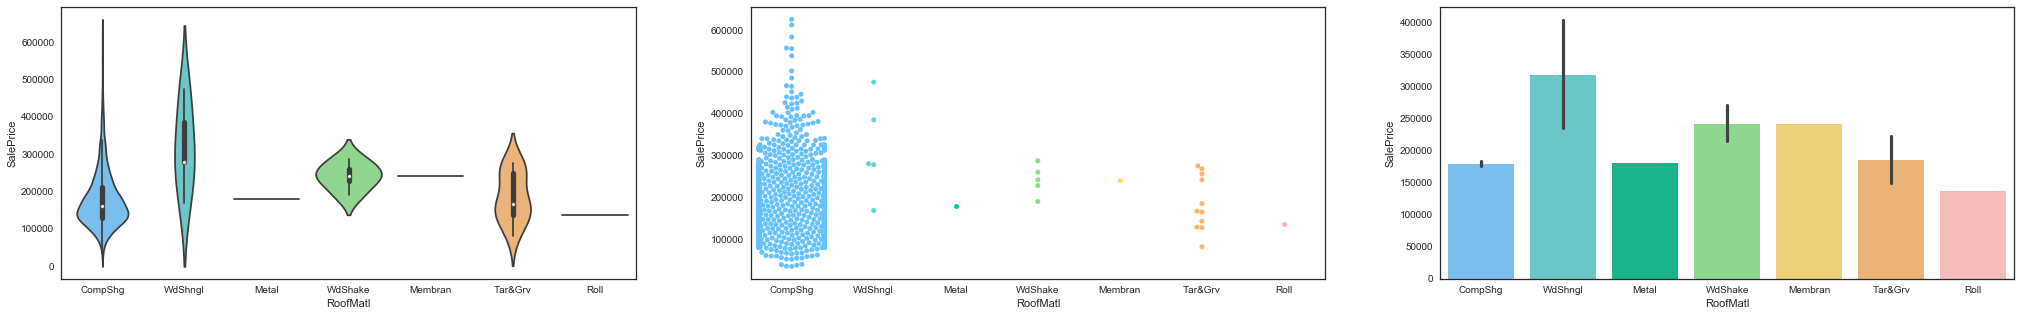

In [146]:
plt.subplots(figsize =(35, 5))

plt.subplot(1, 3, 1)
sns.violinplot(x="RoofMatl", y="SalePrice", data=train, palette = mycols);

plt.subplot(1, 3, 2)
sns.swarmplot(x="RoofMatl", y="SalePrice", data=train, size = 5, palette = mycols);

plt.subplot(1, 3, 3)
sns.barplot(x="RoofMatl", y="SalePrice", data=train, palette = mycols);

In [233]:
all_data = onehot(all_data, all_data_0, "RoofMatl", None, "WdShake")
all_data.head(3)

1stFlrSF  2ndFlrSF  3SsnPorch  BedroomAbvGr  BsmtCond  BsmtExposure  \
0  6.753438  6.751101        0.0             3       3.0      0.693147   
1  7.141245  0.000000        0.0             3       3.0      1.609438   
2  6.825460  6.765039        0.0             3       3.0      1.098612   

   BsmtFinSF1  BsmtFinSF2  BsmtFinType1  BsmtFinType2        ...          \
0    6.561031         0.0           6.0      0.693147        ...           
1    6.886532         0.0           5.0      0.693147        ...           
2    6.188264         0.0           6.0      0.693147        ...           

   _RoofStyle_4  _RoofStyle_5  _RoofMatl_ClyTile  _RoofMatl_CompShg  \
0             0             0                  0                  1   
1             0             0                  0                  1   
2             0             0                  0                  1   

   _RoofMatl_Membran  _RoofMatl_Metal  _RoofMatl_Roll  _RoofMatl_Tar&Grv  \
0                  0                0               0                  0   
1                  0                0               0                  0   
2                  0                0               0                  0   

   _RoofMatl_WdShake  _RoofMatl_WdShngl  
0                  0                  0  
1                  0                  0  
2                  0                  0  

[3 rows x 221 columns]

There are very few observations for the classes, exept ComShq. They will be dropped during feature reduction if they turn out to be insignificant.


***MasVnrType***
- Masonry veneer type.

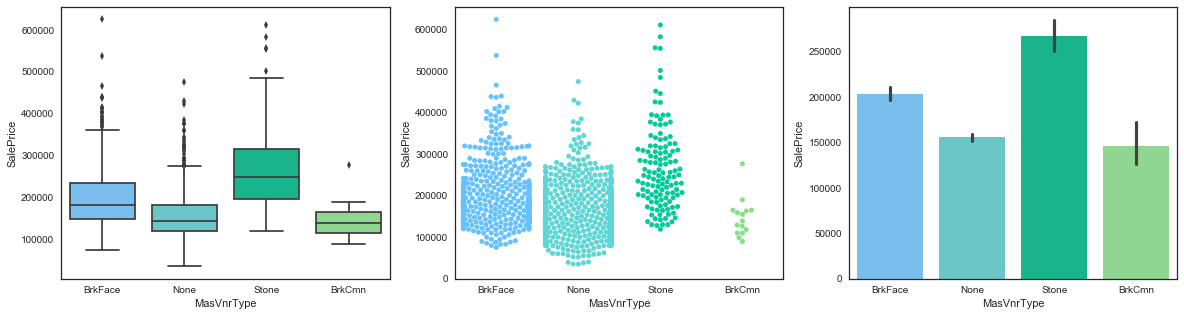

In [148]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="MasVnrType", y="SalePrice", data=train, palette = mycols);

plt.subplot(1, 3, 2)
sns.swarmplot(x="MasVnrType", y="SalePrice", data=train, size = 5, palette = mycols);

plt.subplot(1, 3, 3)
sns.barplot(x="MasVnrType", y="SalePrice", data=train, palette = mycols);

 Each class has quite a unique range of values for SalePrice, the only class that stands out is "BrkCmn", which has a low frequency.


In [236]:
# Fill in missing MasVnrType for rows that do have a MasVnrArea.
# temp_df = all_data_0[["MasVnrType", "MasVnrArea"]].copy()
# idx = (all_data_0["MasVnrArea"] != 0) & ((all_data_0["MasVnrType"] == "None") | (all_data_0["MasVnrType"].isnull()))
# temp_df.loc[idx, "MasVnrType"] = "BrkFace"
all_data = onehot(all_data, all_data_0, "MasVnrType", "None", "BrkCmn")
all_data.head(3)

1stFlrSF  2ndFlrSF  3SsnPorch  BedroomAbvGr  BsmtCond  BsmtExposure  \
0  6.753438  6.751101        0.0             3       3.0      0.693147   
1  7.141245  0.000000        0.0             3       3.0      1.609438   
2  6.825460  6.765039        0.0             3       3.0      1.098612   

   BsmtFinSF1  BsmtFinSF2  BsmtFinType1  BsmtFinType2      ...        \
0    6.561031         0.0           6.0      0.693147      ...         
1    6.886532         0.0           5.0      0.693147      ...         
2    6.188264         0.0           6.0      0.693147      ...         

   _RoofMatl_Membran  _RoofMatl_Metal  _RoofMatl_Roll  _RoofMatl_Tar&Grv  \
0                  0                0               0                  0   
1                  0                0               0                  0   
2                  0                0               0                  0   

   _RoofMatl_WdShake  _RoofMatl_WdShngl  _MasVnrType_0  _MasVnrType_1  \
0                  0                  0              0              1   
1                  0                  0              0              0   
2                  0                  0              0              1   

   _MasVnrType_2  _MasVnrType_3  
0              0              0  
1              1              0  
2              0              0  

[3 rows x 224 columns]

***GarageQual***
- Garage quality.

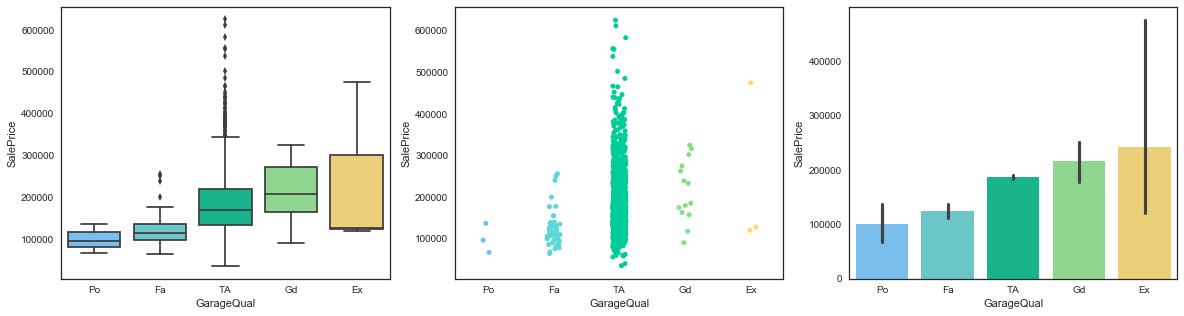

In [150]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="GarageQual", y="SalePrice", data=train, order=["Po", "Fa", "TA", "Gd", "Ex"], palette = mycols)

plt.subplot(1, 3, 2)
sns.stripplot(x="GarageQual", y="SalePrice", data=train, size = 5, jitter = True, order=["Po", "Fa", "TA", "Gd", "Ex"], palette = mycols);

plt.subplot(1, 3, 3)
sns.barplot(x="GarageQual", y="SalePrice", data=train, order=["Po", "Fa", "TA", "Gd", "Ex"], palette = mycols);

We see a lot of homes having "TA" quality garages, with very few homes having high quality and low quality ones. We can cluster the boundary classes here.

In [237]:
#all_data['GarageQual'] = all_data['GarageQual'].map({"None":"None", "Po":"Low", "Fa":"Low", "TA":"TA", "Gd":"High", "Ex":"High"})
all_data['GarageQual'].unique()


all_data.head(3)

1stFlrSF  2ndFlrSF  3SsnPorch  BedroomAbvGr  BsmtCond  BsmtExposure  \
0  6.753438  6.751101        0.0             3       3.0      0.693147   
1  7.141245  0.000000        0.0             3       3.0      1.609438   
2  6.825460  6.765039        0.0             3       3.0      1.098612   

   BsmtFinSF1  BsmtFinSF2  BsmtFinType1  BsmtFinType2      ...        \
0    6.561031         0.0           6.0      0.693147      ...         
1    6.886532         0.0           5.0      0.693147      ...         
2    6.188264         0.0           6.0      0.693147      ...         

   _RoofMatl_Membran  _RoofMatl_Metal  _RoofMatl_Roll  _RoofMatl_Tar&Grv  \
0                  0                0               0                  0   
1                  0                0               0                  0   
2                  0                0               0                  0   

   _RoofMatl_WdShake  _RoofMatl_WdShngl  _MasVnrType_0  _MasVnrType_1  \
0                  0                  0              0              1   
1                  0                  0              0              0   
2                  0                  0              0              1   

   _MasVnrType_2  _MasVnrType_3  
0              0              0  
1              1              0  
2              0              0  

[3 rows x 224 columns]

In [238]:
all_data = onehot(all_data, all_data_0, "GarageQual", "None", "Ex")

***GarageCond***
- Garage condition.

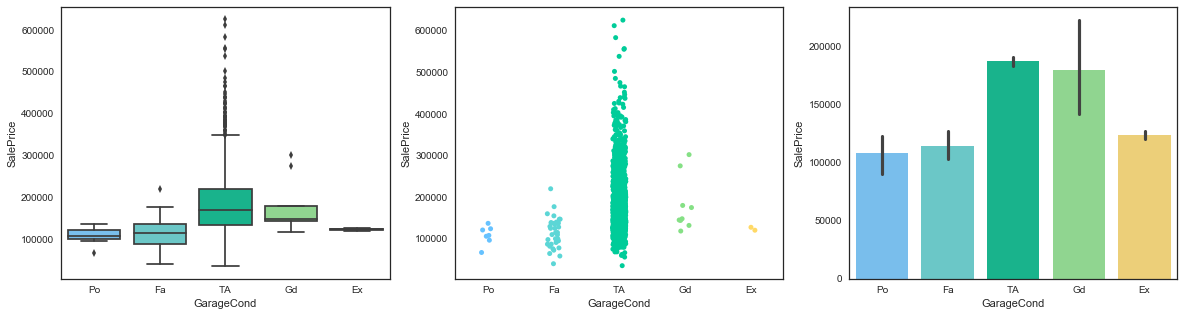

In [153]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="GarageCond", y="SalePrice", data=train, order=["Po", "Fa", "TA", "Gd", "Ex"], palette = mycols)

plt.subplot(1, 3, 2)
sns.stripplot(x="GarageCond", y="SalePrice", data=train, size = 5, jitter = True, order=["Po", "Fa", "TA", "Gd", "Ex"], palette = mycols);

plt.subplot(1, 3, 3)
sns.barplot(x="GarageCond", y="SalePrice", data=train, order=["Po", "Fa", "TA", "Gd", "Ex"], palette = mycols);

Same as the previous feature.

In [239]:
#all_data['GarageCond'] = all_data['GarageCond'].map({"None":"None", "Po":"Low", "Fa":"Low", "TA":"TA", "Gd":"High", "Ex":"High"})
all_data['GarageCond'].unique()

array([  3.,   2.,  nan,   4.,   1.,   5.])

In [240]:
all_data = onehot(all_data, all_data_0, "GarageCond", "None", "Ex")
all_data.head(3)

1stFlrSF  2ndFlrSF  3SsnPorch  BedroomAbvGr  BsmtCond  BsmtExposure  \
0  6.753438  6.751101        0.0             3       3.0      0.693147   
1  7.141245  0.000000        0.0             3       3.0      1.609438   
2  6.825460  6.765039        0.0             3       3.0      1.098612   

   BsmtFinSF1  BsmtFinSF2  BsmtFinType1  BsmtFinType2        ...         \
0    6.561031         0.0           6.0      0.693147        ...          
1    6.886532         0.0           5.0      0.693147        ...          
2    6.188264         0.0           6.0      0.693147        ...          

   _GarageQual_3.0  _GarageQual_4.0  _GarageQual_5.0  _GarageQual_None  \
0                1                0                0                 0   
1                1                0                0                 0   
2                1                0                0                 0   

   _GarageCond_1.0  _GarageCond_2.0  _GarageCond_3.0  _GarageCond_4.0  \
0                0                0                1                0   
1                0                0                1                0   
2                0                0                1                0   

   _GarageCond_5.0  _GarageCond_None  
0                0                 0  
1                0                 0  
2                0                 0  

[3 rows x 234 columns]

***SaleType***
- Type of sale.       

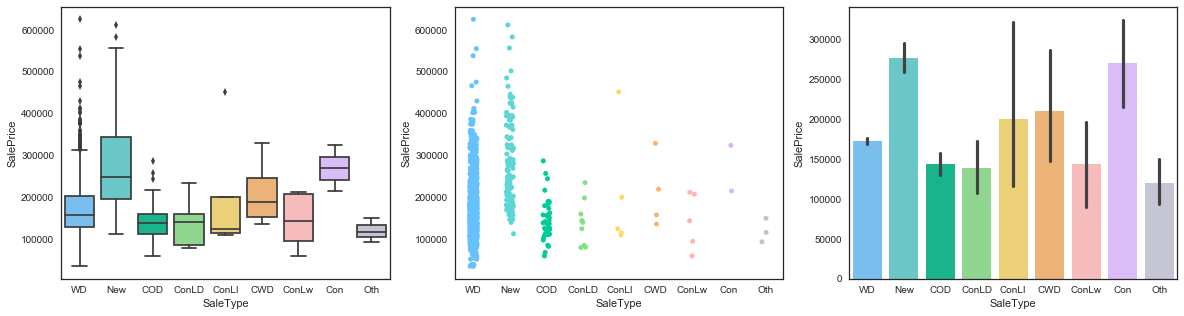

In [156]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="SaleType", y="SalePrice", data=train, palette = mycols)

plt.subplot(1, 3, 2)
sns.stripplot(x="SaleType", y="SalePrice", data=train, size = 5, jitter = True, palette = mycols);

plt.subplot(1, 3, 3)
sns.barplot(x="SaleType", y="SalePrice", data=train, palette = mycols);

The attributes on the right of the plot have a very low frequency.We can clusterthem thanks to the class 'others'.

In [157]:
#all_data['SaleType'] = all_data['SaleType'].map({"WD":"WD", "New":"New", "COD":"COD", "CWD":"CWD", "ConLD":"Oth", "ConLI":"Oth", 
                                                 "ConLw":"Oth", "Con":"Oth", "Oth":"Oth"})


all_data.head(3)

1stFlrSF  2ndFlrSF  3SsnPorch  BedroomAbvGr  BsmtCond  BsmtExposure  \
0  6.753438  6.751101        0.0             3         3      0.693147   
1  7.141245  0.000000        0.0             3         3      1.609438   
2  6.825460  6.765039        0.0             3         3      1.098612   

   BsmtFinSF1  BsmtFinSF2  BsmtFinType1  BsmtFinType2       ...        \
0    6.561031         0.0             6      0.526589       ...         
1    6.886532         0.0             5      0.526589       ...         
2    6.188264         0.0             6      0.526589       ...         

   _GarageQual_Gd  _GarageQual_None  _GarageQual_Po  _GarageQual_TA  \
0               0                 0               0               1   
1               0                 0               0               1   
2               0                 0               0               1   

   _GarageCond_Ex  _GarageCond_Fa  _GarageCond_Gd  _GarageCond_None  \
0               0               0               0                 0   
1               0               0               0                 0   
2               0               0               0                 0   

   _GarageCond_Po  _GarageCond_TA  
0               0               1  
1               0               1  
2               0               1  

[3 rows x 234 columns]

In [241]:
all_data = onehot(all_data, all_data_0, "SaleType", "WD", "Oth")

In [243]:
#all_data = onehot(all_data, all_data_0, "BldgType", None, "2fmCon")

In [244]:
all_data = onehot(all_data, all_data_0, "ExterQual", "None", "Ex")

In [245]:
all_data = onehot(all_data, all_data_0, "Functional", "Typ", "Typ")

In [246]:
all_data = onehot(all_data, all_data_0, "KitchenQual", "TA", "Ex")

In [247]:
all_data = onehot(all_data, all_data_0, "BsmtCond", "None", "Ex")

In [248]:
all_data = onehot(all_data, all_data_0, "BsmtFinType2", "None", "GLQ")


In [249]:
all_data = onehot(all_data, all_data_0, 'HeatingQC', "None", "Ex")

In [250]:
all_data = onehot(all_data, all_data_0, "FireplaceQu", "None", "Ex")


<a id='Removing_features'></a>
### 4.5  Removing features

***Utilities***
- Type of utilities available

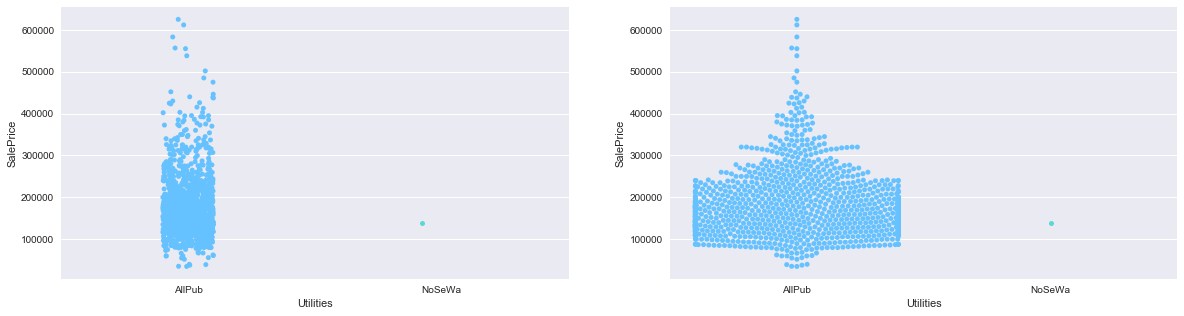

In [251]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 2, 1)
sns.stripplot(x="Utilities", y="SalePrice", data=train, size = 5, jitter = True, palette = mycols);
plt.subplot(1, 2, 2)
sns.swarmplot(x="Utilities", y="SalePrice", data=train, size = 5,  palette = mycols);

Each class seems to contribute to the information the feature provide. We could eventually merge IDOTRR and Meadow village but there is no logical reason in practice to do it. We notice that neighborhood clearly has an important contribution towards SalePrice, since we see such high values for certain areas and low values for others.

##### There is only one NoseWa, we can remove this feature.

In [252]:
all_data = all_data.drop(['Utilities'], axis=1)
all_data.head(3)

1stFlrSF  2ndFlrSF  3SsnPorch  BedroomAbvGr  BsmtExposure  BsmtFinSF1  \
0  6.753438  6.751101        0.0             3      0.693147    6.561031   
1  7.141245  0.000000        0.0             3      1.609438    6.886532   
2  6.825460  6.765039        0.0             3      1.098612    6.188264   

   BsmtFinSF2  BsmtFinType1  BsmtFullBath  BsmtHalfBath        ...          \
0         0.0           6.0             1      0.000000        ...           
1         0.0           5.0             0      0.693147        ...           
2         0.0           6.0             1      0.000000        ...           

   _HeatingQC_2.0  _HeatingQC_3.0  _HeatingQC_4.0  _HeatingQC_5.0  \
0               0               0               0               1   
1               0               0               0               1   
2               0               0               0               1   

   _FireplaceQu_1.0  _FireplaceQu_2.0  _FireplaceQu_3.0  _FireplaceQu_4.0  \
0                 0                 0                 0                 0   
1                 0                 0                 1                 0   
2                 0                 0                 1                 0   

   _FireplaceQu_5.0  _FireplaceQu_None  
0                 0                  1  
1                 0                  0  
2                 0                  0  

[3 rows x 273 columns]

***PoolQC***
- Pool quality.

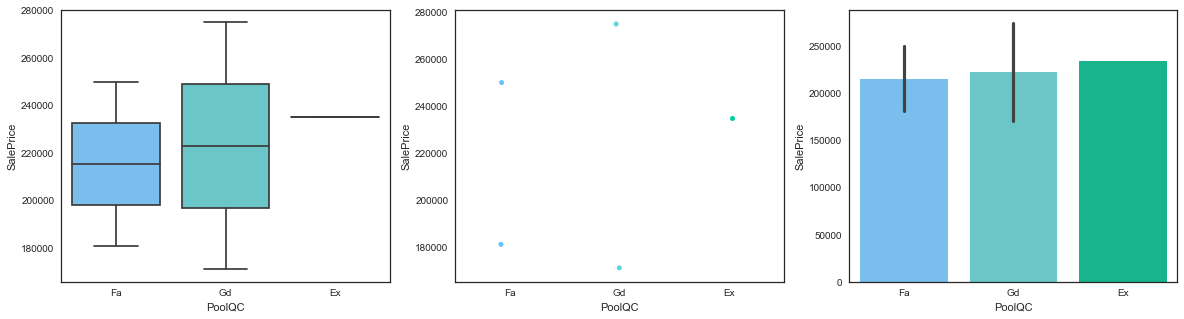

In [170]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="PoolQC", y="SalePrice", data=train, order=["Fa", "Gd", "Ex"], palette = mycols)

plt.subplot(1, 3, 2)
sns.stripplot(x="PoolQC", y="SalePrice", data=train, size = 5, jitter = True, order=["Fa", "Gd", "Ex"], palette = mycols);

plt.subplot(1, 3, 3)
sns.barplot(x="PoolQC", y="SalePrice", data=train, order=["Fa", "Gd", "Ex"], palette = mycols);

Due to not many houses having a pool, we see very low numbers of observations for each class. So this does not hold much information this feature.

In [253]:
all_data.drop('PoolQC', axis=1, inplace=True)

***MiscFeature***
- Miscellaneous feature not covered in other categories.

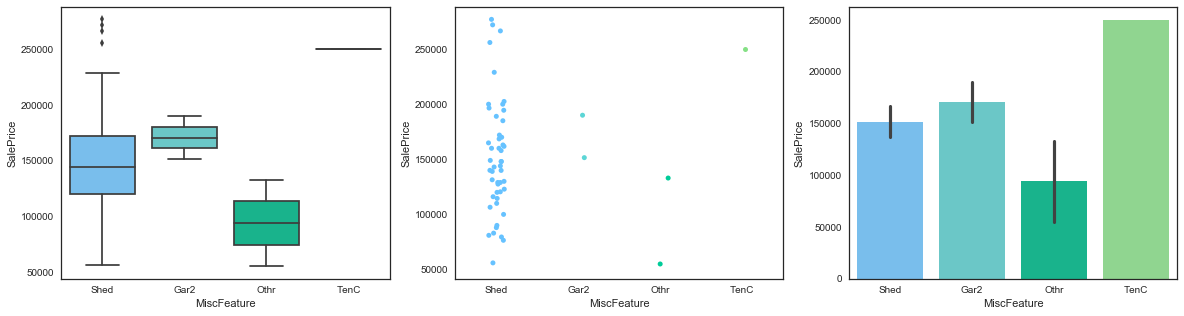

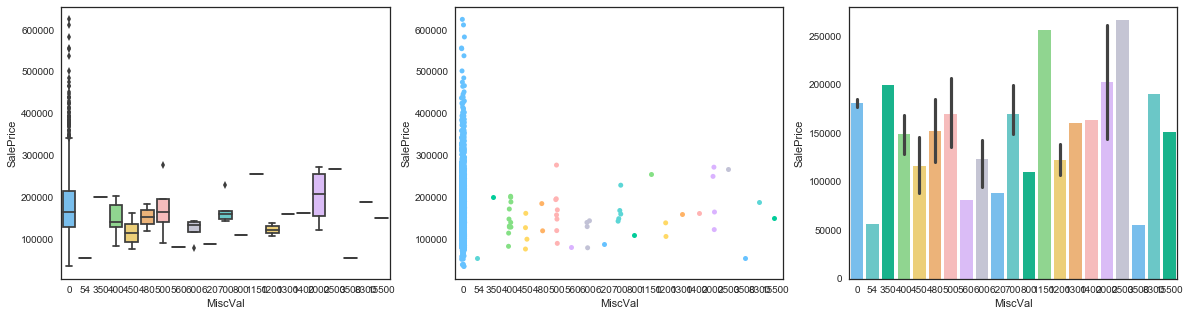

In [172]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="MiscFeature", y="SalePrice", data=train, palette = mycols)

plt.subplot(1, 3, 2)
sns.stripplot(x="MiscFeature", y="SalePrice", data=train, size = 5, jitter = True, palette = mycols);

plt.subplot(1, 3, 3)
sns.barplot(x="MiscFeature", y="SalePrice", data=train, palette = mycols);


plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="MiscVal", y="SalePrice", data=train, palette = mycols)

plt.subplot(1, 3, 2)
sns.stripplot(x="MiscVal", y="SalePrice", data=train, size = 5, jitter = True, palette = mycols);

plt.subplot(1, 3, 3)
sns.barplot(x="MiscVal", y="SalePrice", data=train, palette = mycols);

In [173]:
all_data['MiscVal'].head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: MiscVal, dtype: float64

We can see here that only a low number of houses in this area with any miscalleanous features. Hence, we will drop this feature along with MiscVal.

In [254]:
columns=['MiscFeature', 'MiscVal']
all_data.drop(columns, axis=1, inplace=True)


<a id='Adding_features'></a>
### 4.6 - Adding new features to improve predictions


In [255]:
# If YearRemodAdd != YearBuilt, then a remodeling took place at some point.
all_data["Remodeled"] = (all_data["YearRemodAdd"] != all_data["YearBuilt"]) * 1

# Did a remodeling happen in the year the house was sold?
all_data["RecentRemodel"] = (all_data["YearRemodAdd"] == all_data["YrSold"]) * 1

# Was this house sold in the year it was built?
all_data["VeryNewHouse"] = (all_data["YearBuilt"] == all_data["YrSold"]) * 1

all_data["Has2ndFloor"] = (all_data["2ndFlrSF"] == 0) * 1
all_data["HasMasVnr"] = (all_data["MasVnrArea"] == 0) * 1
all_data["HasWoodDeck"] = (all_data["WoodDeckSF"] == 0) * 1
all_data["HasOpenPorch"] = (all_data["OpenPorchSF"] == 0) * 1
all_data["HasEnclosedPorch"] = (all_data["EnclosedPorch"] == 0) * 1
all_data["Has3SsnPorch"] = (all_data["3SsnPorch"] == 0) * 1
all_data["HasScreenPorch"] = (all_data["ScreenPorch"] == 0) * 1





In [256]:
# Bin by neighborhood (a little arbitrarily). Values were computed by: 

neighborhood_map = {
    "MeadowV" : 0,  #  88000
    "IDOTRR" : 1,   # 103000
    "BrDale" : 1,   # 106000
    "OldTown" : 1,  # 119000
    "Edwards" : 1,  # 119500
    "BrkSide" : 1,  # 124300
    "Sawyer" : 1,   # 135000
    "Blueste" : 1,  # 137500
    "SWISU" : 2,    # 139500
    "NAmes" : 2,    # 140000
    "NPkVill" : 2,  # 146000
    "Mitchel" : 2,  # 153500
    "SawyerW" : 2,  # 179900
    "Gilbert" : 2,  # 181000
    "NWAmes" : 2,   # 182900
    "Blmngtn" : 2,  # 191000
    "CollgCr" : 2,  # 197200
    "ClearCr" : 3,  # 200250
    "Crawfor" : 3,  # 200624
    "Veenker" : 3,  # 218000
    "Somerst" : 3,  # 225500
    "Timber" : 3,   # 228475
    "StoneBr" : 4,  # 278000
    "NoRidge" : 4,  # 290000
    "NridgHt" : 4,  # 315000
    }

all_data["NeighborhoodBin"] = all_data_0["Neighborhood"].map(neighborhood_map)

In [262]:
backup_kaggle = all_data
backup_train_kaggle=train
backup_test_kaggle=test

In [263]:
test_0 = test
train_0=train

In [271]:
train = all_data[:ntrain]
test = all_data[ntrain:]

In [270]:
all_data.drop("HouseStyle", axis = 1, inplace = True) 
all_data.drop("SimplPoolQC", axis = 1, inplace = True)               


In [272]:
# all_data=backup_kaggle
# train=backup_train_kaggle
# test=backup_test_kaggle
all_data.shape

(1457, 279)

In [257]:
# neighborhood_bin_train = pd.DataFrame(index = train_0.index)
# neighborhood_bin_train["NeighborhoodBin"] = train["NeighborhoodBin"]
# neighborhood_bin_test = pd.DataFrame(index = test_0.index)
# neighborhood_bin_test["NeighborhoodBin"] = test["NeighborhoodBin"]

In [258]:
# # Divide up the years between 1871 and 2010 in slices of 20 years.
# year_map = pd.concat(pd.Series("YearBin" + str(i+1), index=range(1871+i*20,1891+i*20)) for i in range(0, 7))

# yearbin_df = pd.DataFrame(index = all_data_0.index)
# yearbin_df["GarageYrBltBin"] = all_data_0.GarageYrBlt.map(year_map)
# yearbin_df["GarageYrBltBin"].fillna("NoGarage", inplace=True)

# yearbin_df["YearBuiltBin"] = all_data_0.YearBuilt.map(year_map)
# yearbin_df["YearRemodAddBin"] = all_data_0.YearRemodAdd.map(year_map)

# #all_data = onehot(all_data, yearbin_df, "GarageYrBltBin", None, None)
# #all_data = onehot(all_data, yearbin_df, "YearBuiltBin", None, None)
# #all_data = onehot(all_data, yearbin_df, "YearRemodAddBin", None, None)
# all_data = onehot(all_data, neighborhood_bin_train, "NeighborhoodBin", None, None)

In [259]:
# all_data.drop("GarageYrBltBin",axis = 1, inplace = True)


In [260]:
# all_data.drop("YearBuiltBin",axis = 1, inplace = True)
# all_data.drop("YearRemodAddBin",axis = 1, inplace = True)

Copy `NeighborhoodBin` into a temporary DataFrame because we want to use the unscaled version later on to one-hot encode it.  (Note: Amit uses the phrase "one-hot encoding", I usually say "making dummy variables", but in most cases it's the same thing.)

<a id='target_variable'></a>
### 4.7 - Target Variable

- Unlike classification, in regression we are predicting a continuous number. Hence, the prediction could be any number along the real number line.
- Therefore, it is always useful to check the distribution of the target variable, and indeed all numeric variables, when building a regression model. Machine Learning algorithms work well with features that are normally distributed, a distribution that is symmetric and has a characteristic bell shape. If features are not normally distributed, we can transform them using clever statistical methods.
- First, let's check the target variable.

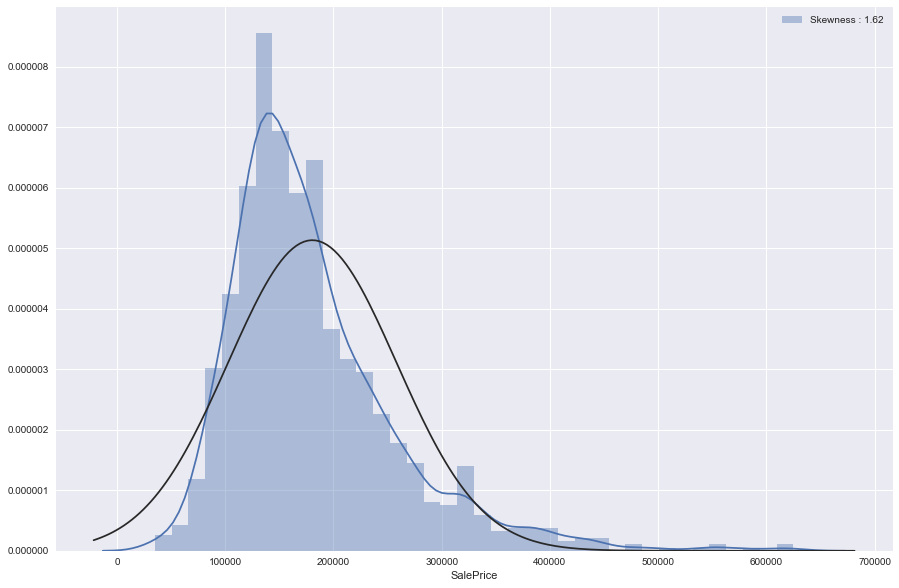

In [265]:
plt.subplots(figsize=(15, 10))
g = sns.distplot(train_0['SalePrice'], fit=norm, label = "Skewness : %.2f"%(train_0['SalePrice'].skew()));
g = g.legend(loc="best")

The distribution of the target variable is positively skewed, meaning that the mode is always less than the mean and median. 

In order to transform this variable into a distribution that looks closer to the black line shown above, we can use the numpy function log1p which applies log(1+x) to all elements within the feature.

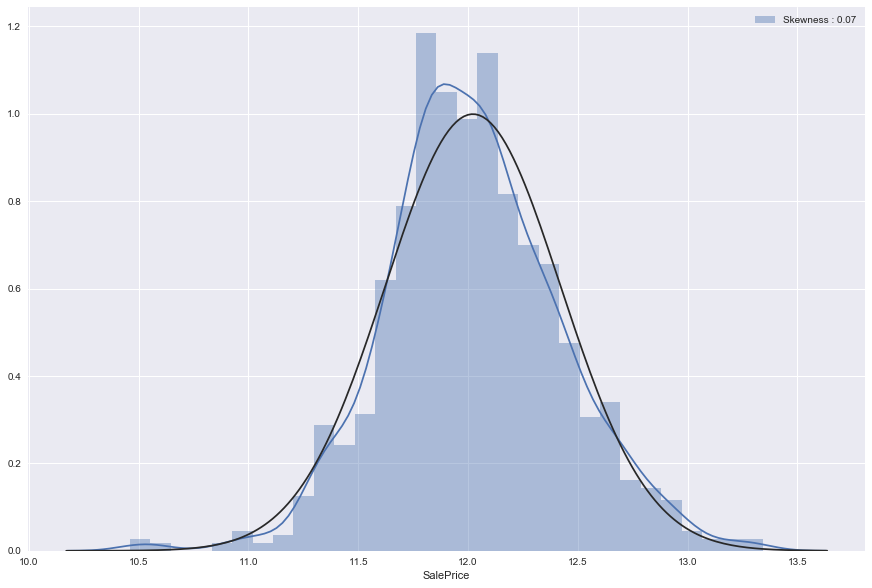

In [266]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
train_0["SalePrice"] = np.log1p(train_0["SalePrice"])
y_train = train_0["SalePrice"]

#Check the new distribution 
plt.subplots(figsize=(15, 10))
g = sns.distplot(train_0['SalePrice'], fit=norm, label = "Skewness : %.2f"%(train_0['SalePrice'].skew()));
g = g.legend(loc="best")

We can see from the skewness and the plot that it follows much more closely to the normal distribution now. This will help the algorithms work most reliably because we are now predicting a distribution that is well-known, i.e. the normal distribution. If the distribution of your data approximates that of a theoretical distribution, we can perform calculations on the data that are based on assumptions of that well-known distribution. 

Now that we have transformed the target variable, this means that the prediction we produce will also be in the form of this transformation. Unless, we can revert this transformation...

<a id='modeling'></a>
# 5. Modeling

<a id='preparation_of_data'></a>
## 5.1 - Preparation of data

Now that our dataset is ready for modeling, we must prepare it from training, testing and prediction. One of the vital steps here is to reduce the number of features. We will do this using XGBoost's inbuilt feature importance functionality.

In [247]:
# First, re-create the training and test datasets
train = all_data[:ntrain]
test = all_data[:ntest]

In [248]:
test.shape

(1459, 298)

## Model Fitting

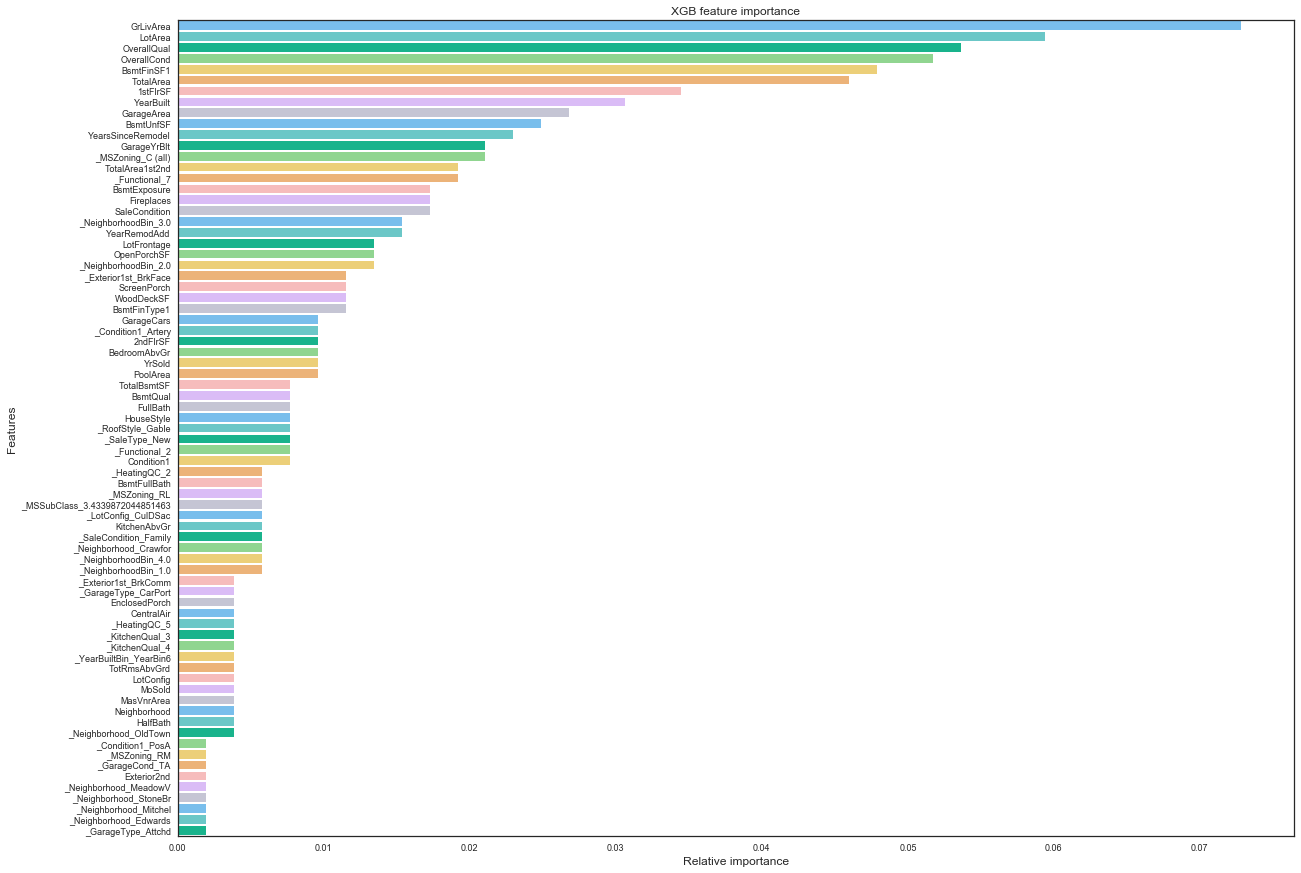

In [260]:
model = xgb.XGBRegressor()
model.fit(train, y_train)

# Sort feature importances from GBC model trained earlier
indices = np.argsort(model.feature_importances_)[::-1]
indices = indices[:75]

# Visualise these with a barplot
plt.subplots(figsize=(20, 15))
g = sns.barplot(y=train.columns[indices], x = model.feature_importances_[indices], orient='h', palette = mycols)
g.set_xlabel("Relative importance",fontsize=12)
g.set_ylabel("Features",fontsize=12)
g.tick_params(labelsize=9)
g.set_title("XGB feature importance");

In [261]:
xgb_train = train.copy()
xgb_test = test.copy()

import xgboost as xgb
model = xgb.XGBRegressor()
model.fit(xgb_train, y_train)

# Allow the feature importances attribute to select the most important features
xgb_feat_red = SelectFromModel(model, prefit = True)

# Reduce estimation, validation and test datasets
xgb_train = xgb_feat_red.transform(xgb_train)
xgb_test = xgb_feat_red.transform(xgb_test)


print("Results of 'feature_importances_':")
print('X_train: ', xgb_train.shape, '\nX_test: ', xgb_test.shape)

Results of 'feature_importances_':
X_train:  (1456, 66) 
X_test:  (1459, 66)


In [262]:
# Next we want to sample our training data to test for performance of robustness ans accuracy, before applying to the test data
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(xgb_train, y_train, test_size=0.3, random_state=42)

# X_train = predictor features for estimation dataset
# X_test = predictor variables for validation dataset
# Y_train = target variable for the estimation dataset
# Y_test = target variable for the estimation dataset

print('X_train: ', X_train.shape, '\nX_test: ', X_test.shape, '\nY_train: ', Y_train.shape, '\nY_test: ', Y_test.shape)

X_train:  (1019, 66) 
X_test:  (437, 66) 
Y_train:  (1019,) 
Y_test:  (437,)


<a id='training'></a>
## 5.2 - Training

We are finally ready to train our models. For this analysis we will use 8 different algorithms. They are the most commonly used for data prediction.
- **Kernel Ridge Regression**
- **Elastic Net**
- **Lasso**
- **Gradient Boosting**
- **Bayesian Ridge**
- **Lasso Lars IC**
- **Random Forest Regressor**
- **XGBoost**

## 2. Metropolis-Hastings
<div class="alert alert-info">
In this lab, you’re going to implement the Metropolis-Hasting algorithm described in the lecture.
Use the binary classification data `binaryclass2.mat` and the function `laplacecomp()`. If you
pass this function a 2-dimensional $w$ vector, it will return $g(w; X, t, \sigma^2)$ and $log(g(w; X, t, \sigma^2))$.
(Remember that $g(w; X, t, \sigma^2) \propto p(w|X, t, \sigma^2)$, the posterior density of interest.)

$min{|| X w - y||_2^2+ \alpha {||w||_2}^2}$
</div>

### Description of the model
<div class="alert alert-info">
<br>
**Ridge regression** addresses some of the problems of Ordinary Least Squares by imposing a penalty on the size of coefficients. The ridge coefficients minimize a penalized residual sum of squares:
<br>
$\underset{w}{min\,} {{|| X w - y||_2}^2 + \alpha {||w||_2}^2}$
<br>
Here, $\alpha \geq 0$ is a complexity parameter that controls the amount of shrinkage: the larger the value of \alpha, the greater the amount of shrinkage and thus the coefficients become more robust to collinearity.
<br>
**Kernel ridge regression**  combines Ridge Regression with the kernel trick. It thus learns a linear function in the space induced by the respective kernel and the data. For non-linear kernels, this corresponds to a non-linear function in the original space.

<br><br>
**ElasticNet** is a linear regression model trained with L1 and L2 prior as regularizer. This combination allows for learning a sparse model where few of the weights are non-zero like Lasso, while still maintaining the regularization properties of Ridge. We control the convex combination of L1 and L2 using the l1_ratio parameter.
Elastic-net is useful when there are multiple features which are correlated with one another. Lasso is likely to pick one of these at random, while elastic-net is likely to pick both.
A practical advantage of trading-off between Lasso and Ridge is it allows Elastic-Net to inherit some of Ridge’s stability under rotation.
The objective function to minimize is in this case
$\underset{w}{min\,} { \frac{1}{2n_{samples}} ||X w - y||_2 ^ 2 + \alpha \rho ||w||_1 +
\frac{\alpha(1-\rho)}{2} ||w||_2 ^ 2}$

<br><br>
The **Lasso** is a linear model that estimates sparse coefficients. It is useful in some contexts due to its tendency to prefer solutions with fewer parameter values, effectively reducing the number of variables upon which the given solution is dependent. For this reason, the Lasso and its variants are fundamental to the field of compressed sensing. Under certain conditions, it can recover the exact set of non-zero weights (see Compressive sensing: tomography reconstruction with L1 prior (Lasso)).
Mathematically, it consists of a linear model trained with $\ell_1$ prior as regularizer. The objective function to minimize is:
$\underset{w}{min\,} { \frac{1}{2n_{samples}} ||X w - y||_2 ^ 2 + \alpha ||w||_1}$
The lasso estimate thus solves the minimization of the least-squares penalty with $\alpha ||w||_1$ added, where \alpha is a constant and $||w||_1$ is the $\ell_1$-norm of the parameter vector.
The implementation in the class Lasso uses coordinate descent as the algorithm to fit the coefficients. 


<br><br>
Like other boosting methods, **Gradient Boosting** combines weak "learners" into a single strong learner in an iterative fashion. It is easiest to explain in the least-squares regression setting, where the goal is to "teach" a model ${\displaystyle F}$ to predict values of the form ${\displaystyle {\hat {y}}=F(x)} \hat{y} = F(x)$ by minimizing the mean squared error ${\displaystyle ({\hat {y}}-y)^{2}} (\hat{y} - y)^2$, averaged over some training set of actual values of the output variable ${\displaystyle y}$.
At each stage ${\displaystyle m}$, ${\displaystyle 1\leq m\leq M}$, of gradient boosting, it may be assumed that there is some imperfect model ${\displaystyle F_{m}} $ (at the outset, a very weak model that just predicts the mean y in the training set could be used). The gradient boosting algorithm improves on ${\displaystyle F_{m}}$ by constructing a new model that adds an estimator h to provide a better model: ${\displaystyle F_{m+1}(x)=F_{m}(x)+h(x)} F_{m+1}(x) = F_m(x) + h(x)$. To find ${\displaystyle h}$, the gradient boosting solution starts with the observation that a perfect h would imply
${\displaystyle F_{m+1}(x)=F_{m}(x)+h(x)=y} {\displaystyle F_{m+1}(x)=F_{m}(x)+h(x)=y}$

<br><br>
**BayesianRidge** estimates a probabilistic model of the regression problem as described above. The prior for the parameter w is given by a spherical Gaussian:
$p(w|\lambda)$ =$\mathcal{N}(w|0,\lambda^{-1}{I_{p}})$
The priors over \alpha and \lambda are chosen to be gamma distributions, the conjugate prior for the precision of the Gaussian.
The resulting model is called Bayesian Ridge Regression, and is similar to the classical Ridge. The parameters w, $\alpha$ and $\lambda$ are estimated jointly during the fit of the model. The remaining hyperparameters are the parameters of the gamma priors over $\alpha$ and $\lambda$. These are usually chosen to be non-informative. The parameters are estimated by maximizing the marginal log likelihood.
By default $\alpha_1$ = $\alpha_2$ =  $\lambda_1$ = $\lambda_2$ = $10^{-6}$.

<br><br>
**LassoLars** is a lasso model implemented using the LARS algorithm, and unlike the implementation based on coordinate_descent, this yields the exact solution, which is piecewise linear as a function of the norm of its coefficients. **LassoLarsIC** proposes to use the Akaike information criterion (AIC) and the Bayes Information criterion (BIC). It is a computationally cheaper alternative to find the optimal value of alpha as the regularization path is computed only once instead of k+1 times when using k-fold cross-validation. However, such criteria needs a proper estimation of the degrees of freedom of the solution, are derived for large samples (asymptotic results) and assume the model is correct, i.e. that the data are actually generated by this model. They also tend to break when the problem is badly conditioned (more features than samples).

<br><br>
***Non Linear Models:***
<br><br>
A **Random Forest** is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and use averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is always the same as the original input sample size but the samples are drawn with replacement if bootstrap=True (default).
<br><br>
**XGBoost** (Extrem Gradient Boosting) is one of the implementations of Gradient Boosting concept, but what makes XGBoost unique is that it uses “a more regularized model formalization to control over-fitting, which gives it better performance.




</div>

In [263]:
import xgboost as xgb
#Machine Learning Algorithm (MLA) Selection and Initialization
models = [KernelRidge(), ElasticNet(), Lasso(), GradientBoostingRegressor(), BayesianRidge(), LassoLarsIC(), RandomForestRegressor(), xgb.XGBRegressor()]

# First I will use ShuffleSplit as a way of randomising the cross validation samples.
shuff = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

#create table to compare MLA metrics
columns = ['Name', 'Parameters', 'Train Accuracy Mean', 'Test Accuracy']
before_model_compare = pd.DataFrame(columns = columns)

#index through models and save performance to table
row_index = 0
for alg in models:

    #set name and parameters
    model_name = alg.__class__.__name__
    before_model_compare.loc[row_index, 'Name'] = model_name
    before_model_compare.loc[row_index, 'Parameters'] = str(alg.get_params())
    
    alg.fit(X_train, Y_train)
    
    #score model with cross validation: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate
    training_results = np.sqrt((-cross_val_score(alg, X_train, Y_train, cv = shuff, scoring= 'neg_mean_squared_error')).mean())
    test_results = np.sqrt(((Y_test-alg.predict(X_test))**2).mean())
    
    before_model_compare.loc[row_index, 'Train Accuracy Mean'] = (training_results)
    before_model_compare.loc[row_index, 'Test Accuracy'] = (test_results)
    
    row_index+=1
    print(row_index, alg.__class__.__name__, 'trained...')

decimals = 3
before_model_compare['Train Accuracy Mean'] = before_model_compare['Train Accuracy Mean'].apply(lambda x: round(x, decimals))
before_model_compare['Test Accuracy'] = before_model_compare['Test Accuracy'].apply(lambda x: round(x, decimals))
before_model_compare

1 KernelRidge trained...
2 ElasticNet trained...
3 Lasso trained...
4 GradientBoostingRegressor trained...
5 BayesianRidge trained...
6 LassoLarsIC trained...
7 RandomForestRegressor trained...
8 XGBRegressor trained...


Name  \
0                KernelRidge   
1                 ElasticNet   
2                      Lasso   
3  GradientBoostingRegressor   
4              BayesianRidge   
5                LassoLarsIC   
6      RandomForestRegressor   
7               XGBRegressor   

                                          Parameters  Train Accuracy Mean  \
0  {'degree': 3, 'alpha': 1, 'coef0': 1, 'gamma':...                0.009   
1  {'precompute': False, 'copy_X': True, 'positiv...                0.020   
2  {'fit_intercept': True, 'alpha': 1.0, 'normali...                0.020   
3  {'criterion': 'friedman_mse', 'min_weight_frac...                0.009   
4  {'fit_intercept': True, 'lambda_1': 1e-06, 'co...                0.009   
5  {'criterion': 'aic', 'fit_intercept': True, 'n...                0.010   
6  {'criterion': 'mse', 'min_weight_fraction_leaf...                0.011   
7  {'n_estimators': 100, 'nthread': None, 'random...                0.010   

   Test Accuracy  
0          0.009  
1          0.020  
2          0.020  
3          0.010  
4          0.009  
5          0.010  
6          0.011  
7          0.010

- We can see that each of the models performs with varying ability, with **Bayesian Ridge** having the best accuracy score on the training dataset and accuracy on the validation dataset.

***

<a id='optimisation'></a>
### 5.3 - Optimisation

- As you can see from the above table, the accuracy for these models is not quite as good as it could be.
- This is because we use the default configuration of parameters for each of the algorithms.

So now, we will use **GridSearchCV** to find the best combinations of parameters to produce the highest scoring models.

**Note**: GridSearchCV uses a grid of parameters to optimise the algorithms. This grid can get extremely large, and therefore requires a lot of computation power to complete. I have included a set of answers in the grids to cut down computation time, but these were not my final ones. I'll leave this up to you to find the best values. But in reality, you will have to fill these grids with appropriate values with the goal of trying to find the best combination.

In [264]:
regr = xgb.XGBRegressor(
                 colsample_bytree=0.2,
                 gamma=0.0,
                 learning_rate=0.05,
                 max_depth=6,
                 min_child_weight=1.5,
                 n_estimators=7200,                                                                  
                 reg_alpha=0.9,
                 reg_lambda=0.6,
                 subsample=0.2,
                 seed=42,
                 silent=1)

# I found this best alpha through cross-validation.
best_alpha = 0.00099

regr = Lasso(alpha=best_alpha, max_iter=50000)

In [ ]:
models = [KernelRidge(), ElasticNet(), Lasso(), GradientBoostingRegressor(), BayesianRidge(), LassoLarsIC(), RandomForestRegressor(), xgb.XGBRegressor()]

KR_param_grid = {'alpha': [0.1], 'coef0': [100], 'degree': [1], 'gamma': [None], 'kernel': ['polynomial']}
EN_param_grid = {'alpha': [0.001], 'copy_X': [True], 'l1_ratio': [0.6], 'fit_intercept': [True], 'normalize': [False], 
                         'precompute': [False], 'max_iter': [300], 'tol': [0.001], 'selection': ['random'], 'random_state': [None]}
LASS_param_grid = {'alpha': [0.0005], 'copy_X': [True], 'fit_intercept': [True], 'normalize': [False], 'precompute': [False], 
                    'max_iter': [300], 'tol': [0.01], 'selection': ['random'], 'random_state': [None]}
GB_param_grid = {'loss': ['huber'], 'learning_rate': [0.05], 'n_estimators': [3000], 'max_depth': [4], 
                                        'min_samples_split': [10], 'min_samples_leaf': [15]}
BR_param_grid = {'n_iter': [200], 'tol': [0.00001], 'alpha_1': [0.00000001], 'alpha_2': [0.000005], 'lambda_1': [0.000005], 
                 'lambda_2': [0.00000001], 'copy_X': [True]}
LL_param_grid = {'criterion': ['aic'], 'normalize': [True], 'max_iter': [100], 'copy_X': [True], 'precompute': ['auto'], 'eps': [0.000001]}
RFR_param_grid = {'n_estimators': [50], 'max_features': ['auto'], 'max_depth': [None], 'min_samples_split': [5], 'min_samples_leaf': [2]}
XGB_param_grid = {'max_depth': [3], 'learning_rate': [0.1], 'n_estimators': [300], 'booster': ['gbtree'], 'gamma': [0], 'reg_alpha': [0.1],
                  'reg_lambda': [0.7], 'max_delta_step': [0], 'min_child_weight': [1], 'colsample_bytree': [0.5], 'colsample_bylevel': [0.2],
                  'scale_pos_weight': [1]}
params_grid = [KR_param_grid, EN_param_grid, LASS_param_grid, GB_param_grid, BR_param_grid, LL_param_grid, RFR_param_grid, XGB_param_grid]

after_model_compare = pd.DataFrame(columns = columns)

row_index = 0
for alg in models:
    
    gs_alg = GridSearchCV(alg, param_grid = params_grid[0], cv = shuff, scoring = 'neg_mean_squared_error', n_jobs=-1)
    params_grid.pop(0)

    #set name and parameters
    model_name = alg.__class__.__name__
    after_model_compare.loc[row_index, 'Name'] = model_name
    
    gs_alg.fit(X_train, Y_train)
    gs_best = gs_alg.best_estimator_
    after_model_compare.loc[row_index, 'Parameters'] = str(gs_alg.best_params_)
    
    #score model with cross validation: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate
    after_training_results = np.sqrt(-gs_alg.best_score_)
    after_test_results = np.sqrt(((Y_test-gs_alg.predict(X_test))**2).mean())
    
    after_model_compare.loc[row_index, 'Train Accuracy Mean'] = (after_training_results)
    after_model_compare.loc[row_index, 'Test Accuracy'] = (after_test_results)
    
    row_index+=1
    print(row_index, alg.__class__.__name__, 'trained...')

decimals = 3
after_model_compare['Train Accuracy Mean'] = after_model_compare['Train Accuracy Mean'].apply(lambda x: round(x, decimals))
after_model_compare['Test Accuracy'] = after_model_compare['Test Accuracy'].apply(lambda x: round(x, decimals))
after_model_compare

1 KernelRidge trained...
2 ElasticNet trained...
3 Lasso trained...


Overall we can see that the training and test scores for each of the models have decreased, which is what we want.
- Now we have a set of highly tuned algorithms to use for **Stacking**.

***

<a id='stacking'></a>
### 5.4 - Stacking

Now that we have a set of highly tuned algorithms, a rather famous and successful technique to further improve the accuracy of these models, is to use **Stacking**. Let me explain what this means.

If you hadn't figured it out already, our brick-laying friend enticed us in earlier on in order to explain **Stacking**.

Brick-laying is an art form. Where I live in London today, remain buildings that have stood for hundreds and even thousands of years. Without having a skilled brick-layer or to stack them properly, nobody would ever want to visit or live in this city., This animation shows the art of stacking bricks on top of one another to form something much greater, a wall, a house or even a building. **This is exactly what we are going to do by stacking several algorithms together, to form a much stronger one.**  

The steps for this technique are shown below:
1. **Create a set of algorithms ready for stacking** - We've done this...
2. **Split the original training data into a training and validation sample** - We've done this too...
3. **Train the algorithms on the training sample** - Also done this...
4. **For each algorithm, apply the trained models to the validation dataset and create a set of predictions**, 1 column for each model, as a new table. Call this the *new training dataset*.
5. **Also apply the trained algorithm to the test dataset and create a final set of predictions**, 1 column for each model, as a new table. Call this *new test dataset*.
6. **For the new training dataset, we have labeled outputs, in the form of Y_test**. Now we must train another model on these two feature sets: *new training dataset* and Y_test.
7. **Use this newly trained model to predict values** for *new test dataset*.

Now I understand that this sounds very confusing, and probably doesn't make much sense. Let me explain this further with some visualisations.

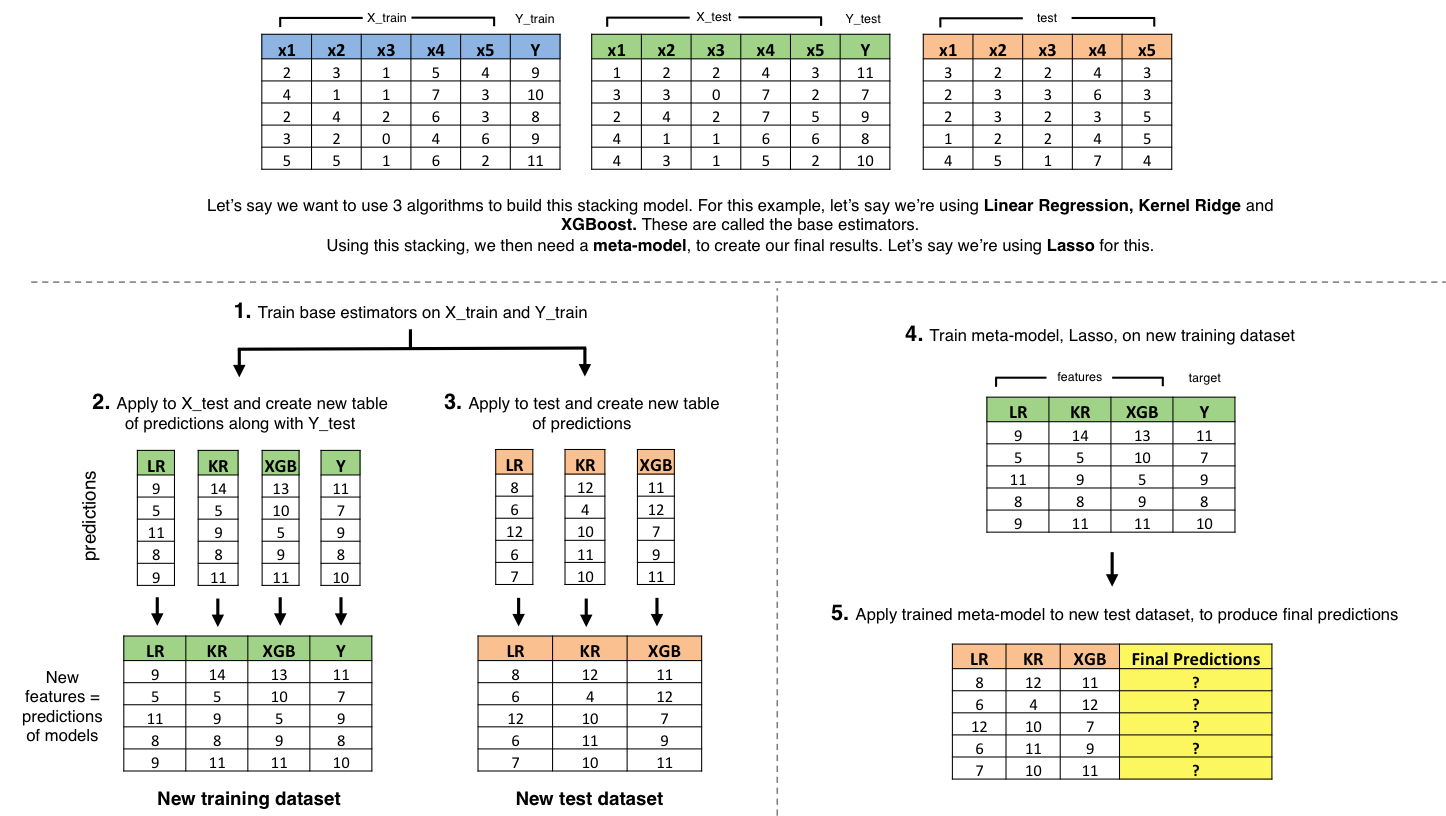

In [122]:
Image(filename='stacking.png')

- Before I start with the stacking, I need to decide which algorithms to use as my base estimators, and which to use as the meta-model.

- Since **Bayesian Ridge** performed the best after optimisation, I chose this to be the **meta-model**. All other models will be used as base estimators.

- So now, I will cycle through each optimised estimator, train them on the training dataset, apply to them the validation and test datasets, then finally outputting the predictions for validation and test into two new datasets: **stacked_validation_train** and **stacked_test_train**.

In [121]:
models = [KernelRidge(),ElasticNet(), Lasso(), GradientBoostingRegressor(), BayesianRidge(), xgb.XGBRegressor()]
names = ['KernelRidge','ElasticNet', 'Lasso', 'Gradient Boosting', 'Bayesian Ridge', 'XGBoost']
params_grid = [KR_param_grid,EN_param_grid, LASS_param_grid, GB_param_grid, BR_param_grid, XGB_param_grid]
stacked_validation_train = pd.DataFrame()
stacked_test_train = pd.DataFrame()

row_index=0

for alg in models:
    
    gs_alg = GridSearchCV(alg, param_grid = params_grid[0], cv = shuff, scoring = 'neg_mean_squared_error', n_jobs=-1)
    params_grid.pop(0)
    
    gs_alg.fit(X_train, Y_train)
    gs_best = gs_alg.best_estimator_
    stacked_validation_train.insert(loc = row_index, column = names[0], value = gs_best.predict(X_test))
    print(row_index+1, alg.__class__.__name__, 'predictions added to stacking validation dataset...')
    
    stacked_test_train.insert(loc = row_index, column = names[0], value = gs_best.predict(xgb_test))
    print(row_index+1, alg.__class__.__name__, 'predictions added to stacking test dataset...')
    print("-"*50)
    names.pop(0)
    
    row_index+=1
    
print('Done')

1 KernelRidge predictions added to stacking validation dataset...
1 KernelRidge predictions added to stacking test dataset...
--------------------------------------------------
2 ElasticNet predictions added to stacking validation dataset...
2 ElasticNet predictions added to stacking test dataset...
--------------------------------------------------
3 Lasso predictions added to stacking validation dataset...
3 Lasso predictions added to stacking test dataset...
--------------------------------------------------
4 GradientBoostingRegressor predictions added to stacking validation dataset...
4 GradientBoostingRegressor predictions added to stacking test dataset...
--------------------------------------------------
5 BayesianRidge predictions added to stacking validation dataset...
5 BayesianRidge predictions added to stacking test dataset...
--------------------------------------------------
6 XGBRegressor predictions added to stacking validation dataset...
6 XGBRegressor predictions add

- Let's take a quick look at what these new datasets look like:

In [122]:
stacked_validation_train.head()

KernelRidge  ElasticNet      Lasso  Gradient Boosting  Bayesian Ridge  \
0    12.026762   12.010225  12.014324          12.057790       12.031333   
1    11.952666   11.960804  11.962379          12.006208       11.954662   
2    11.880509   11.896204  11.896525          11.852931       11.886238   
3    11.782794   11.798364  11.803550          11.919716       11.796378   
4    11.305417   11.297546  11.304892          11.312807       11.316707   

     XGBoost  
0  11.968508  
1  11.978560  
2  11.859764  
3  11.958641  
4  11.278502

- The new training dataset is 360 rows of predictions from the 8 algorithms we decided to use.

In [123]:
stacked_test_train.head()

KernelRidge  ElasticNet      Lasso  Gradient Boosting  Bayesian Ridge  \
0    12.273246   12.271793  12.272397          12.234935       12.273783   
1    12.118362   12.118392  12.114585          12.106530       12.116268   
2    12.305580   12.309940  12.308929          12.315868       12.302415   
3    12.080340   12.074455  12.080762          11.851212       12.096520   
4    12.587666   12.586086  12.584999          12.428861       12.582364   

     XGBoost  
0  12.218936  
1  12.036068  
2  12.230073  
3  11.930154  
4  12.541039

- The new test dataset is 260 rows of predictions from the 8 algorithms we decided to use.
- I will use these two datasets to train and produce predictions for the meta-model, Bayesian Ridge.

In [124]:
# First drop the Bayesian Ridge results from the table, as we will be using Bayesian Ridge as the meta-model
drop = ['Bayesian Ridge']
stacked_validation_train.drop(drop, axis=1, inplace=True)
stacked_test_train.drop(drop, axis=1, inplace=True)

In [125]:
# Now fit the meta model and generate predictions
meta_model = make_pipeline(RobustScaler(), BayesianRidge(n_iter = 200, tol= 0.00001, alpha_1= 0.00000001,
                                                 alpha_2= 0.000005, lambda_1= 0.000005, 
                                                 lambda_2=0.00000001, copy_X= True))
meta_model.fit(stacked_validation_train, Y_test)

meta_model_pred = np.expm1(meta_model.predict(stacked_test_train))
#meta_model_pred = np.expm1(meta_model.predict(stacked_validation_train))
print("Meta-model trained and applied!...")

Meta-model trained and applied!...


In [126]:
meta_predictions = pd.Series(meta_model_pred)

meta_rmse = np.sqrt(((Y_test -np.log1p(meta_predictions))**2).mean())
Y_test.head()

497     12.122696
1264    12.106258
411     11.884496
1048    11.652696
1035    11.338584
Name: SalePrice, dtype: float64

In [127]:
np.log1p(meta_predictions).head()

0    12.255996
1    12.090300
2    12.287744
3    12.011302
4    12.565728
dtype: float64

***

<a id='ensemble'></a>
### 5.5 - Ensemble

- However, another famous and successful technique for Machine Learning are **Ensemble methods**.
    - These are effective when using many different models of varying degrees of accuracy. 
    - They work on the idea that many weak learners, can produce a strong learner.
- Therefore, using the meta-model that I will create, I will also combine this with the results of the individual optimised models to create an ensemble.
- In order to create this ensemble, I must collect the final predictions of each of the optimised models. I will do this now.

In [128]:
models = [KernelRidge(), ElasticNet(), Lasso(), GradientBoostingRegressor(), BayesianRidge(), xgb.XGBRegressor()]
names = ['ElasticNet', 'Lasso', 'Gradient Boosting', 'Bayesian Ridge', 'XGBoost']
params_grid = [KR_param_grid,EN_param_grid, LASS_param_grid, GB_param_grid, BR_param_grid, XGB_param_grid]
final_predictions = pd.DataFrame()

row_index=0

for alg in models:
    
    gs_alg = GridSearchCV(alg, param_grid = params_grid[0], cv = shuff, scoring = 'neg_mean_squared_error', n_jobs=-1)
    params_grid.pop(0)
    
    gs_alg.fit(stacked_validation_train, Y_test)
    gs_best = gs_alg.best_estimator_
    final_predictions.insert(loc = row_index, column = names[0], value = np.expm1(gs_best.predict(stacked_test_train)))
    #final_predictions.insert(loc = row_index, column = names[0], value = np.expm1(gs_best.predict(stacked_validation_train)))
    print (row_index+1, alg.__class__.__name__, 'final results predicted added to table...')
    names.pop(0)
    
    row_index+=1

print("-"*50)
print("Done")
    
final_predictions.head()

1 ElasticNet final results predicted added to table...
2 Lasso final results predicted added to table...
3 GradientBoostingRegressor final results predicted added to table...
4 BayesianRidge final results predicted added to table...
5 XGBRegressor final results predicted added to table...
--------------------------------------------------
Done


ElasticNet          Lasso  Gradient Boosting  Bayesian Ridge  \
0  210057.138959  210545.464635      213465.015233   210252.533751   
1  178460.070868  181549.719930      169513.271928   178135.024171   
2  216691.220326  221701.994379      226348.693954   217064.130620   
3  164615.212649  160059.158031      160302.465850   164663.687652   
4  285527.126041  276224.344621      267036.056066   286550.852935   

         XGBoost  
0  208727.125000  
1  173773.968750  
2  223923.062500  
3  165224.921875  
4  280776.187500

- As you can see, each of the models produces results that vary quite widely. This is the beauty of using a combination of many different models.
- Some models will be much better at catching certain signals in the data, whereas others may perform better in other situations. 
- By creating an ensemble of all of these results, it helps to create a more generalised model that is resistant to noise.
- Now, I will finish by creating an ensemble of the meta-model and optimised models, for my final submission.

***

<a id='submission'></a>
### 5.6 - Submission

In [130]:
ensemble = meta_model_pred 
submission = pd.DataFrame()
submission['Id'] = test_ID
submission['SalePrice'] = ensemble
submission.to_csv('final_stuff2.csv',index=False)
print("Submission file, created!")
submission.shape

Submission file, created!


(1459, 2)

***

<a id='conclusion'></a>
# 6. Conclusion

Throughout this notebook, we focus a lot on feature engineering and the stacking technique. 
One main concern was to handle the features, their nature and number. Each model used varies with respect to the variables that are most important to predicting Sale Price. The best way to interpret our ensemble is to look for shared variables among its constituent models. The variables seen as most important or as strongest predictors through our models were those related to square footage, the age and condition of the home, the neighborhood where the house was located, the city zone where the house was located, and the year the house was sold.
Since the lasso and XGBoost algorithms are very different, averaging predictions likely improves the final scores.


To conclude this notebook, we would like to apply the gaussian process to our processed data. It is not suposed to give the better results, but it is still interresting to compare the models, espacially those we studied in class.

### Gaussian process


An advantage of the gaussian processes is that different kernels can be specified. Common kernels are provided, but it is also possible to specify custom kernels. The prior’s covariance is specified by a passing a kernel object. The hyperparameters of the kernel are optimized during fitting of GaussianProcessRegressor by maximizing the log-marginal-likelihood (LML) based on the passed optimizer. As the LML may have multiple local optima, the optimizer can be started repeatedly by specifying n_restarts_optimizer. The first run is always conducted starting from the initial hyperparameter values of the kernel; subsequent runs are conducted from hyperparameter values that have been chosen randomly from the range of allowed values. 
Here we decided to use a generalization of the radial basis functions (RBF) and the absolute exponential kernel parameterized by an additional parameter nu.

We observe that the score is very higher comparing to the model we studied. So indeed it is not the best model we can have, especially because of the high number of features we have in this problem.
Gaussian processes are espacially bad here because:
- They are not sparse, i.e., they use the whole samples/features information to perform the prediction.
- They lose efficiency in high dimensional spaces – namely when the number of features exceeds a few dozens.

In [235]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import math
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn.metrics import make_scorer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import GridSearchCV
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import WhiteKernel, Matern, RBF, DotProduct, RationalQuadratic


In [236]:
# Just for checking the non values again
def NAcheck(df):
    isna = np.zeros(df.shape[1])
    for c in range(df.shape[1]):
        isna[c] = df.iloc[:, c].isnull().values.any()
            # For each columns, it return "True" if they have NaN.
    nandf = pd.DataFrame({'variable': df.columns, 'isna': isna})
    havenan = nandf[nandf.isna == 1]
    NAcolumn = havenan.variable.tolist()
    return NAcolumn

In [282]:
# Assignig the variables
train1 = train
test1 = test
y_log = np.log1p(y_train.values)
y = np.expm1(y_log)
X = train1.values
X_test = test1.values


In [283]:
kernel = 1.0**2 * Matern(length_scale=1.0, length_scale_bounds=(1e-05, 100000.0), nu=0.5)
gp = GaussianProcessRegressor(kernel=kernel, alpha=5e-9, optimizer='fmin_l_bfgs_b', 
                                n_restarts_optimizer=0, normalize_y=False, copy_X_train=True,
                                random_state=2016)
clf = Pipeline([('scaler', StandardScaler()), ('gp', gp)])     
y_log_centered = y_log - y_log.mean()



## Acknowledgements

- The Ames Housing dataset, by Dean De Cock: https://ww2.amstat.org/publications/jse/v19n3/decock.pdf
- Curve fitting with linear and nonlinear regression: http://blog.minitab.com/blog/adventures-in-statistics-2/curve-fitting-with-linear-and-nonlinear-regression
- Stacking: https://www.coursera.org/learn/competitive-data-science/lecture/Qdtt6/stacking
- Comprehensive data exploration with Python https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python
- Variable selection and clustering with a Bayesian Network https://www.kaggle.com/c/house-prices-advanced-regression-techniques/discussion/29010
- Predicting Housing Prices in Ames, Iowa https://nycdatascience.com/blog/student-works/kaggles-advanced-regression-competition-predicting-housing-prices-in-ames-iowa/